In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
import math
import os
from glob import glob
from scipy import stats as s
from sklearn.externals import joblib 

Using TensorFlow backend.
C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
base_model = VGG16(weights='imagenet', include_top=False)

In [3]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [4]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(51, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [6]:
# loading the trained weights
model.load_weights("../Models/weightVGG16_OF.hdf5")

In [7]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
location='../data/test'
classes=[]
videos=[]
test=pd.DataFrame()
for foldername in sorted(os.listdir(location)):
    classes.append(foldername)
    for files in sorted(os.listdir(location+'/'+foldername)):
        videos.append(foldername+'/'+files)
test['video_name']=videos
print(classes)
test_videos=test['video_name']
test.head()

['brush_hair', 'cartwheel', 'catch', 'chew', 'clap', 'climb', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'golf', 'handstand', 'hit', 'hug', 'jump', 'kick', 'kick_ball', 'kiss', 'laugh', 'pick', 'pour', 'pullup', 'punch', 'push', 'pushup', 'ride_bike', 'ride_horse', 'run', 'shake_hands', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'situp', 'smile', 'smoke', 'somersault', 'stand', 'swing_baseball', 'sword', 'sword_exercise', 'talk', 'throw', 'turn', 'walk', 'wave']


,video_name
0,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
1,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
2,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
3,brush_hair/Blonde_being_brushed_brush_hair_f_n...
4,brush_hair/Blonde_being_brushed_brush_hair_u_c...


In [9]:
# creating the tags
train = pd.read_csv('../data/train_OF.csv')
y = train['class']
y = pd.get_dummies(y)

In [10]:
# creating two lists to store predicted and actual tags
predict = []
actual = []

# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    count = 0
    videoFile = test_videos[i]
    print('../data/test/'+videoFile)

  0%|          | 0/1530 [00:00<?, ?it/s]

../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0.avi
../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1.avi
../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_2.avi
../data/test/brush_hair/Blonde_being_brushed_brush_hair_f_nm_np2_ri_med_0.avi
../data/test/brush_hair/Blonde_being_brushed_brush_hair_u_cm_np2_ri_med_1.avi
../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_h_nm_np1_le_goo_0.avi
../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_u_nm_np1_fr_goo_1.avi
../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_u_nm_np1_fr_goo_2.avi
../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_fr_goo_0.avi
../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_le_goo_1.avi
../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_le_goo_2.avi
../data/test/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_0.avi
../data/tes

  3%|▎         | 39/1530 [00:00<00:03, 387.13it/s]

../data/test/cartwheel/How_to_Do_an_Aerial_-_Aerial_vs__Cartwheel_cartwheel_f_cm_np1_le_med_0.avi
../data/test/cartwheel/How_to_Do_an_Aerial_-_Aerial_vs__Cartwheel_cartwheel_f_cm_np1_ri_med_1.avi
../data/test/cartwheel/How_to_do_a_Cartwheel_cartwheel_f_nm_np1_le_med_1.avi
../data/test/cartwheel/How_to_do_a_Cartwheel_cartwheel_f_nm_np1_ri_med_0.avi
../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_le_med_2.avi
../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_le_med_5.avi
../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_ri_med_0.avi
../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_ri_med_4.avi
../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_le_med_2.avi
../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_ri_med_0.avi
../data/test/cartwheel/Mirco_turnt_die_5

  7%|▋         | 106/1530 [00:00<00:03, 442.64it/s]

../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_1.avi
../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_2.avi
../data/test/chew/Sexy_girl_on_the_bed_teasing_chew_u_nm_np1_fr_med_1.avi
../data/test/chew/Sexy_girl_on_the_bed_teasing_chew_u_nm_np1_fr_med_2.avi
../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_fr_goo_0.avi
../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_fr_goo_2.avi
../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_le_goo_1.avi
../data/test/chew/WeddingCrashers_chew_h_nm_np1_fr_goo_6.avi
../data/test/chew/chewing_bubble_gum_chew_h_cm_np1_ri_bad_2.avi
../data/test/chew/chewing_bubble_gum_chew_h_cm_np1_ri_med_1.avi
../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_cm_np1_fr_med_0.avi
../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_cm_np1_le_med_1.avi
../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_b

 11%|█         | 164/1530 [00:00<00:02, 474.47it/s]

../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_0.avi
../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_1.avi
../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_2.avi
../data/test/climb/Jez__roof_climbing_in_Mile_End_climb_f_cm_np1_ba_med_0.avi
../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_ba_med_0.avi
../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_ba_med_2.avi
../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_le_med_1.avi
../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_1.avi
../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_2.avi
../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_3.avi
../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_0.avi
../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_2.avi
../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_an

 14%|█▍        | 213/1530 [00:00<00:02, 478.01it/s]

../data/test/dive/Bungee_Jump_-_Shit_dive_u_cm_np1_ba_bad_0.avi
../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_le_bad_3.avi
../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_ri_bad_1.avi
../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_ri_bad_4.avi
../data/test/dive/Bungee_Jumping_in_Switzerland_-_Compilation_Part_1_dive_f_cm_np1_fr_bad_0.avi
../data/test/dive/Bungee_Jumping_in_Switzerland_-_Compilation_Part_1_dive_f_cm_np1_fr_bad_1.avi
../data/test/dive/Bungee_Jumping_in_Switzerland_-__Compilation_Part_2_dive_f_cm_np1_fr_bad_0.avi
../data/test/dive/Bungee_Jumping_in_Switzerland_-__Compilation_Part_2_dive_f_cm_np1_fr_bad_2.avi
../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_2.avi
../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_4.avi
../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_7.avi
../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_0.avi
../data/test/dive/GoalKeeper_Training_2_dive_f_c

 17%|█▋        | 254/1530 [00:00<00:02, 431.36it/s]

../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_le_med_2.avi
../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_le_med_3.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ba_med_3.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_0.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_4.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_5.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_1.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_6.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_7.avi
../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ri_med_2.avi
../d

 19%|█▉        | 293/1530 [00:00<00:02, 415.75it/s]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_2.avi
../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_4.avi
../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_5.avi
../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_6.avi
../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_7.avi
../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_8.avi
../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_9.avi
../data/test/drink/310ToYuma_drink_h_cm_np1_le_goo_3.avi
../data/test/drink/310ToYuma_drink_u_nm_np1_le_goo_5.avi
../data/test/drink/50_FIRST_DATES_drink_u_nm_np1_fr_goo_29.avi
../data/test/drink/AMADEUS_drink_u_nm_np1_fr_goo_11.avi
../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_17.avi
../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_27.avi
../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_go

 22%|██▏       | 332/1530 [00:00<00:03, 380.61it/s]

../data/test/eat/American_History_X_eat_h_nm_np1_fr_goo_47.avi
../data/test/eat/BIG_FISH_eat_h_nm_np1_fr_goo_15.avi
../data/test/eat/BIG_FISH_eat_h_nm_np1_ri_goo_30.avi
../data/test/eat/BIG_FISH_eat_u_nm_np1_fr_goo_16.avi
../data/test/eat/BIG_FISH_eat_u_nm_np1_fr_goo_19.avi
../data/test/eat/CastAway1_eat_h_nm_np1_fr_goo_22.avi
../data/test/eat/CastAway1_eat_h_nm_np1_fr_goo_8.avi
../data/test/eat/CastAway1_eat_u_nm_np1_fr_med_23.avi
../data/test/eat/CastAway1_eat_u_nm_np2_fr_goo_6.avi
../data/test/eat/CastAway1_eat_u_nm_np2_fr_med_5.avi
../data/test/eat/Crash_eat_h_cm_np1_fr_med_11.avi
../data/test/eat/KUNG_FU_HUSTLE_eat_h_cm_np1_le_goo_25.avi
../data/test/eat/MeettheParents_eat_h_nm_np1_fr_goo_3.avi
../data/test/eat/MeettheParents_eat_u_nm_np1_fr_med_2.avi
../data/test/eat/Oceans11_eat_h_cm_np1_le_goo_2.avi
../data/test/eat/Oceans11_eat_u_cm_np1_fr_med_7.avi
../data/test/eat/Pirates_3_eat_h_cm_np1_fr_goo_3.avi
../data/test/eat/Pirates_3_eat_h_nm_np1_fr_goo_4.avi
../data/test/eat/Prelin

 25%|██▌       | 390/1530 [00:00<00:02, 422.78it/s]

../data/test/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_1.avi
../data/test/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_2.avi
../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_0.avi
../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_1.avi
../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_2.avi
../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_3.avi
../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_4.avi
../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_6.avi
../data/test/fencing/Duel_with_Rapiers_fencing_f_cm_np2_ba_bad_1.avi
../data/test/fencing/Duel_with_Rapiers_fencing_f_cm_np2_ri_bad_2.avi
../data/test/fencing/Great_Movie_Lessons_-_The_First_Zorro_-_Mask_of_Zorro_fencing_u_cm_np2_le_goo_1.avi
../data/test/fencing/Great_Movie_Lessons_-_The_First_Zorro_-_Mask_of_Zorro_fencing_u_cm_np2_le_med_0.avi
../data/test/fencing/Hamlet_(1996)_Fencing_Scenes_fencing_u_cm_np2_fr_med_2.avi
../data/te

 29%|██▉       | 445/1530 [00:00<00:02, 453.47it/s]

../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_0.avi
../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_1.avi
../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_2.avi
../data/test/flic_flac/Outdoor-Turnen_flic_flac_f_cm_np1_ri_med_2.avi
../data/test/flic_flac/anna_turnen_flic_flac_f_cm_np1_ri_bad_1.avi
../data/test/golf/Cobra_Golf_-_Camilo_Villegas_golf_f_cm_np1_ri_goo_0.avi
../data/test/golf/Cobra_Golf_-_Camilo_Villegas_golf_f_cm_np1_ri_goo_1.avi
../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_ba_goo_2.avi
../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_fr_goo_1.avi
../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_ri_goo_3.avi
../data/test/golf/Finding_the_fairway_under_pressure_golf_f_cm_np1_ri_med_0.avi
../data/test/golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0.avi
../data/test/golf/Huge_Drive!_Please_Rate_It_golf_f_cm_np1_ri_goo_0.avi
../

 32%|███▏      | 492/1530 [00:01<00:02, 383.63it/s]

../data/test/handstand/Handstand_Tutorial_2_handstand_f_nm_np1_le_med_2.avi
../data/test/handstand/Handstand_tutorial_3_handstand_f_nm_np1_le_med_0.avi
../data/test/handstand/Health_handstand_f_cm_np1_ri_med_0.avi
../data/test/handstand/K!_Tour_08-_NORWICH_Madina_handstand_competition_handstand_f_cm_np1_le_med_0.avi
../data/test/handstand/Outdoor-Turnen_handstand_f_cm_np1_fr_med_0.avi
../data/test/handstand/Parada_de_mao_monstra_handstand_f_cm_np1_fr_med_0.avi
../data/test/handstand/Uni-Koblenz_Normfreies_Turnen__WS_05_06__Pr_fung_handstand_f_cm_np1_ri_bad_2.avi
../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ba_med_5.avi
../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_fr_med_3.avi
../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ri_med_0.avi
../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_

 35%|███▌      | 539/1530 [00:01<00:02, 404.20it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_3.avi
../data/test/hug/A_Beautiful_Mind_3_hug_u_cm_np2_ba_med_2.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_f_cm_np2_le_bad_9.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_f_cm_np2_le_med_6.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_ba_med_3.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_ba_med_7.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_1.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_10.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_11.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_12.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_15.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_16.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_18.avi
../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_2.avi
../data

 38%|███▊      | 582/1530 [00:01<00:02, 399.34it/s]

../data/test/jump/RATRACE_jump_f_cm_np1_ba_bad_3.avi
../data/test/jump/RATRACE_jump_f_cm_np1_fr_bad_40.avi
../data/test/jump/RATRACE_jump_f_nm_np1_ba_bad_29.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_10.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_2.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_3.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_4.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_8.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_9.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_0.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_1.avi
../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_5.avi
../data/test/jump/Sommerland_Syd_sprung_in_den_tod_jump_f_cm_np1_fr_bad_0.avi
../data/test/jump/THE_PROTECTOR_jump_f_cm_np1_ba_bad_14.avi
../data

 42%|████▏     | 644/1530 [00:01<00:01, 446.36it/s]

../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np1_fr_goo_2.avi
../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np3_ri_med_3.avi
../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np4_fr_med_0.avi
../data/test/kick_ball/Goal_1_&_2_kick_ball_l_cm_np2_le_bad_1.avi
../data/test/kick_ball/LONGESTYARD_kick_ball_f_cm_np1_fr_bad_30.avi
../data/test/kick_ball/LONGESTYARD_kick_ball_f_cm_np1_le_bad_9.avi
../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_0.avi
../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_2.avi
../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_3.avi
../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_le_med_1.avi
../data/test/kick_ball/The_Monk_Best_Bits_2_kick_ball_f_cm_np2_ri_med_2.avi
../data/test/kick_ball/The_Monk_Best_Bits_2_kick_ball_f_cm_np3_fr_med_0.avi
../data/test/kick_ball/metacafe_coolsoccer_kick_ball_f_cm_np1_ba_bad_10.a

 45%|████▌     | 692/1530 [00:01<00:01, 434.07it/s]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_bad_9.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_13.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_14.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_15.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_16.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_0.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_11.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_23.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_27.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_3.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_1.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_10.avi
../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_2.avi
../d

 49%|████▉     | 747/1530 [00:01<00:01, 462.52it/s]

../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1.avi
../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_2.avi
../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_ri_med_0.avi
../data/test/pour/Bar_Basics_-_How_to_Pour_Liquor_Accurately_by_Counting_pour_u_cm_np1_fr_med_0.avi
../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_1.avi
../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_2.avi
../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_3.avi
../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np6_le_med_0.avi
../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_0.avi
../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_1.avi
../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_2.avi
../data/test/pour/How_To_Pour_a_Franziskaner_pour_u_cm_np1_fr_med_0.avi
../data/test/pour/How_To_Pour_a_Franziskaner_pour_u_cm_np1_fr_med_1.avi
../data/test/pour/Intro_to_Bartend

 52%|█████▏    | 796/1530 [00:01<00:01, 462.81it/s]

../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_1.avi
../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_2.avi
../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_0.avi
../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_1.avi
../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_2.avi
../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_0.avi
../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_1.avi
../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_2.avi
../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_0.avi
../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_1.avi
../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_2.avi
../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_3.avi
../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_4.av

 56%|█████▌    | 860/1530 [00:01<00:01, 503.86it/s]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_1.avi
../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_2.avi
../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_0.avi
../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_1.avi
../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_2.avi
../data/test/push/prelinger_LetsBeGo1953_push_f_cm_np1_ba_med_11.avi
../data/test/push/pushing_cart_push_f_cm_np1_ba_bad_3.avi
../data/test/push/pushing_cart_push_f_cm_np1_le_bad_0.avi
../data/test/push/pushing_cart_push_f_cm_np1_le_bad_1.avi
../data/test/push/pushing_cart_push_f_cm_np1_le_bad_2.avi
../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_0.avi
../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_1.avi
../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_2.avi
../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr_med_0.avi
../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr

 60%|█████▉    | 913/1530 [00:01<00:01, 468.51it/s]

../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_ba_med_1.avi
../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_le_med_0.avi
../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_ri_med_2.avi
../data/test/ride_bike/Fahrrad_ride_bike_f_cm_np1_le_med_0.avi
../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_1.avi
../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_6.avi
../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_7.avi
../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_0.avi
../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_2.avi
../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_5.avi
../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_l_cm_np1_le_med_3.av

 64%|██████▍   | 979/1530 [00:02<00:01, 512.30it/s]

../data/test/run/The_House_on_Haunted_Hill_run_f_cm_np1_le_med_12.avi
../data/test/run/The_Matrix_1_run_f_cm_np1_fr_med_1.avi
../data/test/run/The_Matrix_Revolutions_5_run_u_cm_np1_le_med_4.avi
../data/test/run/TrumanShow_run_f_cm_np1_ba_med_13.avi
../data/test/run/TrumanShow_run_f_nm_np1_ba_med_19.avi
../data/test/run/TrumanShow_run_f_nm_np1_ba_med_21.avi
../data/test/run/TrumanShow_run_f_nm_np1_le_med_11.avi
../data/test/run/Two_Towers_1_run_f_cm_np2_ba_med_5.avi
../data/test/run/Two_Towers_1_run_f_cm_np2_fr_med_4.avi
../data/test/run/Two_Towers_1_run_f_cm_np3_ba_bad_2.avi
../data/test/run/Two_Towers_1_run_u_cm_np2_fr_bad_6.avi
../data/test/shake_hands/2008_Stockholm_Water_Prize_Award_Ceremony_shake_hands_u_nm_np2_le_med_0.avi
../data/test/shake_hands/A_Beautiful_Mind_5_shake_hands_f_nm_np2_ri_med_0.avi
../data/test/shake_hands/Bush_Shake_Hands_CNN_mov_shake_hands_u_cm_np2_ba_med_0.avi
../data/test/shake_hands/Bush_Shake_Hands_CNN_mov_shake_hands_u_cm_np2_ba_med_2.avi
../data/test/sh

 68%|██████▊   | 1033/1530 [00:02<00:01, 486.99it/s]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_0.avi
../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_1.avi
../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_2.avi
../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_3.avi
../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_4.avi
../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_6.avi
../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_7.avi
../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_0.avi
../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_1.avi
../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_2.avi
../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_4.avi
../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_5.avi
../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_0.avi
../data/test/shoot_ball/PlayingBasketballGotWater_shoo

 71%|███████   | 1090/1530 [00:02<00:00, 506.89it/s]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ri_med_2.avi
../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ri_med_8.avi
../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_goo_6.avi
../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_goo_9.avi
../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_11.avi
../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_3.avi
../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4.avi
../data/test/shoot_gun/Glory_shoot_gun_h_nm_np1_fr_goo_12.avi
../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_fr_goo_11.avi
../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_fr_med_48.avi
../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_le_med_45.avi
../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_le_med_47.avi
../data/test/shoot_gun/Glory_shoot_gun_u_nm_np2_le_med_57.avi
../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_0.avi
../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_m

 75%|███████▍  | 1143/1530 [00:02<00:00, 489.84it/s]

../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_0.avi
../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_1.avi
../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_2.avi
../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_4.avi
../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_5.avi
../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_6.avi
../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_0.avi
../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_1.avi
../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_2.avi
../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_0.avi
../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_1.avi
../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_2.avi
../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_fr_bad_2.

 78%|███████▊  | 1199/1530 [00:02<00:00, 507.96it/s]

../data/test/smile/youtube_smile_response_smile_h_nm_np1_fr_goo_0.avi
../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_0.avi
../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_1.avi
../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_2.avi
../data/test/smoke/Return_of_the_King_11_smoke_h_nm_np1_fr_med_0.avi
../data/test/smoke/Return_of_the_King_11_smoke_h_nm_np1_fr_med_2.avi
../data/test/smoke/Sara_beim_Rauchen_-_Volume_3_smoke_h_cm_np1_fr_bad_1.avi
../data/test/smoke/Sara_beim_Rauchen_-_Volume_3_smoke_h_cm_np1_fr_bad_2.avi
../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_20.avi
../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_4.avi
../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi
../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi
../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_cm_np1_fr_med_8.avi
../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_cm_np1_ri_goo_9.avi
../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_nm_np

 82%|████████▏ | 1256/1530 [00:02<00:00, 522.61it/s]

../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ba_med_1.avi
../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ri_med_2.avi
../data/test/somersault/meine_Bodenk_r_somersault_f_cm_np1_ri_bad_0.avi
../data/test/somersault/meine_Bodenk_r_somersault_f_cm_np1_ri_bad_1.avi
../data/test/stand/20060723sfjffangelina_stand_f_nm_np1_le_med_0.avi
../data/test/stand/20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0.avi
../data/test/stand/21_stand_f_nm_np1_fr_med_2.avi
../data/test/stand/AReporttoHomeBuilders_stand_u_cm_np1_le_med_0.avi
../data/test/stand/A_Beautiful_Mind_6_stand_u_cm_np1_fr_med_3.avi
../data/test/stand/AboutABoy_stand_u_nm_np1_fr_bad_7.avi
../data/test/stand/AgentCodyBanks_stand_u_cm_np1_fr_med_5.avi
../data/test/stand/American_History_X_stand_u_cm_np1_fr_med_38.avi
../data/test/stand/American_History_X_stand_u_cm_np1_le_med_41.avi
../data/test/stand/American_History_X_stand_u_nm_np1_fr_med_5.avi
../data/test/stand/Fellowship_3_stand_f_cm_np1_fr_bad_2.avi
../d

 86%|████████▌ | 1310/1530 [00:02<00:00, 494.82it/s]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_51.avi
../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_82.avi
../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_bad_53.avi
../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_bad_61.avi
../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_med_62.avi
../data/test/swing_baseball/Faith_Rewarded_swing_baseball_u_nm_np1_fr_bad_45.avi
../data/test/swing_baseball/Hittingmechanics_swing_baseball_f_nm_np1_fr_bad_0.avi
../data/test/swing_baseball/MattBoldenDoubles(SlowMotion)_swing_baseball_f_cm_np1_fr_bad_0.avi
../data/test/swing_baseball/SlowMotionHomerAtOleMiss_swing_baseball_f_cm_np1_ba_bad_0.avi
../data/test/swing_baseball/The_Matrix_Revolutions_3_swing_baseball_u_nm_np1_fr_bad_0.avi
../data/test/sword/2006_Full_Contact_Medieval_Sword_Tournament_Final_sword_f_cm_np2_fr_bad_2.avi
../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__V

 89%|████████▉ | 1361/1530 [00:02<00:00, 466.83it/s]

../data/test/sword_exercise/Iaido_video_instruction_series_Wehrhahn_Sensei_sword_exercise_f_nm_np1_le_bad_6.avi
../data/test/sword_exercise/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_sword_exercise_f_cm_np1_fr_bad_1.avi
../data/test/sword_exercise/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_sword_exercise_f_cm_np1_fr_bad_2.avi
../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_1.avi
../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_3.avi
../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_4.avi
../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_5.avi
../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_le_med_0.avi
../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_ri_med_7.avi
../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_ri_med_

 93%|█████████▎| 1418/1530 [00:02<00:00, 487.65it/s]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_fr_med_1.avi
../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_fr_med_2.avi
../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_le_med_4.avi
../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_cm_np1_ba_med_6.avi
../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_cm_np1_ri_med_7.avi
../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_ba_med_0.avi
../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_ba_med_3.avi
../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_fr_med_5.avi
../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_0.avi
../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_1.avi
../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_2.avi
../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_3.avi
../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_4.avi
../data/test/throw/SchoolRulesHowTheyHelpUs_throw_f_nm_np1_ba_m

 96%|█████████▌| 1468/1530 [00:03<00:00, 474.91it/s]

../data/test/turn/happy_go_lovely_turn_u_nm_np1_ba_med_3.avi
../data/test/turn/prideandprejudice1_turn_f_nm_np1_ba_med_1.avi
../data/test/walk/20060723sfjffjewgotmail_walk_f_cm_np2_ba_med_2.avi
../data/test/walk/50_FIRST_DATES_walk_f_cm_np1_le_med_13.avi
../data/test/walk/AmericanGangster_walk_f_cm_np1_fr_med_58.avi
../data/test/walk/AmericanGangster_walk_f_cm_np1_ri_med_50.avi
../data/test/walk/AmericanGangster_walk_f_nm_np1_ba_med_30.avi
../data/test/walk/AmericanGangster_walk_f_nm_np1_fr_med_73.avi
../data/test/walk/AmericanGangster_walk_u_cm_np1_ba_med_37.avi
../data/test/walk/AmericanGangster_walk_u_cm_np1_ri_med_24.avi
../data/test/walk/BATMAN_BEGINS_walk_f_cm_np1_fr_med_4.avi
../data/test/walk/CastAway1_walk_f_nm_np1_fr_med_12.avi
../data/test/walk/Juno_walk_f_nm_np1_fr_med_1.avi
../data/test/walk/Oceans11_walk_u_cm_np1_fr_med_1.avi
../data/test/walk/Oceans12_walk_u_cm_np1_fr_med_17.avi
../data/test/walk/Oceans12_walk_u_cm_np1_ri_med_1.avi
../data/test/walk/Return_of_the_King_11

100%|█████████▉| 1523/1530 [00:03<00:00, 492.89it/s]

../data/test/wave/OldSchool_wave_f_cm_np1_fr_med_13.avi
../data/test/wave/OldSchool_wave_u_nm_np1_fr_med_24.avi
../data/test/wave/likebeckam_wave_u_cm_np1_fr_med_6.avi
../data/test/wave/likebeckam_wave_u_cm_np1_le_med_20.avi
../data/test/wave/prideandprejudice1_wave_f_nm_np1_ri_med_14.avi
../data/test/wave/veoh_harold_and_kumar_wave_u_nm_np1_fr_goo_5.avi
../data/test/wave/wave_and_say_hi_wave_u_nm_np1_fr_med_0.avi


100%|██████████| 1530/1530 [00:03<00:00, 476.43it/s]


import cv2
vidcap = cv2.VideoCapture('video.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [18]:
# creating two lists to store predicted and actual tags
predict = []
actual = []

# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    count = 0
    videoFile = test_videos[i]
    print('../data/test/'+videoFile)
    cap = cv2.VideoCapture('../data/test/'+videoFile.split(' ')[0].split('/')[0]+'/'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    
    frameRate = cap.get(5) #frame rate
#    print(frameRate)
    frameRate=frameRate/2
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#    print(length)
    
    ret, frame1 = cap.read()  
    prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[...,1] = 255
    x=1
    
    # removing all other files from the temp folder
    files = glob('../data/temp/*')
    for f in files:
        os.remove(f)
    
    #Iterate through every frame
    while(x<length):        
        count = count + 1        
        frameId = cap.get(1) #current frame number
        ret, frame2 = cap.read()
        x+=1
        
        if (ret != True):
            break
            
        #Select frames according to frame rate
        if (frameId % math.floor(frameRate) == 0):   
            # storing the frames in a new folder named train_1
            next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
            
            filename ='../data/temp/' + "_flow%d.jpg" % count;
            cv2.imwrite(filename, rgb)
    cap.release()
    
    # reading all the frames from temp folder
    images = glob("../data/temp/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img=img/255
        prediction_images.append(img)

    # converting all the frames for a test video into numpy array
    prediction_images = np.array(prediction_images)
    print(prediction_images.shape)
    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*512)
    # predicting tags for each array
    prediction = model.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    actual.append(videoFile.split('/')[0])


  0%|          | 0/1530 [00:00<?, ?it/s]

../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0.avi
(27, 224, 224, 3)



  0%|          | 1/1530 [00:09<4:06:21,  9.67s/it]

../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1.avi
(26, 224, 224, 3)



  0%|          | 2/1530 [00:18<3:58:50,  9.38s/it]

../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_2.avi
(21, 224, 224, 3)



  0%|          | 3/1530 [00:25<3:41:51,  8.72s/it]

../data/test/brush_hair/Blonde_being_brushed_brush_hair_f_nm_np2_ri_med_0.avi
(5, 224, 224, 3)



  0%|          | 4/1530 [00:27<2:49:06,  6.65s/it]

../data/test/brush_hair/Blonde_being_brushed_brush_hair_u_cm_np2_ri_med_1.avi
(18, 224, 224, 3)



  0%|          | 5/1530 [00:33<2:48:32,  6.63s/it]

../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_h_nm_np1_le_goo_0.avi
(14, 224, 224, 3)



  0%|          | 6/1530 [00:38<2:35:26,  6.12s/it]

../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_u_nm_np1_fr_goo_1.avi
(9, 224, 224, 3)



  0%|          | 7/1530 [00:42<2:14:09,  5.29s/it]

../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_u_nm_np1_fr_goo_2.avi
(20, 224, 224, 3)



  1%|          | 8/1530 [00:49<2:28:49,  5.87s/it]

../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_fr_goo_0.avi
(21, 224, 224, 3)



  1%|          | 9/1530 [00:56<2:39:04,  6.28s/it]

../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_le_goo_1.avi
(9, 224, 224, 3)



  1%|          | 10/1530 [00:59<2:14:52,  5.32s/it]

../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_le_goo_2.avi
(17, 224, 224, 3)



  1%|          | 11/1530 [01:05<2:19:05,  5.49s/it]

../data/test/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_0.avi
(14, 224, 224, 3)



  1%|          | 12/1530 [01:11<2:18:50,  5.49s/it]

../data/test/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_1.avi
(11, 224, 224, 3)



  1%|          | 13/1530 [01:15<2:09:03,  5.10s/it]

../data/test/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_2.avi
(34, 224, 224, 3)



  1%|          | 14/1530 [01:27<3:04:45,  7.31s/it]

../data/test/brush_hair/Lektion_3__-_Das_Haare_b_rsten_brush_hair_h_nm_np1_fr_med_1.avi
(6, 224, 224, 3)



  1%|          | 15/1530 [01:30<2:26:00,  5.78s/it]

../data/test/brush_hair/Lektion_3__-_Das_Haare_b_rsten_brush_hair_h_nm_np1_fr_med_2.avi
(24, 224, 224, 3)



  1%|          | 16/1530 [01:38<2:49:02,  6.70s/it]

../data/test/brush_hair/Lektion_3__-_Das_Haare_b_rsten_brush_hair_h_nm_np1_le_med_0.avi
(22, 224, 224, 3)



  1%|          | 17/1530 [01:46<2:57:04,  7.02s/it]

../data/test/brush_hair/Slave_brush_my_hair_brush_hair_u_cm_np2_le_goo_0.avi
(30, 224, 224, 3)



  1%|          | 18/1530 [01:58<3:32:54,  8.45s/it]

../data/test/brush_hair/Slave_brush_my_hair_brush_hair_u_cm_np2_le_goo_1.avi
(28, 224, 224, 3)



  1%|          | 19/1530 [02:08<3:43:59,  8.89s/it]

../data/test/brush_hair/Slave_brush_my_hair_brush_hair_u_cm_np2_le_goo_2.avi
(23, 224, 224, 3)



  1%|▏         | 20/1530 [02:16<3:40:48,  8.77s/it]

../data/test/brush_hair/Trannydude___Brushing_SyntheticHair___OhNOES!__those_fukin_knots!_brush_hair_u_nm_np1_fr_goo_0.avi
(17, 224, 224, 3)



  1%|▏         | 21/1530 [02:22<3:18:17,  7.88s/it]

../data/test/brush_hair/Trannydude___Brushing_SyntheticHair___OhNOES!__those_fukin_knots!_brush_hair_u_nm_np1_fr_goo_1.avi
(15, 224, 224, 3)



  1%|▏         | 22/1530 [02:27<2:57:05,  7.05s/it]

../data/test/brush_hair/Trannydude___Brushing_SyntheticHair___OhNOES!__those_fukin_knots!_brush_hair_u_nm_np1_fr_goo_2.avi
(27, 224, 224, 3)



  2%|▏         | 23/1530 [02:36<3:13:29,  7.70s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_cm_np2_ri_goo_0.avi
(13, 224, 224, 3)



  2%|▏         | 24/1530 [02:41<2:48:58,  6.73s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ba_goo_2.avi
(10, 224, 224, 3)



  2%|▏         | 25/1530 [02:44<2:24:10,  5.75s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ba_goo_4.avi
(11, 224, 224, 3)



  2%|▏         | 26/1530 [02:48<2:10:09,  5.19s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ri_goo_1.avi
(15, 224, 224, 3)



  2%|▏         | 27/1530 [02:53<2:09:13,  5.16s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ri_goo_3.avi
(10, 224, 224, 3)



  2%|▏         | 28/1530 [02:57<1:56:28,  4.65s/it]

../data/test/brush_hair/indianrapunzels_com---silky_long_hair_brushing_brush_hair_u_cm_np2_fr_goo_0.avi
(32, 224, 224, 3)



  2%|▏         | 29/1530 [03:08<2:46:30,  6.66s/it]

../data/test/brush_hair/indianrapunzels_com---silky_long_hair_brushing_brush_hair_u_cm_np2_ri_goo_1.avi
(20, 224, 224, 3)



  2%|▏         | 30/1530 [03:15<2:47:29,  6.70s/it]

../data/test/cartwheel/Bodenturnen_cartwheel_f_cm_np1_le_med_3.avi
(8, 224, 224, 3)



  2%|▏         | 31/1530 [03:18<2:18:09,  5.53s/it]

../data/test/cartwheel/Bodenturnen_cartwheel_f_cm_np1_ri_med_2.avi
(6, 224, 224, 3)



  2%|▏         | 32/1530 [03:20<1:53:10,  4.53s/it]

../data/test/cartwheel/Bodenturnen_cartwheel_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)



  2%|▏         | 33/1530 [03:22<1:32:18,  3.70s/it]

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



  2%|▏         | 34/1530 [03:24<1:17:46,  3.12s/it]

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



  2%|▏         | 35/1530 [03:25<1:07:52,  2.72s/it]

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np2_fr_med_0.avi
(4, 224, 224, 3)



  2%|▏         | 36/1530 [03:27<58:11,  2.34s/it]  

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np2_fr_med_1.avi
(5, 224, 224, 3)



  2%|▏         | 37/1530 [03:29<54:09,  2.18s/it]

../data/test/cartwheel/Handstandk_nig_cartwheel_f_cm_np1_le_med_0.avi
(3, 224, 224, 3)



  2%|▏         | 38/1530 [03:30<46:23,  1.87s/it]

../data/test/cartwheel/Handstandk_nig_cartwheel_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)



  3%|▎         | 39/1530 [03:31<45:52,  1.85s/it]

../data/test/cartwheel/How_to_Do_an_Aerial_-_Aerial_vs__Cartwheel_cartwheel_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



  3%|▎         | 40/1530 [03:33<45:38,  1.84s/it]

../data/test/cartwheel/How_to_Do_an_Aerial_-_Aerial_vs__Cartwheel_cartwheel_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



  3%|▎         | 41/1530 [03:35<46:10,  1.86s/it]

../data/test/cartwheel/How_to_do_a_Cartwheel_cartwheel_f_nm_np1_le_med_1.avi
(6, 224, 224, 3)



  3%|▎         | 42/1530 [03:37<48:17,  1.95s/it]

../data/test/cartwheel/How_to_do_a_Cartwheel_cartwheel_f_nm_np1_ri_med_0.avi
(6, 224, 224, 3)



  3%|▎         | 43/1530 [03:39<49:32,  2.00s/it]

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_le_med_2.avi
(2, 224, 224, 3)



  3%|▎         | 44/1530 [03:40<40:40,  1.64s/it]

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_le_med_5.avi
(2, 224, 224, 3)



  3%|▎         | 45/1530 [03:41<34:25,  1.39s/it]

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_ri_med_0.avi
(2, 224, 224, 3)



  3%|▎         | 46/1530 [03:42<29:38,  1.20s/it]

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_ri_med_4.avi
(2, 224, 224, 3)



  3%|▎         | 47/1530 [03:43<26:19,  1.07s/it]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_le_med_2.avi
(2, 224, 224, 3)



  3%|▎         | 48/1530 [03:43<23:57,  1.03it/s]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_ri_med_0.avi
(2, 224, 224, 3)



  3%|▎         | 49/1530 [03:44<22:16,  1.11it/s]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_ri_med_1.avi
(2, 224, 224, 3)



  3%|▎         | 50/1530 [03:45<21:06,  1.17it/s]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_ri_med_3.avi
(2, 224, 224, 3)



  3%|▎         | 51/1530 [03:46<20:17,  1.22it/s]

../data/test/cartwheel/Monica_cartwheel_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



  3%|▎         | 52/1530 [03:47<27:18,  1.11s/it]

../data/test/cartwheel/Monikas_Staatsexamen__Turnen_cartwheel_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)



  3%|▎         | 53/1530 [03:49<32:31,  1.32s/it]

../data/test/cartwheel/Monikas_Staatsexamen__Turnen_cartwheel_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)



  4%|▎         | 54/1530 [03:51<36:41,  1.49s/it]

../data/test/cartwheel/Projekt_SPOHO_2008_-_27_02_08_-_Training-_Bodenk_r_3_cartwheel_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)



  4%|▎         | 55/1530 [03:53<39:14,  1.60s/it]

../data/test/cartwheel/Turnk_r_Pippi_Michel_cartwheel_f_cm_np2_le_med_6.avi
(5, 224, 224, 3)



  4%|▎         | 56/1530 [03:55<40:59,  1.67s/it]

../data/test/cartwheel/Zwei_hoffnungslose_Pflegef_lle_beim_Turnen(Part4)_cartwheel_f_cm_np1_ri_bad_0.avi
(6, 224, 224, 3)



  4%|▎         | 57/1530 [03:57<44:15,  1.80s/it]

../data/test/cartwheel/anna_turnen_cartwheel_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)



  4%|▍         | 58/1530 [03:59<44:32,  1.82s/it]

../data/test/cartwheel/gimnasia_cartwheel_f_cm_np1_le_med_3.avi
(7, 224, 224, 3)



  4%|▍         | 59/1530 [04:01<49:32,  2.02s/it]

../data/test/cartwheel/park_cartwheel_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)



  4%|▍         | 60/1530 [04:03<48:49,  1.99s/it]

../data/test/catch/Finding_Forrester_3_catch_f_nm_np2_ba_med_7.avi
(5, 224, 224, 3)



  4%|▍         | 61/1530 [04:05<49:00,  2.00s/it]

../data/test/catch/Finding_Forrester_3_catch_u_cm_np1_fr_goo_11.avi
(2, 224, 224, 3)



  4%|▍         | 62/1530 [04:06<40:32,  1.66s/it]

../data/test/catch/Frisbee_catch_f_cm_np1_fr_bad_2.avi
(2, 224, 224, 3)



  4%|▍         | 63/1530 [04:07<35:02,  1.43s/it]

../data/test/catch/Frisbee_catch_f_cm_np1_ri_med_0.avi
(3, 224, 224, 3)



  4%|▍         | 64/1530 [04:08<33:23,  1.37s/it]

../data/test/catch/Frisbee_catch_f_cm_np1_ri_med_1.avi
(3, 224, 224, 3)



  4%|▍         | 65/1530 [04:09<31:22,  1.29s/it]

../data/test/catch/Goal_Keeping_Tips_catch_f_cm_np1_fr_med_0.avi
(4, 224, 224, 3)



  4%|▍         | 66/1530 [04:11<32:42,  1.34s/it]

../data/test/catch/Goal_Keeping_Tips_catch_f_cm_np1_fr_med_2.avi
(4, 224, 224, 3)



  4%|▍         | 67/1530 [04:12<33:51,  1.39s/it]

../data/test/catch/Goal_Keeping_Tips_catch_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)



  4%|▍         | 68/1530 [04:13<31:55,  1.31s/it]

../data/test/catch/Goal_Keeping_Tips_catch_u_cm_np1_fr_med_3.avi
(4, 224, 224, 3)



  5%|▍         | 69/1530 [04:15<33:05,  1.36s/it]

../data/test/catch/How_to_Play_Wide_Receiver_in_Football_-_How_to_Catch_a_High_Ball_in_Football_catch_f_nm_np1_ri_goo_0.avi
(2, 224, 224, 3)



  5%|▍         | 70/1530 [04:16<29:04,  1.20s/it]

../data/test/catch/How_to_Play_Wide_Receiver_in_Football_-_How_to_Catch_a_High_Ball_in_Football_catch_f_nm_np1_ri_med_1.avi
(3, 224, 224, 3)



  5%|▍         | 71/1530 [04:17<28:19,  1.17s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_ba_bad_10.avi
(2, 224, 224, 3)



  5%|▍         | 72/1530 [04:17<25:24,  1.05s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_ba_bad_8.avi
(1, 224, 224, 3)



  5%|▍         | 73/1530 [04:18<20:52,  1.16it/s]

../data/test/catch/Torwarttraining_catch_f_cm_np1_ba_bad_9.avi
(1, 224, 224, 3)



  5%|▍         | 74/1530 [04:18<17:39,  1.37it/s]

../data/test/catch/Torwarttraining_catch_f_cm_np1_le_bad_11.avi
(2, 224, 224, 3)



  5%|▍         | 75/1530 [04:19<18:13,  1.33it/s]

../data/test/catch/Torwarttraining_catch_f_cm_np1_le_bad_3.avi
(2, 224, 224, 3)



  5%|▍         | 76/1530 [04:20<18:10,  1.33it/s]

../data/test/catch/Torwarttraining_catch_f_cm_np1_le_bad_5.avi
(2, 224, 224, 3)



  5%|▌         | 77/1530 [04:21<18:24,  1.32it/s]

../data/test/catch/Torwarttraining_catch_u_cm_np1_fr_bad_4.avi
(1, 224, 224, 3)



  5%|▌         | 78/1530 [04:21<16:21,  1.48it/s]

../data/test/catch/Torwarttraining_catch_u_cm_np1_le_bad_6.avi
(2, 224, 224, 3)



  5%|▌         | 79/1530 [04:22<20:57,  1.15it/s]

../data/test/catch/Torwarttraining_catch_u_cm_np1_le_bad_7.avi
(2, 224, 224, 3)



  5%|▌         | 80/1530 [04:23<21:24,  1.13it/s]

../data/test/catch/Torwarttraining_catch_u_cm_np1_ri_med_0.avi
(2, 224, 224, 3)



  5%|▌         | 81/1530 [04:24<20:30,  1.18it/s]

../data/test/catch/Torwarttraining_catch_u_cm_np1_ri_med_1.avi
(2, 224, 224, 3)



  5%|▌         | 82/1530 [04:25<19:47,  1.22it/s]

../data/test/catch/Torwarttraining_catch_u_cm_np1_ri_med_2.avi
(2, 224, 224, 3)



  5%|▌         | 83/1530 [04:26<19:19,  1.25it/s]

../data/test/catch/torwart_de-Camp_2009_-_Hohe_B_lle_catch_f_cm_np1_ba_med_0.avi
(4, 224, 224, 3)



  5%|▌         | 84/1530 [04:27<24:13,  1.00s/it]

../data/test/catch/torwart_de-Camp_2009_-_Hohe_B_lle_catch_f_cm_np1_ba_med_1.avi
(3, 224, 224, 3)



  6%|▌         | 85/1530 [04:28<25:21,  1.05s/it]

../data/test/catch/torwart_de-Camp_2009_-_Hohe_B_lle_catch_f_cm_np1_ba_med_2.avi
(3, 224, 224, 3)



  6%|▌         | 86/1530 [04:29<26:08,  1.09s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)



  6%|▌         | 87/1530 [04:30<24:43,  1.03s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_ba_bad_1.avi
(2, 224, 224, 3)



  6%|▌         | 88/1530 [04:32<25:50,  1.08s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_fr_bad_2.avi
(3, 224, 224, 3)



  6%|▌         | 89/1530 [04:33<26:13,  1.09s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_fr_bad_3.avi
(3, 224, 224, 3)



  6%|▌         | 90/1530 [04:34<26:33,  1.11s/it]

../data/test/chew/Big_League_Chew_chew_h_nm_np1_fr_goo_0.avi
(10, 224, 224, 3)



  6%|▌         | 91/1530 [04:37<43:52,  1.83s/it]

../data/test/chew/Big_League_Chew_chew_h_nm_np1_fr_goo_1.avi
(10, 224, 224, 3)



  6%|▌         | 92/1530 [04:41<56:24,  2.35s/it]

../data/test/chew/Big_League_Chew_chew_h_nm_np1_fr_goo_2.avi
(11, 224, 224, 3)



  6%|▌         | 93/1530 [04:45<1:06:51,  2.79s/it]

../data/test/chew/Bubble_Blowing_Bubble_Gum_chew_h_nm_np1_fr_bad_1.avi
(5, 224, 224, 3)



  6%|▌         | 94/1530 [04:47<1:00:00,  2.51s/it]

../data/test/chew/Bubble_Blowing_Bubble_Gum_chew_h_nm_np1_fr_bad_2.avi
(7, 224, 224, 3)



  6%|▌         | 95/1530 [04:49<59:46,  2.50s/it]  

../data/test/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)



  6%|▋         | 96/1530 [04:51<54:44,  2.29s/it]

../data/test/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



  6%|▋         | 97/1530 [04:53<51:21,  2.15s/it]

../data/test/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_med_1.avi
(7, 224, 224, 3)



  6%|▋         | 98/1530 [04:55<54:24,  2.28s/it]

../data/test/chew/Dubble_bubble_compilation_-_all_on_8_pieces_chew_h_nm_np1_fr_med_0.avi
(4, 224, 224, 3)



  6%|▋         | 99/1530 [04:57<48:13,  2.02s/it]

../data/test/chew/Dubble_bubble_compilation_-_all_on_8_pieces_chew_h_nm_np1_fr_med_1.avi
(8, 224, 224, 3)



  7%|▋         | 100/1530 [04:59<53:25,  2.24s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np1_fr_med_0.avi
(6, 224, 224, 3)



  7%|▋         | 101/1530 [05:02<52:34,  2.21s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np1_fr_med_1.avi
(8, 224, 224, 3)



  7%|▋         | 102/1530 [05:04<56:48,  2.39s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np1_fr_med_2.avi
(8, 224, 224, 3)



  7%|▋         | 103/1530 [05:07<59:22,  2.50s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np2_fr_med_3.avi
(6, 224, 224, 3)



  7%|▋         | 104/1530 [05:09<58:18,  2.45s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np2_fr_med_4.avi
(9, 224, 224, 3)



  7%|▋         | 105/1530 [05:13<1:05:23,  2.75s/it]

../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



  7%|▋         | 106/1530 [05:15<58:32,  2.47s/it]  

../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_1.avi
(6, 224, 224, 3)



  7%|▋         | 107/1530 [05:17<56:18,  2.37s/it]

../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_2.avi
(6, 224, 224, 3)



  7%|▋         | 108/1530 [05:19<54:36,  2.30s/it]

../data/test/chew/Sexy_girl_on_the_bed_teasing_chew_u_nm_np1_fr_med_1.avi
(8, 224, 224, 3)



  7%|▋         | 109/1530 [05:22<58:18,  2.46s/it]

../data/test/chew/Sexy_girl_on_the_bed_teasing_chew_u_nm_np1_fr_med_2.avi
(7, 224, 224, 3)



  7%|▋         | 110/1530 [05:24<58:13,  2.46s/it]

../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



  7%|▋         | 111/1530 [05:26<53:44,  2.27s/it]

../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_fr_goo_2.avi
(6, 224, 224, 3)



  7%|▋         | 112/1530 [05:28<53:48,  2.28s/it]

../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_le_goo_1.avi
(5, 224, 224, 3)



  7%|▋         | 113/1530 [05:30<50:40,  2.15s/it]

../data/test/chew/WeddingCrashers_chew_h_nm_np1_fr_goo_6.avi
(3, 224, 224, 3)



  7%|▋         | 114/1530 [05:31<44:06,  1.87s/it]

../data/test/chew/chewing_bubble_gum_chew_h_cm_np1_ri_bad_2.avi
(7, 224, 224, 3)



  8%|▊         | 115/1530 [05:34<48:24,  2.05s/it]

../data/test/chew/chewing_bubble_gum_chew_h_cm_np1_ri_med_1.avi
(7, 224, 224, 3)



  8%|▊         | 116/1530 [05:36<51:25,  2.18s/it]

../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



  8%|▊         | 117/1530 [05:38<48:46,  2.07s/it]

../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_cm_np1_le_med_1.avi
(6, 224, 224, 3)



  8%|▊         | 118/1530 [05:40<49:05,  2.09s/it]

../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



  8%|▊         | 119/1530 [05:42<47:08,  2.00s/it]

../data/test/chew/prideandprejudice1_chew_u_nm_np1_fr_goo_6.avi
(4, 224, 224, 3)



  8%|▊         | 120/1530 [05:44<44:21,  1.89s/it]

../data/test/clap/103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



  8%|▊         | 121/1530 [05:46<43:47,  1.86s/it]

../data/test/clap/103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_nm_np1_fr_med_0.avi
(4, 224, 224, 3)



  8%|▊         | 122/1530 [05:47<41:06,  1.75s/it]

../data/test/clap/Alex_applauding_himself_clap_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



  8%|▊         | 123/1530 [05:49<41:21,  1.76s/it]

../data/test/clap/Alex_applauding_himself_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



  8%|▊         | 124/1530 [05:51<41:31,  1.77s/it]

../data/test/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



  8%|▊         | 125/1530 [05:53<42:00,  1.79s/it]

../data/test/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



  8%|▊         | 126/1530 [05:54<42:13,  1.80s/it]

../data/test/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



  8%|▊         | 127/1530 [05:56<42:12,  1.81s/it]

../data/test/clap/Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



  8%|▊         | 128/1530 [05:58<42:12,  1.81s/it]

../data/test/clap/Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



  8%|▊         | 129/1530 [06:00<43:20,  1.86s/it]

../data/test/clap/Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi
(3, 224, 224, 3)



  8%|▊         | 130/1530 [06:01<38:22,  1.64s/it]

../data/test/clap/Clap_Hands_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



  9%|▊         | 131/1530 [06:03<40:22,  1.73s/it]

../data/test/clap/Clap_Hands_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



  9%|▊         | 132/1530 [06:05<40:48,  1.75s/it]

../data/test/clap/Clap_Hands_clap_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



  9%|▊         | 133/1530 [06:07<41:07,  1.77s/it]

../data/test/clap/Faith_Rewarded_clap_u_cm_np1_fr_med_43.avi
(2, 224, 224, 3)



  9%|▉         | 134/1530 [06:07<34:28,  1.48s/it]

../data/test/clap/Faith_Rewarded_clap_u_cm_np1_le_med_0.avi
(5, 224, 224, 3)



  9%|▉         | 135/1530 [06:09<36:42,  1.58s/it]

../data/test/clap/Faith_Rewarded_clap_u_cm_np1_ri_goo_1.avi
(3, 224, 224, 3)



  9%|▉         | 136/1530 [06:10<33:45,  1.45s/it]

../data/test/clap/Faith_Rewarded_clap_u_nm_np1_fr_goo_87.avi
(4, 224, 224, 3)



  9%|▉         | 137/1530 [06:12<34:09,  1.47s/it]

../data/test/clap/Hand_Clapping_Game__Bim_Bum__clap_f_nm_np2_fr_med_0.avi
(5, 224, 224, 3)



  9%|▉         | 138/1530 [06:14<36:26,  1.57s/it]

../data/test/clap/Hand_Clapping_Game__Bim_Bum__clap_f_nm_np2_fr_med_1.avi
(5, 224, 224, 3)



  9%|▉         | 139/1530 [06:16<40:55,  1.77s/it]

../data/test/clap/Hand_Clapping_Game__Bim_Bum__clap_f_nm_np2_fr_med_2.avi
(5, 224, 224, 3)



  9%|▉         | 140/1530 [06:18<43:19,  1.87s/it]

../data/test/clap/My_Lil__Man_clapping_his_Hands_clap_u_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



  9%|▉         | 141/1530 [06:20<43:29,  1.88s/it]

../data/test/clap/My_Lil__Man_clapping_his_Hands_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



  9%|▉         | 142/1530 [06:22<43:49,  1.89s/it]

../data/test/clap/Song_I_Can_Wave_My_Hands_-_Cullen_s_Abc_s_clap_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



  9%|▉         | 143/1530 [06:24<43:06,  1.86s/it]

../data/test/clap/Song_I_Can_Wave_My_Hands_-_Cullen_s_Abc_s_clap_u_cm_np1_fr_med_4.avi
(5, 224, 224, 3)



  9%|▉         | 144/1530 [06:26<43:08,  1.87s/it]

../data/test/clap/Song_I_Can_Wave_My_Hands_-_Cullen_s_Abc_s_clap_u_cm_np1_fr_med_5.avi
(6, 224, 224, 3)



  9%|▉         | 145/1530 [06:28<45:06,  1.95s/it]

../data/test/clap/_Boom_Snap_Clap__challenge_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 10%|▉         | 146/1530 [06:30<43:58,  1.91s/it]

../data/test/clap/_Boom_Snap_Clap__challenge_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 10%|▉         | 147/1530 [06:31<44:08,  1.92s/it]

../data/test/clap/boomsnapclap!_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 10%|▉         | 148/1530 [06:33<43:28,  1.89s/it]

../data/test/clap/boomsnapclap!_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 10%|▉         | 149/1530 [06:35<42:47,  1.86s/it]

../data/test/clap/boomsnapclap!_clap_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 10%|▉         | 150/1530 [06:37<42:23,  1.84s/it]

../data/test/climb/Climbing_Wall_Adventure_climb_f_cm_np1_ba_med_1.avi
(13, 224, 224, 3)



 10%|▉         | 151/1530 [06:41<1:01:03,  2.66s/it]

../data/test/climb/Climbing_Wall_Adventure_climb_f_cm_np1_le_med_0.avi
(17, 224, 224, 3)



 10%|▉         | 152/1530 [06:47<1:24:11,  3.67s/it]

../data/test/climb/Climbing_roof_in_TCA_climb_f_cm_np1_ba_med_0.avi
(20, 224, 224, 3)



 10%|█         | 153/1530 [06:54<1:46:07,  4.62s/it]

../data/test/climb/Climbing_roof_in_TCA_climb_f_cm_np1_ba_med_1.avi
(15, 224, 224, 3)



 10%|█         | 154/1530 [06:59<1:49:30,  4.78s/it]

../data/test/climb/Climbing_roof_in_TCA_climb_f_cm_np1_ba_med_2.avi
(41, 224, 224, 3)



 10%|█         | 155/1530 [07:13<2:52:38,  7.53s/it]

../data/test/climb/DM_Sportklettern_2006-_Finale_Herren_-_Markus_Hoppe_climb_f_cm_np1_ri_med_0.avi
(6, 224, 224, 3)



 10%|█         | 156/1530 [07:16<2:15:31,  5.92s/it]

../data/test/climb/DM_Sportklettern_2006-_Finale_Herren_-_Markus_Hoppe_climb_f_cm_np1_ri_med_1.avi
(7, 224, 224, 3)



 10%|█         | 157/1530 [07:18<1:51:49,  4.89s/it]

../data/test/climb/DM_Sportklettern_2006-_Video_Qualifikation_-_Julia_Winter_climb_f_cm_np1_ba_med_1.avi
(8, 224, 224, 3)



 10%|█         | 158/1530 [07:21<1:39:52,  4.37s/it]

../data/test/climb/DM_Sportklettern_2006-_Video_Qualifikation_-_Julia_Winter_climb_f_cm_np1_ba_med_2.avi
(6, 224, 224, 3)



 10%|█         | 159/1530 [07:24<1:26:29,  3.79s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_ba_bad_0.avi
(3, 224, 224, 3)



 10%|█         | 160/1530 [07:25<1:08:20,  2.99s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_ba_bad_1.avi
(5, 224, 224, 3)



 11%|█         | 161/1530 [07:27<1:00:17,  2.64s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_fr_bad_5.avi
(5, 224, 224, 3)



 11%|█         | 162/1530 [07:28<54:24,  2.39s/it]  

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_le_bad_2.avi
(3, 224, 224, 3)



 11%|█         | 163/1530 [07:30<45:55,  2.02s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_le_bad_3.avi
(4, 224, 224, 3)



 11%|█         | 164/1530 [07:31<42:14,  1.86s/it]

../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_0.avi
(11, 224, 224, 3)



 11%|█         | 165/1530 [07:35<56:11,  2.47s/it]

../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_1.avi
(13, 224, 224, 3)



 11%|█         | 166/1530 [07:39<1:09:49,  3.07s/it]

../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_2.avi
(16, 224, 224, 3)



 11%|█         | 167/1530 [07:45<1:25:58,  3.78s/it]

../data/test/climb/Jez__roof_climbing_in_Mile_End_climb_f_cm_np1_ba_med_0.avi
(8, 224, 224, 3)



 11%|█         | 168/1530 [07:48<1:19:14,  3.49s/it]

../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_ba_med_0.avi
(7, 224, 224, 3)



 11%|█         | 169/1530 [07:50<1:12:07,  3.18s/it]

../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_ba_med_2.avi
(9, 224, 224, 3)



 11%|█         | 170/1530 [07:53<1:13:01,  3.22s/it]

../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_le_med_1.avi
(7, 224, 224, 3)



 11%|█         | 171/1530 [07:56<1:07:52,  3.00s/it]

../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 11%|█         | 172/1530 [07:58<59:56,  2.65s/it]  

../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)



 11%|█▏        | 173/1530 [08:00<54:25,  2.41s/it]

../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_3.avi
(9, 224, 224, 3)



 11%|█▏        | 174/1530 [08:03<59:33,  2.64s/it]

../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_0.avi
(10, 224, 224, 3)



 11%|█▏        | 175/1530 [08:06<1:05:09,  2.89s/it]

../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_2.avi
(18, 224, 224, 3)



 12%|█▏        | 176/1530 [08:14<1:36:11,  4.26s/it]

../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_3.avi
(12, 224, 224, 3)



 12%|█▏        | 177/1530 [08:18<1:35:15,  4.22s/it]

../data/test/climb/megan_roof_climbing_climb_f_cm_np1_ri_goo_0.avi
(9, 224, 224, 3)



 12%|█▏        | 178/1530 [08:21<1:27:25,  3.88s/it]

../data/test/climb/megan_roof_climbing_climb_f_cm_np1_ri_goo_1.avi
(5, 224, 224, 3)



 12%|█▏        | 179/1530 [08:23<1:13:57,  3.28s/it]

../data/test/climb/rope_climbing_climb_f_nm_np1_ba_med_1.avi
(7, 224, 224, 3)



 12%|█▏        | 180/1530 [08:25<1:09:11,  3.08s/it]

../data/test/climb_stairs/BATMAN_BEGINS_climb_stairs_f_cm_np1_ba_bad_15.avi
(3, 224, 224, 3)



 12%|█▏        | 181/1530 [08:27<57:19,  2.55s/it]  

../data/test/climb_stairs/BIG_FISH_climb_stairs_f_nm_np1_fr_med_1.avi
(6, 224, 224, 3)



 12%|█▏        | 182/1530 [08:29<56:35,  2.52s/it]

../data/test/climb_stairs/Empire_State_Building_Run-Up_climb_stairs_f_cm_np1_ba_med_3.avi
(5, 224, 224, 3)



 12%|█▏        | 183/1530 [08:31<53:09,  2.37s/it]

../data/test/climb_stairs/Empire_State_Building_Run-Up_climb_stairs_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 12%|█▏        | 184/1530 [08:33<49:27,  2.20s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_4.avi
(5, 224, 224, 3)



 12%|█▏        | 185/1530 [08:35<46:48,  2.09s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_5.avi
(2, 224, 224, 3)



 12%|█▏        | 186/1530 [08:36<38:10,  1.70s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_6.avi
(4, 224, 224, 3)



 12%|█▏        | 187/1530 [08:37<36:30,  1.63s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_9.avi
(5, 224, 224, 3)



 12%|█▏        | 188/1530 [08:39<38:26,  1.72s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_fr_med_8.avi
(5, 224, 224, 3)



 12%|█▏        | 189/1530 [08:41<39:13,  1.75s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np2_ba_med_0.avi
(5, 224, 224, 3)



 12%|█▏        | 190/1530 [08:43<39:43,  1.78s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np3_ba_med_1.avi
(5, 224, 224, 3)



 12%|█▏        | 191/1530 [08:44<39:52,  1.79s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np3_ba_med_2.avi
(5, 224, 224, 3)



 13%|█▎        | 192/1530 [08:46<39:59,  1.79s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np3_ba_med_3.avi
(5, 224, 224, 3)



 13%|█▎        | 193/1530 [08:48<40:09,  1.80s/it]

../data/test/climb_stairs/How_to_Exercise_Outdoors_-_Outdoor_Step_Running_Exercises_climb_stairs_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 13%|█▎        | 194/1530 [08:50<40:30,  1.82s/it]

../data/test/climb_stairs/How_to_Exercise_Outdoors_-_Outdoor_Step_Running_Exercises_climb_stairs_f_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 13%|█▎        | 195/1530 [08:52<40:43,  1.83s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_0.avi
(5, 224, 224, 3)



 13%|█▎        | 196/1530 [08:54<40:33,  1.82s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 13%|█▎        | 197/1530 [08:56<41:28,  1.87s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_2.avi
(5, 224, 224, 3)



 13%|█▎        | 198/1530 [08:57<41:12,  1.86s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_3.avi
(5, 224, 224, 3)



 13%|█▎        | 199/1530 [08:59<40:26,  1.82s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_4.avi
(5, 224, 224, 3)



 13%|█▎        | 200/1530 [09:01<40:15,  1.82s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_5.avi
(5, 224, 224, 3)



 13%|█▎        | 201/1530 [09:03<40:15,  1.82s/it]

../data/test/climb_stairs/Jerry_Lewis_Cinderfella_dance_climb_stairs_f_nm_np1_fr_bad_0.avi
(5, 224, 224, 3)



 13%|█▎        | 202/1530 [09:05<40:09,  1.81s/it]

../data/test/climb_stairs/Jerry_Lewis_Cinderfella_dance_climb_stairs_f_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 13%|█▎        | 203/1530 [09:06<40:08,  1.81s/it]

../data/test/climb_stairs/Return_of_the_King_4_climb_stairs_f_cm_np1_ba_bad_6.avi
(6, 224, 224, 3)



 13%|█▎        | 204/1530 [09:09<42:23,  1.92s/it]

../data/test/climb_stairs/Stairs_to_Perpetual_Youth_and_Longevity___Taishan_(Mount_Tai)_climb_stairs_f_cm_np1_fr_med_1.avi
(6, 224, 224, 3)



 13%|█▎        | 205/1530 [09:11<44:07,  2.00s/it]

../data/test/climb_stairs/Stairs_to_Perpetual_Youth_and_Longevity___Taishan_(Mount_Tai)_climb_stairs_f_nm_np3_ba_med_0.avi
(5, 224, 224, 3)



 13%|█▎        | 206/1530 [09:13<43:11,  1.96s/it]

../data/test/climb_stairs/TheLastManOnearth_climb_stairs_f_cm_np1_ba_med_33.avi
(3, 224, 224, 3)



 14%|█▎        | 207/1530 [09:14<37:45,  1.71s/it]

../data/test/climb_stairs/TheLastManOnearth_climb_stairs_f_nm_np1_ba_med_56.avi
(3, 224, 224, 3)



 14%|█▎        | 208/1530 [09:15<33:55,  1.54s/it]

../data/test/climb_stairs/Walking_up_the_stairs_climb_stairs_l_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 14%|█▎        | 209/1530 [09:17<35:34,  1.62s/it]

../data/test/climb_stairs/Walking_up_the_stairs_climb_stairs_l_cm_np1_ba_med_2.avi
(7, 224, 224, 3)



 14%|█▎        | 210/1530 [09:19<41:09,  1.87s/it]

../data/test/dive/50_FIRST_DATES_dive_f_cm_np1_ri_bad_32.avi
(2, 224, 224, 3)



 14%|█▍        | 211/1530 [09:20<33:48,  1.54s/it]

../data/test/dive/50_FIRST_DATES_dive_f_cm_np1_ri_bad_35.avi
(2, 224, 224, 3)



 14%|█▍        | 212/1530 [09:21<28:38,  1.30s/it]

../data/test/dive/Bridge_diving_in_Mostar_dive_f_cm_np1_ri_bad_0.avi
(8, 224, 224, 3)



 14%|█▍        | 213/1530 [09:23<38:13,  1.74s/it]

../data/test/dive/Bungee_Jump_-_Shit_dive_u_cm_np1_ba_bad_0.avi
(3, 224, 224, 3)



 14%|█▍        | 214/1530 [09:25<33:55,  1.55s/it]

../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_le_bad_3.avi
(3, 224, 224, 3)



 14%|█▍        | 215/1530 [09:26<31:12,  1.42s/it]

../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_ri_bad_1.avi
(3, 224, 224, 3)



 14%|█▍        | 216/1530 [09:27<29:56,  1.37s/it]

../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_ri_bad_4.avi
(4, 224, 224, 3)



 14%|█▍        | 217/1530 [09:28<30:41,  1.40s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-_Compilation_Part_1_dive_f_cm_np1_fr_bad_0.avi
(3, 224, 224, 3)



 14%|█▍        | 218/1530 [09:30<29:00,  1.33s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-_Compilation_Part_1_dive_f_cm_np1_fr_bad_1.avi
(3, 224, 224, 3)



 14%|█▍        | 219/1530 [09:31<27:53,  1.28s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-__Compilation_Part_2_dive_f_cm_np1_fr_bad_0.avi
(3, 224, 224, 3)



 14%|█▍        | 220/1530 [09:32<28:11,  1.29s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-__Compilation_Part_2_dive_f_cm_np1_fr_bad_2.avi
(3, 224, 224, 3)



 14%|█▍        | 221/1530 [09:33<28:21,  1.30s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)



 15%|█▍        | 222/1530 [09:35<32:48,  1.51s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_4.avi
(5, 224, 224, 3)



 15%|█▍        | 223/1530 [09:37<35:00,  1.61s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_7.avi
(5, 224, 224, 3)



 15%|█▍        | 224/1530 [09:39<36:15,  1.67s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)



 15%|█▍        | 225/1530 [09:41<37:10,  1.71s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_11.avi
(3, 224, 224, 3)



 15%|█▍        | 226/1530 [09:42<33:33,  1.54s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_12.avi
(4, 224, 224, 3)



 15%|█▍        | 227/1530 [09:44<33:40,  1.55s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_5.avi
(4, 224, 224, 3)



 15%|█▍        | 228/1530 [09:45<33:13,  1.53s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_8.avi
(5, 224, 224, 3)



 15%|█▍        | 229/1530 [09:47<34:51,  1.61s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_1.avi
(3, 224, 224, 3)



 15%|█▌        | 230/1530 [09:48<31:48,  1.47s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_3.avi
(5, 224, 224, 3)



 15%|█▌        | 231/1530 [09:50<33:56,  1.57s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_6.avi
(5, 224, 224, 3)



 15%|█▌        | 232/1530 [09:52<35:44,  1.65s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_9.avi
(5, 224, 224, 3)



 15%|█▌        | 233/1530 [09:53<36:50,  1.70s/it]

../data/test/dive/K_pfer_vom_10_meter_turm_im_Freibad_Schw_bisch_Hall_dive_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)



 15%|█▌        | 234/1530 [09:55<37:13,  1.72s/it]

../data/test/dive/Parkour_Dive_dive_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)



 15%|█▌        | 235/1530 [09:57<37:56,  1.76s/it]

../data/test/dive/Pirates_3_dive_f_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)



 15%|█▌        | 236/1530 [09:59<39:37,  1.84s/it]

../data/test/dive/Pirates_5_dive_f_cm_np1_ba_bad_0.avi
(3, 224, 224, 3)



 15%|█▌        | 237/1530 [10:00<35:12,  1.63s/it]

../data/test/dive/Pirates_5_dive_f_cm_np1_fr_bad_6.avi
(4, 224, 224, 3)



 16%|█▌        | 238/1530 [10:02<34:23,  1.60s/it]

../data/test/dive/Pirates_5_dive_f_cm_np1_le_bad_3.avi
(3, 224, 224, 3)



 16%|█▌        | 239/1530 [10:03<31:25,  1.46s/it]

../data/test/dive/Red_Bull_Cliff_Diving_2009_Croatia_-_Oliver_Pocher_dive_u_cm_np1_ba_bad_0.avi
(6, 224, 224, 3)



 16%|█▌        | 240/1530 [10:05<36:09,  1.68s/it]

../data/test/draw_sword/A_point_about_drawing_swords_draw_sword_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 16%|█▌        | 241/1530 [10:07<36:51,  1.72s/it]

../data/test/draw_sword/A_point_about_drawing_swords_draw_sword_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 16%|█▌        | 242/1530 [10:09<37:17,  1.74s/it]

../data/test/draw_sword/A_point_about_drawing_swords_draw_sword_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 16%|█▌        | 243/1530 [10:10<37:37,  1.75s/it]

../data/test/draw_sword/Cold_Steel_Scottish_Broad_Sword_draw_sword_u_cm_np1_fr_med_0.avi
(2, 224, 224, 3)



 16%|█▌        | 244/1530 [10:11<31:28,  1.47s/it]

../data/test/draw_sword/DBK_Custom_Swords_-__Swordless__ScabbardBelt_draw_sword_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 16%|█▌        | 245/1530 [10:13<33:26,  1.56s/it]

../data/test/draw_sword/DBK_Custom_Swords_-__Swordless__ScabbardBelt_draw_sword_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 16%|█▌        | 246/1530 [10:15<35:42,  1.67s/it]

../data/test/draw_sword/DBK_Custom_Swords_-__Swordless__ScabbardBelt_draw_sword_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 16%|█▌        | 247/1530 [10:17<36:47,  1.72s/it]

../data/test/draw_sword/IAIDO_-_Training_TV-Bericht_10_2008_draw_sword_f_cm_np1_le_med_1.avi
(4, 224, 224, 3)



 16%|█▌        | 248/1530 [10:18<35:11,  1.65s/it]

../data/test/draw_sword/IAIDO_-_Training_TV-Bericht_10_2008_draw_sword_u_nm_np1_fr_med_0.avi
(3, 224, 224, 3)



 16%|█▋        | 249/1530 [10:19<31:50,  1.49s/it]

../data/test/draw_sword/Kendo_draw_sword_f_nm_np1_fr_bad_3.avi
(5, 224, 224, 3)



 16%|█▋        | 250/1530 [10:21<33:45,  1.58s/it]

../data/test/draw_sword/Kendo_draw_sword_f_nm_np1_fr_bad_8.avi
(5, 224, 224, 3)



 16%|█▋        | 251/1530 [10:23<35:06,  1.65s/it]

../data/test/draw_sword/Kuroda_Sensei_Iai_do_draw_sword_f_cm_np1_le_med_2.avi
(3, 224, 224, 3)



 16%|█▋        | 252/1530 [10:24<31:46,  1.49s/it]

../data/test/draw_sword/Ninja_(samurai_sword)_draw_sword_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 17%|█▋        | 253/1530 [10:26<33:41,  1.58s/it]

../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 17%|█▋        | 254/1530 [10:28<35:12,  1.66s/it]

../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)



 17%|█▋        | 255/1530 [10:30<36:02,  1.70s/it]

../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_le_med_3.avi
(5, 224, 224, 3)



 17%|█▋        | 256/1530 [10:31<37:10,  1.75s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ba_med_3.avi
(8, 224, 224, 3)



 17%|█▋        | 257/1530 [10:34<44:00,  2.07s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 17%|█▋        | 258/1530 [10:36<42:17,  1.99s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_4.avi
(6, 224, 224, 3)



 17%|█▋        | 259/1530 [10:38<45:19,  2.14s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_5.avi
(5, 224, 224, 3)



 17%|█▋        | 260/1530 [10:40<44:21,  2.10s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_1.avi
(6, 224, 224, 3)



 17%|█▋        | 261/1530 [10:43<44:59,  2.13s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_6.avi
(6, 224, 224, 3)



 17%|█▋        | 262/1530 [10:45<45:01,  2.13s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_7.avi
(8, 224, 224, 3)



 17%|█▋        | 263/1530 [10:48<50:12,  2.38s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 17%|█▋        | 264/1530 [10:50<46:34,  2.21s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ri_med_8.avi
(6, 224, 224, 3)



 17%|█▋        | 265/1530 [10:52<46:07,  2.19s/it]

../data/test/draw_sword/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_draw_sword_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 17%|█▋        | 266/1530 [10:54<43:42,  2.07s/it]

../data/test/draw_sword/Takeda_Ryu_Iaido_draw_sword_f_nm_np1_fr_med_2.avi
(3, 224, 224, 3)



 17%|█▋        | 267/1530 [10:55<37:41,  1.79s/it]

../data/test/draw_sword/Takeda_Ryu_Iaido_draw_sword_f_nm_np1_fr_med_6.avi
(5, 224, 224, 3)



 18%|█▊        | 268/1530 [10:56<37:40,  1.79s/it]

../data/test/draw_sword/Takeda_Ryu_Iaido_draw_sword_f_nm_np1_ri_med_4.avi
(5, 224, 224, 3)



 18%|█▊        | 269/1530 [10:58<37:43,  1.79s/it]

../data/test/draw_sword/Two_Towers_6_draw_sword_h_nm_np1_ri_med_1.avi
(4, 224, 224, 3)



 18%|█▊        | 270/1530 [11:00<35:47,  1.70s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_cm_np1_fr_med_0.avi
(6, 224, 224, 3)



 18%|█▊        | 271/1530 [11:02<38:21,  1.83s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 18%|█▊        | 272/1530 [11:04<38:45,  1.85s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_nm_np2_le_med_4.avi
(6, 224, 224, 3)



 18%|█▊        | 273/1530 [11:06<40:23,  1.93s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_nm_np2_le_med_5.avi
(5, 224, 224, 3)



 18%|█▊        | 274/1530 [11:08<39:39,  1.89s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_nm_np2_le_med_6.avi
(5, 224, 224, 3)



 18%|█▊        | 275/1530 [11:10<38:58,  1.86s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_cm_np2_le_med_2.avi
(5, 224, 224, 3)



 18%|█▊        | 276/1530 [11:11<38:33,  1.84s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_cm_np2_ri_med_3.avi
(5, 224, 224, 3)



 18%|█▊        | 277/1530 [11:13<38:13,  1.83s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_cm_np2_ri_med_4.avi
(5, 224, 224, 3)



 18%|█▊        | 278/1530 [11:15<37:51,  1.81s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_nm_np2_le_med_1.avi
(5, 224, 224, 3)



 18%|█▊        | 279/1530 [11:17<37:48,  1.81s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_nm_np2_ri_med_5.avi
(5, 224, 224, 3)



 18%|█▊        | 280/1530 [11:19<37:50,  1.82s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_fr_med_5.avi
(5, 224, 224, 3)



 18%|█▊        | 281/1530 [11:20<38:17,  1.84s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)



 18%|█▊        | 282/1530 [11:22<38:19,  1.84s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_le_med_6.avi
(5, 224, 224, 3)



 18%|█▊        | 283/1530 [11:24<38:08,  1.84s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_le_med_7.avi
(5, 224, 224, 3)



 19%|█▊        | 284/1530 [11:26<38:03,  1.83s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 19%|█▊        | 285/1530 [11:28<37:58,  1.83s/it]

../data/test/dribble/Basketball_Dribbling_Tips__2_dribble_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 19%|█▊        | 286/1530 [11:30<37:49,  1.82s/it]

../data/test/dribble/Basketball_Dribbling_Tips__2_dribble_f_cm_np1_le_med_4.avi
(5, 224, 224, 3)



 19%|█▉        | 287/1530 [11:31<38:01,  1.84s/it]

../data/test/dribble/Basketball_Dribbling_Tips__2_dribble_f_cm_np1_le_med_5.avi
(5, 224, 224, 3)



 19%|█▉        | 288/1530 [11:33<37:54,  1.83s/it]

../data/test/dribble/Basketball_for_Beginners_-_How_to_Dribble_a_Basketball_dribble_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 19%|█▉        | 289/1530 [11:35<38:50,  1.88s/it]

../data/test/dribble/Basketball_for_Beginners_-_How_to_Dribble_a_Basketball_dribble_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



 19%|█▉        | 290/1530 [11:37<38:22,  1.86s/it]

../data/test/dribble/Basketball_for_Beginners_-_How_to_Dribble_a_Basketball_dribble_f_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 19%|█▉        | 291/1530 [11:39<37:56,  1.84s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_0.avi
(12, 224, 224, 3)



 19%|█▉        | 292/1530 [11:43<53:01,  2.57s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_1.avi
(17, 224, 224, 3)



 19%|█▉        | 293/1530 [11:49<1:14:32,  3.62s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_2.avi
(16, 224, 224, 3)



 19%|█▉        | 294/1530 [11:55<1:26:45,  4.21s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_4.avi
(9, 224, 224, 3)



 19%|█▉        | 295/1530 [11:58<1:20:11,  3.90s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_5.avi
(9, 224, 224, 3)



 19%|█▉        | 296/1530 [12:01<1:15:35,  3.68s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_6.avi
(15, 224, 224, 3)



 19%|█▉        | 297/1530 [12:06<1:24:08,  4.09s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_7.avi
(13, 224, 224, 3)



 19%|█▉        | 298/1530 [12:11<1:27:22,  4.26s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_8.avi
(21, 224, 224, 3)



 20%|█▉        | 299/1530 [12:18<1:44:59,  5.12s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_9.avi
(6, 224, 224, 3)



 20%|█▉        | 300/1530 [12:20<1:26:18,  4.21s/it]

../data/test/drink/310ToYuma_drink_h_cm_np1_le_goo_3.avi
(6, 224, 224, 3)



 20%|█▉        | 301/1530 [12:22<1:14:22,  3.63s/it]

../data/test/drink/310ToYuma_drink_u_nm_np1_le_goo_5.avi
(7, 224, 224, 3)



 20%|█▉        | 302/1530 [12:25<1:08:51,  3.36s/it]

../data/test/drink/50_FIRST_DATES_drink_u_nm_np1_fr_goo_29.avi
(3, 224, 224, 3)



 20%|█▉        | 303/1530 [12:26<54:48,  2.68s/it]  

../data/test/drink/AMADEUS_drink_u_nm_np1_fr_goo_11.avi
(5, 224, 224, 3)



 20%|█▉        | 304/1530 [12:28<49:35,  2.43s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_17.avi
(7, 224, 224, 3)



 20%|█▉        | 305/1530 [12:30<50:00,  2.45s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_27.avi
(5, 224, 224, 3)



 20%|██        | 306/1530 [12:32<46:00,  2.26s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_53.avi
(6, 224, 224, 3)



 20%|██        | 307/1530 [12:34<45:13,  2.22s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_68.avi
(6, 224, 224, 3)



 20%|██        | 308/1530 [12:37<45:01,  2.21s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_69.avi
(5, 224, 224, 3)



 20%|██        | 309/1530 [12:38<42:48,  2.10s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_ri_bad_4.avi
(5, 224, 224, 3)



 20%|██        | 310/1530 [12:40<41:39,  2.05s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_ri_med_3.avi
(5, 224, 224, 3)



 20%|██        | 311/1530 [12:42<40:32,  2.00s/it]

../data/test/drink/AmericanGangster_drink_u_cm_np1_fr_med_52.avi
(6, 224, 224, 3)



 20%|██        | 312/1530 [12:44<41:41,  2.05s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi
(5, 224, 224, 3)



 20%|██        | 313/1530 [12:46<40:25,  1.99s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_goo_67.avi
(9, 224, 224, 3)



 21%|██        | 314/1530 [12:50<48:59,  2.42s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_med_39.avi
(5, 224, 224, 3)



 21%|██        | 315/1530 [12:52<46:20,  2.29s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_med_47.avi
(7, 224, 224, 3)



 21%|██        | 316/1530 [12:54<48:04,  2.38s/it]

../data/test/drink/BATMAN_BEGINS_drink_h_nm_np1_fr_goo_13.avi
(3, 224, 224, 3)



 21%|██        | 317/1530 [12:56<41:45,  2.07s/it]

../data/test/drink/EVOLUTION_drink_u_cm_np1_fr_goo_11.avi
(5, 224, 224, 3)



 21%|██        | 318/1530 [12:57<40:38,  2.01s/it]

../data/test/drink/Eurotrip_drink_h_nm_np1_ri_goo_7.avi
(5, 224, 224, 3)



 21%|██        | 319/1530 [12:59<39:39,  1.96s/it]

../data/test/drink/RATRACE_drink_h_nm_np1_fr_goo_11.avi
(6, 224, 224, 3)



 21%|██        | 320/1530 [13:02<41:29,  2.06s/it]

../data/test/drink/RATRACE_drink_u_cm_np1_fr_goo_31.avi
(6, 224, 224, 3)



 21%|██        | 321/1530 [13:04<42:43,  2.12s/it]

../data/test/drink/RATRACE_drink_u_nm_np1_ri_goo_5.avi
(3, 224, 224, 3)



 21%|██        | 322/1530 [13:05<37:07,  1.84s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_f_nm_np1_fr_med_9.avi
(5, 224, 224, 3)



 21%|██        | 323/1530 [13:07<37:34,  1.87s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_h_cm_np1_ri_goo_48.avi
(13, 224, 224, 3)



 21%|██        | 324/1530 [13:12<55:07,  2.74s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_h_nm_np1_fr_goo_54.avi
(7, 224, 224, 3)



 21%|██        | 325/1530 [13:14<54:15,  2.70s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_h_nm_np1_ri_goo_13.avi
(6, 224, 224, 3)



 21%|██▏       | 326/1530 [13:17<51:36,  2.57s/it]

../data/test/drink/Return_of_the_King_5_drink_h_nm_np1_ri_goo_0.avi
(4, 224, 224, 3)



 21%|██▏       | 327/1530 [13:18<45:02,  2.25s/it]

../data/test/drink/The_House_on_Haunted_Hill_drink_u_nm_np1_fr_goo_2.avi
(3, 224, 224, 3)



 21%|██▏       | 328/1530 [13:19<38:19,  1.91s/it]

../data/test/drink/The_Matrix_3_drink_h_nm_np1_ri_goo_11.avi
(4, 224, 224, 3)



 22%|██▏       | 329/1530 [13:21<35:40,  1.78s/it]

../data/test/drink/TrumanShow_drink_h_nm_np1_ri_goo_22.avi
(5, 224, 224, 3)



 22%|██▏       | 330/1530 [13:23<36:04,  1.80s/it]

../data/test/eat/310ToYuma_eat_u_nm_np1_fr_med_4.avi
(5, 224, 224, 3)



 22%|██▏       | 331/1530 [13:24<36:34,  1.83s/it]

../data/test/eat/APOCALYPTO_eat_u_nm_np1_fr_goo_6.avi
(5, 224, 224, 3)



 22%|██▏       | 332/1530 [13:26<36:30,  1.83s/it]

../data/test/eat/American_History_X_eat_h_nm_np1_fr_goo_47.avi
(6, 224, 224, 3)



 22%|██▏       | 333/1530 [13:29<39:06,  1.96s/it]

../data/test/eat/BIG_FISH_eat_h_nm_np1_fr_goo_15.avi
(4, 224, 224, 3)



 22%|██▏       | 334/1530 [13:30<36:27,  1.83s/it]

../data/test/eat/BIG_FISH_eat_h_nm_np1_ri_goo_30.avi
(3, 224, 224, 3)



 22%|██▏       | 335/1530 [13:31<32:31,  1.63s/it]

../data/test/eat/BIG_FISH_eat_u_nm_np1_fr_goo_16.avi
(4, 224, 224, 3)



 22%|██▏       | 336/1530 [13:33<31:50,  1.60s/it]

../data/test/eat/BIG_FISH_eat_u_nm_np1_fr_goo_19.avi
(5, 224, 224, 3)



 22%|██▏       | 337/1530 [13:35<33:15,  1.67s/it]

../data/test/eat/CastAway1_eat_h_nm_np1_fr_goo_22.avi
(5, 224, 224, 3)



 22%|██▏       | 338/1530 [13:36<34:21,  1.73s/it]

../data/test/eat/CastAway1_eat_h_nm_np1_fr_goo_8.avi
(5, 224, 224, 3)



 22%|██▏       | 339/1530 [13:38<35:06,  1.77s/it]

../data/test/eat/CastAway1_eat_u_nm_np1_fr_med_23.avi
(9, 224, 224, 3)



 22%|██▏       | 340/1530 [13:42<43:35,  2.20s/it]

../data/test/eat/CastAway1_eat_u_nm_np2_fr_goo_6.avi
(5, 224, 224, 3)



 22%|██▏       | 341/1530 [13:44<42:29,  2.14s/it]

../data/test/eat/CastAway1_eat_u_nm_np2_fr_med_5.avi
(8, 224, 224, 3)



 22%|██▏       | 342/1530 [13:46<46:46,  2.36s/it]

../data/test/eat/Crash_eat_h_cm_np1_fr_med_11.avi
(5, 224, 224, 3)



 22%|██▏       | 343/1530 [13:48<44:04,  2.23s/it]

../data/test/eat/KUNG_FU_HUSTLE_eat_h_cm_np1_le_goo_25.avi
(6, 224, 224, 3)



 22%|██▏       | 344/1530 [13:51<44:10,  2.23s/it]

../data/test/eat/MeettheParents_eat_h_nm_np1_fr_goo_3.avi
(3, 224, 224, 3)



 23%|██▎       | 345/1530 [13:52<37:53,  1.92s/it]

../data/test/eat/MeettheParents_eat_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 23%|██▎       | 346/1530 [13:54<37:41,  1.91s/it]

../data/test/eat/Oceans11_eat_h_cm_np1_le_goo_2.avi
(5, 224, 224, 3)



 23%|██▎       | 347/1530 [13:56<38:57,  1.98s/it]

../data/test/eat/Oceans11_eat_u_cm_np1_fr_med_7.avi
(3, 224, 224, 3)



 23%|██▎       | 348/1530 [13:57<35:03,  1.78s/it]

../data/test/eat/Pirates_3_eat_h_cm_np1_fr_goo_3.avi
(4, 224, 224, 3)



 23%|██▎       | 349/1530 [13:59<34:28,  1.75s/it]

../data/test/eat/Pirates_3_eat_h_nm_np1_fr_goo_4.avi
(3, 224, 224, 3)



 23%|██▎       | 350/1530 [14:00<31:03,  1.58s/it]

../data/test/eat/Prelinger_HabitPat1954_eat_u_nm_np1_fr_goo_16.avi
(6, 224, 224, 3)



 23%|██▎       | 351/1530 [14:02<34:38,  1.76s/it]

../data/test/eat/Prelinger_HabitPat1954_eat_u_nm_np1_fr_goo_17.avi
(5, 224, 224, 3)



 23%|██▎       | 352/1530 [14:04<34:55,  1.78s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_fr_goo_18.avi
(3, 224, 224, 3)



 23%|██▎       | 353/1530 [14:05<31:30,  1.61s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_le_goo_19.avi
(3, 224, 224, 3)



 23%|██▎       | 354/1530 [14:06<29:09,  1.49s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_le_goo_21.avi
(6, 224, 224, 3)



 23%|██▎       | 355/1530 [14:09<33:43,  1.72s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_ri_bad_17.avi
(4, 224, 224, 3)



 23%|██▎       | 356/1530 [14:10<32:42,  1.67s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_u_nm_np1_ri_med_20.avi
(7, 224, 224, 3)



 23%|██▎       | 357/1530 [14:13<38:15,  1.96s/it]

../data/test/eat/SocialSeminarGuy_eat_u_cm_np1_fr_med_0.avi
(6, 224, 224, 3)



 23%|██▎       | 358/1530 [14:15<39:54,  2.04s/it]

../data/test/eat/Two_Towers_1_eat_h_nm_np1_fr_goo_0.avi
(8, 224, 224, 3)



 23%|██▎       | 359/1530 [14:18<44:34,  2.28s/it]

../data/test/eat/preparationoffoods256kb_eat_h_cm_np1_le_goo_0.avi
(5, 224, 224, 3)



 24%|██▎       | 360/1530 [14:20<41:46,  2.14s/it]

../data/test/fall_floor/American_History_X_fall_floor_f_cm_np1_ba_med_3.avi
(2, 224, 224, 3)



 24%|██▎       | 361/1530 [14:21<33:53,  1.74s/it]

../data/test/fall_floor/American_History_X_fall_floor_f_cm_np1_le_bad_1.avi
(7, 224, 224, 3)



 24%|██▎       | 362/1530 [14:23<38:02,  1.95s/it]

../data/test/fall_floor/American_History_X_fall_floor_f_nm_np1_ba_bad_10.avi
(4, 224, 224, 3)



 24%|██▎       | 363/1530 [14:24<35:08,  1.81s/it]

../data/test/fall_floor/BLACK_HAWK_DOWN_fall_floor_f_cm_np1_fr_bad_34.avi
(3, 224, 224, 3)



 24%|██▍       | 364/1530 [14:26<31:29,  1.62s/it]

../data/test/fall_floor/BLACK_HAWK_DOWN_fall_floor_f_cm_np1_ri_med_13.avi
(3, 224, 224, 3)



 24%|██▍       | 365/1530 [14:27<29:06,  1.50s/it]

../data/test/fall_floor/BLACK_HAWK_DOWN_fall_floor_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 24%|██▍       | 366/1530 [14:29<31:26,  1.62s/it]

../data/test/fall_floor/CasinoRoyale_fall_floor_f_cm_np1_fr_med_7.avi
(5, 224, 224, 3)



 24%|██▍       | 367/1530 [14:31<33:20,  1.72s/it]

../data/test/fall_floor/Catch_Me_If_You_Can_fall_floor_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 24%|██▍       | 368/1530 [14:33<34:28,  1.78s/it]

../data/test/fall_floor/EVOLUTION_fall_floor_f_nm_np1_ba_med_5.avi
(3, 224, 224, 3)



 24%|██▍       | 369/1530 [14:34<30:40,  1.59s/it]

../data/test/fall_floor/Fellowship_3_fall_floor_f_nm_np1_fr_med_3.avi
(3, 224, 224, 3)



 24%|██▍       | 370/1530 [14:35<28:03,  1.45s/it]

../data/test/fall_floor/Finding_Forrester_3_fall_floor_f_cm_np2_ri_med_1.avi
(5, 224, 224, 3)



 24%|██▍       | 371/1530 [14:37<30:16,  1.57s/it]

../data/test/fall_floor/Glory_fall_floor_f_cm_np1_ba_med_46.avi
(3, 224, 224, 3)



 24%|██▍       | 372/1530 [14:38<27:58,  1.45s/it]

../data/test/fall_floor/Glory_fall_floor_u_cm_np1_fr_med_55.avi
(9, 224, 224, 3)



 24%|██▍       | 373/1530 [14:41<38:01,  1.97s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_bad_33.avi
(3, 224, 224, 3)



 24%|██▍       | 374/1530 [14:42<33:39,  1.75s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_bad_49.avi
(3, 224, 224, 3)



 25%|██▍       | 375/1530 [14:43<30:07,  1.57s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_med_35.avi
(3, 224, 224, 3)



 25%|██▍       | 376/1530 [14:45<27:59,  1.46s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_med_50.avi
(4, 224, 224, 3)



 25%|██▍       | 377/1530 [14:46<28:30,  1.48s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_bad_22.avi
(3, 224, 224, 3)



 25%|██▍       | 378/1530 [14:48<27:46,  1.45s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_bad_36.avi
(4, 224, 224, 3)



 25%|██▍       | 379/1530 [14:49<28:17,  1.47s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_bad_47.avi
(2, 224, 224, 3)



 25%|██▍       | 380/1530 [14:50<24:38,  1.29s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_med_40.avi
(3, 224, 224, 3)



 25%|██▍       | 381/1530 [14:51<23:50,  1.25s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_ba_bad_23.avi
(3, 224, 224, 3)



 25%|██▍       | 382/1530 [14:52<23:47,  1.24s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_ba_bad_54.avi
(3, 224, 224, 3)



 25%|██▌       | 383/1530 [14:54<23:33,  1.23s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_le_bad_0.avi
(3, 224, 224, 3)



 25%|██▌       | 384/1530 [14:55<23:19,  1.22s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_le_med_13.avi
(3, 224, 224, 3)



 25%|██▌       | 385/1530 [14:56<23:10,  1.21s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_u_cm_np1_fr_med_8.avi
(3, 224, 224, 3)



 25%|██▌       | 386/1530 [14:57<23:09,  1.21s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_u_nm_np1_le_med_4.avi
(3, 224, 224, 3)



 25%|██▌       | 387/1530 [14:58<23:03,  1.21s/it]

../data/test/fall_floor/Prelinger_ActYourA1949_fall_floor_f_nm_np1_ri_med_9.avi
(5, 224, 224, 3)



 25%|██▌       | 388/1530 [15:00<27:06,  1.42s/it]

../data/test/fall_floor/RushHour2_fall_floor_f_cm_np1_fr_bad_3.avi
(5, 224, 224, 3)



 25%|██▌       | 389/1530 [15:02<30:39,  1.61s/it]

../data/test/fall_floor/Superbad_fall_floor_u_nm_np1_ba_bad_3.avi
(3, 224, 224, 3)



 25%|██▌       | 390/1530 [15:04<29:24,  1.55s/it]

../data/test/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_1.avi
(9, 224, 224, 3)



 26%|██▌       | 391/1530 [15:07<38:24,  2.02s/it]

../data/test/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_2.avi
(7, 224, 224, 3)



 26%|██▌       | 392/1530 [15:09<40:49,  2.15s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_0.avi
(2, 224, 224, 3)



 26%|██▌       | 393/1530 [15:10<33:03,  1.74s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_1.avi
(3, 224, 224, 3)



 26%|██▌       | 394/1530 [15:11<29:21,  1.55s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_2.avi
(3, 224, 224, 3)



 26%|██▌       | 395/1530 [15:12<27:05,  1.43s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_3.avi
(3, 224, 224, 3)



 26%|██▌       | 396/1530 [15:13<25:09,  1.33s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_4.avi
(3, 224, 224, 3)



 26%|██▌       | 397/1530 [15:15<23:57,  1.27s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_6.avi
(2, 224, 224, 3)



 26%|██▌       | 398/1530 [15:15<21:18,  1.13s/it]

../data/test/fencing/Duel_with_Rapiers_fencing_f_cm_np2_ba_bad_1.avi
(2, 224, 224, 3)



 26%|██▌       | 399/1530 [15:16<19:08,  1.02s/it]

../data/test/fencing/Duel_with_Rapiers_fencing_f_cm_np2_ri_bad_2.avi
(3, 224, 224, 3)



 26%|██▌       | 400/1530 [15:17<19:36,  1.04s/it]

../data/test/fencing/Great_Movie_Lessons_-_The_First_Zorro_-_Mask_of_Zorro_fencing_u_cm_np2_le_goo_1.avi
(9, 224, 224, 3)



 26%|██▌       | 401/1530 [15:21<32:38,  1.73s/it]

../data/test/fencing/Great_Movie_Lessons_-_The_First_Zorro_-_Mask_of_Zorro_fencing_u_cm_np2_le_med_0.avi
(19, 224, 224, 3)



 26%|██▋       | 402/1530 [15:27<1:00:07,  3.20s/it]

../data/test/fencing/Hamlet_(1996)_Fencing_Scenes_fencing_u_cm_np2_fr_med_2.avi
(5, 224, 224, 3)



 26%|██▋       | 403/1530 [15:29<52:01,  2.77s/it]  

../data/test/fencing/Hamlet_(1996)_Fencing_Scenes_fencing_u_cm_np2_fr_med_3.avi
(5, 224, 224, 3)



 26%|██▋       | 404/1530 [15:31<46:41,  2.49s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_f_cm_np2_fr_goo_1.avi
(9, 224, 224, 3)



 26%|██▋       | 405/1530 [15:34<50:16,  2.68s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_f_cm_np2_fr_goo_2.avi
(5, 224, 224, 3)



 27%|██▋       | 406/1530 [15:36<45:51,  2.45s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_f_cm_np2_le_goo_0.avi
(17, 224, 224, 3)



 27%|██▋       | 407/1530 [15:42<1:04:34,  3.45s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_u_cm_np2_fr_goo_3.avi
(11, 224, 224, 3)



 27%|██▋       | 408/1530 [15:45<1:06:14,  3.54s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_le_bad_0.avi
(3, 224, 224, 3)



 27%|██▋       | 409/1530 [15:47<52:34,  2.81s/it]  

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_le_bad_4.avi
(3, 224, 224, 3)



 27%|██▋       | 410/1530 [15:48<43:19,  2.32s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_ri_bad_1.avi
(2, 224, 224, 3)



 27%|██▋       | 411/1530 [15:49<34:51,  1.87s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_ri_bad_3.avi
(3, 224, 224, 3)



 27%|██▋       | 412/1530 [15:50<30:29,  1.64s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_ri_bad_5.avi
(3, 224, 224, 3)



 27%|██▋       | 413/1530 [15:51<28:05,  1.51s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_le_bad_0.avi
(3, 224, 224, 3)



 27%|██▋       | 414/1530 [15:52<26:18,  1.41s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_le_bad_1.avi
(2, 224, 224, 3)



 27%|██▋       | 415/1530 [15:53<22:49,  1.23s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_ri_bad_2.avi
(2, 224, 224, 3)



 27%|██▋       | 416/1530 [15:54<20:13,  1.09s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_ri_bad_3.avi
(3, 224, 224, 3)



 27%|██▋       | 417/1530 [15:55<20:07,  1.09s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_ri_bad_4.avi
(3, 224, 224, 3)



 27%|██▋       | 418/1530 [15:56<20:22,  1.10s/it]

../data/test/fencing/The_Duel_-_Reel_Kick_Films_fencing_f_cm_np2_le_bad_0.avi
(2, 224, 224, 3)



 27%|██▋       | 419/1530 [15:57<18:42,  1.01s/it]

../data/test/fencing/The_Duel_-_Reel_Kick_Films_fencing_f_cm_np2_le_bad_1.avi
(2, 224, 224, 3)



 27%|██▋       | 420/1530 [15:57<17:23,  1.06it/s]

../data/test/flic_flac/17flaks_flic_flac_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 28%|██▊       | 421/1530 [15:59<22:07,  1.20s/it]

../data/test/flic_flac/17flaks_flic_flac_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 28%|██▊       | 422/1530 [16:01<25:29,  1.38s/it]

../data/test/flic_flac/17flaks_flic_flac_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



 28%|██▊       | 423/1530 [16:03<27:56,  1.51s/it]

../data/test/flic_flac/6_Flick_Flacks_flic_flac_f_cm_np1_ri_med_0.avi
(4, 224, 224, 3)



 28%|██▊       | 424/1530 [16:04<28:21,  1.54s/it]

../data/test/flic_flac/6_Flick_Flacks_flic_flac_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 28%|██▊       | 425/1530 [16:06<31:29,  1.71s/it]

../data/test/flic_flac/6_Flick_Flacks_flic_flac_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 28%|██▊       | 426/1530 [16:09<33:23,  1.82s/it]

../data/test/flic_flac/6fach_Flick_Flack_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 28%|██▊       | 427/1530 [16:10<33:35,  1.83s/it]

../data/test/flic_flac/6fach_Flick_Flack_flic_flac_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 28%|██▊       | 428/1530 [16:12<33:32,  1.83s/it]

../data/test/flic_flac/6fach_Flick_Flack_flic_flac_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 28%|██▊       | 429/1530 [16:14<33:18,  1.81s/it]

../data/test/flic_flac/7_Flickflacks_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 28%|██▊       | 430/1530 [16:16<33:03,  1.80s/it]

../data/test/flic_flac/7_Flickflacks_flic_flac_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 28%|██▊       | 431/1530 [16:18<33:09,  1.81s/it]

../data/test/flic_flac/7_Flickflacks_flic_flac_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 28%|██▊       | 432/1530 [16:19<33:04,  1.81s/it]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_ba_bad_6.avi
(2, 224, 224, 3)



 28%|██▊       | 433/1530 [16:20<27:33,  1.51s/it]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_ba_bad_7.avi
(2, 224, 224, 3)



 28%|██▊       | 434/1530 [16:21<23:26,  1.28s/it]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_fr_bad_0.avi
(2, 224, 224, 3)



 28%|██▊       | 435/1530 [16:22<20:36,  1.13s/it]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_fr_bad_1.avi
(2, 224, 224, 3)



 28%|██▊       | 436/1530 [16:23<18:42,  1.03s/it]

../data/test/flic_flac/Bayer__Meisterin_Teresa_Stadler_flic_flac_f_cm_np1_ri_med_1.avi
(2, 224, 224, 3)



 29%|██▊       | 437/1530 [16:23<17:44,  1.03it/s]

../data/test/flic_flac/Billie_2007_p8_Boden_flic_flac_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 29%|██▊       | 438/1530 [16:25<22:02,  1.21s/it]

../data/test/flic_flac/Boden_p8_flic_flac_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 29%|██▊       | 439/1530 [16:27<25:15,  1.39s/it]

../data/test/flic_flac/Bodenturnen_2004_flic_flac_f_cm_np1_le_med_3.avi
(2, 224, 224, 3)



 29%|██▉       | 440/1530 [16:28<22:02,  1.21s/it]

../data/test/flic_flac/Bodenturnen_2004_flic_flac_f_cm_np1_ri_med_1.avi
(2, 224, 224, 3)



 29%|██▉       | 441/1530 [16:29<19:33,  1.08s/it]

../data/test/flic_flac/Bodenturnen_2004_flic_flac_f_cm_np1_ri_med_6.avi
(2, 224, 224, 3)



 29%|██▉       | 442/1530 [16:29<17:51,  1.01it/s]

../data/test/flic_flac/Flic-Flac_-_Illya_Kun_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 29%|██▉       | 443/1530 [16:31<22:05,  1.22s/it]

../data/test/flic_flac/Flic-Flac_-_Illya_Kun_flic_flac_f_cm_np1_le_med_1.avi
(4, 224, 224, 3)



 29%|██▉       | 444/1530 [16:33<23:37,  1.31s/it]

../data/test/flic_flac/Flikflak_ala_Mustafa_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 29%|██▉       | 445/1530 [16:34<26:25,  1.46s/it]

../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 29%|██▉       | 446/1530 [16:36<28:08,  1.56s/it]

../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 29%|██▉       | 447/1530 [16:38<29:28,  1.63s/it]

../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 29%|██▉       | 448/1530 [16:40<31:21,  1.74s/it]

../data/test/flic_flac/Outdoor-Turnen_flic_flac_f_cm_np1_ri_med_2.avi
(3, 224, 224, 3)



 29%|██▉       | 449/1530 [16:41<28:11,  1.56s/it]

../data/test/flic_flac/anna_turnen_flic_flac_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 29%|██▉       | 450/1530 [16:43<29:33,  1.64s/it]

../data/test/golf/Cobra_Golf_-_Camilo_Villegas_golf_f_cm_np1_ri_goo_0.avi
(5, 224, 224, 3)



 29%|██▉       | 451/1530 [16:45<30:30,  1.70s/it]

../data/test/golf/Cobra_Golf_-_Camilo_Villegas_golf_f_cm_np1_ri_goo_1.avi
(5, 224, 224, 3)



 30%|██▉       | 452/1530 [16:47<31:11,  1.74s/it]

../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_ba_goo_2.avi
(4, 224, 224, 3)



 30%|██▉       | 453/1530 [16:48<29:47,  1.66s/it]

../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)



 30%|██▉       | 454/1530 [16:50<30:48,  1.72s/it]

../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_ri_goo_3.avi
(5, 224, 224, 3)



 30%|██▉       | 455/1530 [16:52<31:21,  1.75s/it]

../data/test/golf/Finding_the_fairway_under_pressure_golf_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 30%|██▉       | 456/1530 [16:54<31:39,  1.77s/it]

../data/test/golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 30%|██▉       | 457/1530 [16:55<32:21,  1.81s/it]

../data/test/golf/Huge_Drive!_Please_Rate_It_golf_f_cm_np1_ri_goo_0.avi
(5, 224, 224, 3)



 30%|██▉       | 458/1530 [16:57<32:23,  1.81s/it]

../data/test/golf/Lorena_Ochoa_et_Paula_Creamer_golf_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 30%|███       | 459/1530 [16:59<32:16,  1.81s/it]

../data/test/golf/Lorena_Ochoa_et_Paula_Creamer_golf_f_cm_np1_le_med_1.avi
(4, 224, 224, 3)



 30%|███       | 460/1530 [17:01<30:30,  1.71s/it]

../data/test/golf/Mac_O_grady_Iron__08_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 30%|███       | 461/1530 [17:02<31:07,  1.75s/it]

../data/test/golf/Mac_O_grady_driver_face__06_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 30%|███       | 462/1530 [17:04<31:21,  1.76s/it]

../data/test/golf/Meena_Lee_golf_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)



 30%|███       | 463/1530 [17:06<31:24,  1.77s/it]

../data/test/golf/Meena_Lee_golf_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 30%|███       | 464/1530 [17:08<31:46,  1.79s/it]

../data/test/golf/Meena_Lee_golf_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)



 30%|███       | 465/1530 [17:10<31:42,  1.79s/it]

../data/test/golf/Mike_Weir_golf_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 30%|███       | 466/1530 [17:12<33:19,  1.88s/it]

../data/test/golf/Mike_Weir_golf_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 31%|███       | 467/1530 [17:14<33:37,  1.90s/it]

../data/test/golf/Miyazato_Ai_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 31%|███       | 468/1530 [17:16<33:43,  1.91s/it]

../data/test/golf/Nick_Faldo_golf_swing_explanation_golf_f_cm_np1_fr_bad_0.avi
(5, 224, 224, 3)



 31%|███       | 469/1530 [17:17<33:14,  1.88s/it]

../data/test/golf/Paula_Creamer_golf_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 31%|███       | 470/1530 [17:19<32:50,  1.86s/it]

../data/test/golf/Powergolf_Golf_Superdrive_mit_dem_Driver_340_Meter_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 31%|███       | 471/1530 [17:21<32:20,  1.83s/it]

../data/test/golf/Sergio_Garcia_-_Southern_Hills_#15_IRON_golf_f_cm_np1_ri_med_0.avi
(3, 224, 224, 3)



 31%|███       | 472/1530 [17:22<28:46,  1.63s/it]

../data/test/golf/Sergio_Garcia_golf_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 31%|███       | 473/1530 [17:24<29:39,  1.68s/it]

../data/test/golf/Sergio_Garcia_golf_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 31%|███       | 474/1530 [17:26<30:14,  1.72s/it]

../data/test/golf/Steve_Elkington_1995_PGA_golf_f_cm_np1_ri_med_0.avi
(4, 224, 224, 3)



 31%|███       | 475/1530 [17:27<29:27,  1.68s/it]

../data/test/golf/Steve_Elkington_golf_f_cm_np1_ri_med_0.avi
(4, 224, 224, 3)



 31%|███       | 476/1530 [17:29<28:23,  1.62s/it]

../data/test/golf/bri_vega_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 31%|███       | 477/1530 [17:31<29:21,  1.67s/it]

../data/test/golf/golf_golf_f_nm_np1_ri_goo_0.avi
(5, 224, 224, 3)



 31%|███       | 478/1530 [17:32<30:14,  1.72s/it]

../data/test/golf/golf_golf_f_nm_np1_ri_goo_1.avi
(6, 224, 224, 3)



 31%|███▏      | 479/1530 [17:35<32:22,  1.85s/it]

../data/test/golf/golf_golf_f_nm_np1_ri_goo_2.avi
(5, 224, 224, 3)



 31%|███▏      | 480/1530 [17:36<32:13,  1.84s/it]

../data/test/handstand/3-er_handstand_aua_handstand_u_cm_np3_ba_med_0.avi
(4, 224, 224, 3)



 31%|███▏      | 481/1530 [17:38<30:18,  1.73s/it]

../data/test/handstand/Bodenturnen_im_sportunterricht_handstand_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 32%|███▏      | 482/1530 [17:40<30:33,  1.75s/it]

../data/test/handstand/Gymnastics__-_How_to_Learn_a_Handstand_or_Handspring_handstand_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 32%|███▏      | 483/1530 [17:42<31:02,  1.78s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 32%|███▏      | 484/1530 [17:43<31:49,  1.83s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_5.avi
(5, 224, 224, 3)



 32%|███▏      | 485/1530 [17:45<31:38,  1.82s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_7.avi
(5, 224, 224, 3)



 32%|███▏      | 486/1530 [17:47<31:35,  1.82s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_8.avi
(4, 224, 224, 3)



 32%|███▏      | 487/1530 [17:49<29:46,  1.71s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)



 32%|███▏      | 488/1530 [17:50<30:11,  1.74s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_le_med_6.avi
(5, 224, 224, 3)



 32%|███▏      | 489/1530 [17:52<30:39,  1.77s/it]

../data/test/handstand/Handstand_Competition_handstand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 32%|███▏      | 490/1530 [17:54<30:50,  1.78s/it]

../data/test/handstand/Handstand_Competition_handstand_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 32%|███▏      | 491/1530 [17:56<30:53,  1.78s/it]

../data/test/handstand/Handstand_Tutorial_2_handstand_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)



 32%|███▏      | 492/1530 [17:58<31:00,  1.79s/it]

../data/test/handstand/Handstand_Tutorial_2_handstand_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)



 32%|███▏      | 493/1530 [18:00<35:35,  2.06s/it]

../data/test/handstand/Handstand_tutorial_3_handstand_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)



 32%|███▏      | 494/1530 [18:02<35:14,  2.04s/it]

../data/test/handstand/Health_handstand_f_cm_np1_ri_med_0.avi
(6, 224, 224, 3)



 32%|███▏      | 495/1530 [18:05<36:52,  2.14s/it]

../data/test/handstand/K!_Tour_08-_NORWICH_Madina_handstand_competition_handstand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 32%|███▏      | 496/1530 [18:07<36:29,  2.12s/it]

../data/test/handstand/Outdoor-Turnen_handstand_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 32%|███▏      | 497/1530 [18:09<35:18,  2.05s/it]

../data/test/handstand/Parada_de_mao_monstra_handstand_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 33%|███▎      | 498/1530 [18:10<34:15,  1.99s/it]

../data/test/handstand/Uni-Koblenz_Normfreies_Turnen__WS_05_06__Pr_fung_handstand_f_cm_np1_ri_bad_2.avi
(5, 224, 224, 3)



 33%|███▎      | 499/1530 [18:12<34:06,  1.98s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ba_med_5.avi
(5, 224, 224, 3)



 33%|███▎      | 500/1530 [18:14<33:58,  1.98s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_fr_med_3.avi
(5, 224, 224, 3)



 33%|███▎      | 501/1530 [18:17<36:32,  2.13s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)



 33%|███▎      | 502/1530 [18:19<37:46,  2.20s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ri_med_1.avi
(5, 224, 224, 3)



 33%|███▎      | 503/1530 [18:21<37:36,  2.20s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)



 33%|███▎      | 504/1530 [18:23<36:24,  2.13s/it]

../data/test/handstand/Zwei_hoffnungslose_Pflegef_lle_beim_Turnen(Part1)_handstand_f_cm_np1_ri_bad_0.avi
(5, 224, 224, 3)



 33%|███▎      | 505/1530 [18:25<35:40,  2.09s/it]

../data/test/handstand/Zwei_hoffnungslose_Pflegef_lle_beim_Turnen(Part3)_handstand_f_cm_np1_ri_bad_0.avi
(6, 224, 224, 3)



 33%|███▎      | 506/1530 [18:28<35:54,  2.10s/it]

../data/test/handstand/hand_stand_handstand_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 33%|███▎      | 507/1530 [18:29<34:37,  2.03s/it]

../data/test/handstand/hand_stand_handstand_f_cm_np1_ba_med_3.avi
(5, 224, 224, 3)



 33%|███▎      | 508/1530 [18:32<36:04,  2.12s/it]

../data/test/handstand/handstand_sandy_handstand_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 33%|███▎      | 509/1530 [18:34<35:02,  2.06s/it]

../data/test/handstand/handstand_sandy_handstand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 33%|███▎      | 510/1530 [18:36<34:25,  2.02s/it]

../data/test/hit/24_Baseball_hits_in_31_seconds_hit_f_cm_np1_fr_bad_1.avi
(2, 224, 224, 3)



 33%|███▎      | 511/1530 [18:36<28:19,  1.67s/it]

../data/test/hit/24_Baseball_hits_in_31_seconds_hit_u_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)



 33%|███▎      | 512/1530 [18:37<23:50,  1.40s/it]

../data/test/hit/BATMAN_BEGINS_hit_u_cm_np1_fr_bad_6.avi
(1, 224, 224, 3)



 34%|███▎      | 513/1530 [18:38<19:02,  1.12s/it]

../data/test/hit/EVOLUTION_hit_u_cm_np1_fr_bad_20.avi
(2, 224, 224, 3)



 34%|███▎      | 514/1530 [18:39<17:39,  1.04s/it]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_le_bad_2.avi
(1, 224, 224, 3)



 34%|███▎      | 515/1530 [18:39<14:56,  1.13it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_le_bad_3.avi
(2, 224, 224, 3)



 34%|███▎      | 516/1530 [18:40<14:42,  1.15it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_10.avi
(2, 224, 224, 3)



 34%|███▍      | 517/1530 [18:41<14:06,  1.20it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_4.avi
(2, 224, 224, 3)



 34%|███▍      | 518/1530 [18:41<13:47,  1.22it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_5.avi
(1, 224, 224, 3)



 34%|███▍      | 519/1530 [18:42<11:45,  1.43it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_9.avi
(2, 224, 224, 3)



 34%|███▍      | 520/1530 [18:43<12:17,  1.37it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np1_fr_bad_0.avi
(1, 224, 224, 3)



 34%|███▍      | 521/1530 [18:43<10:42,  1.57it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np1_fr_bad_1.avi
(2, 224, 224, 3)



 34%|███▍      | 522/1530 [18:44<11:32,  1.45it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np2_fr_bad_6.avi
(2, 224, 224, 3)



 34%|███▍      | 523/1530 [18:45<11:49,  1.42it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np2_fr_bad_7.avi
(2, 224, 224, 3)



 34%|███▍      | 524/1530 [18:45<12:12,  1.37it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np2_fr_bad_8.avi
(1, 224, 224, 3)



 34%|███▍      | 525/1530 [18:46<10:35,  1.58it/s]

../data/test/hit/HARD_FACE_SLAP_COMPILATION_hit_f_cm_np1_fr_bad_0.avi
(3, 224, 224, 3)



 34%|███▍      | 526/1530 [18:47<13:29,  1.24it/s]

../data/test/hit/HARD_FACE_SLAP_COMPILATION_hit_u_cm_np1_ba_bad_1.avi
(3, 224, 224, 3)



 34%|███▍      | 527/1530 [18:48<15:04,  1.11it/s]

../data/test/hit/IamLegend_hit_u_cm_np1_fr_bad_14.avi
(3, 224, 224, 3)



 35%|███▍      | 528/1530 [18:49<16:29,  1.01it/s]

../data/test/hit/Jaten_getting_hit_with_stick_hit_f_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)



 35%|███▍      | 529/1530 [18:50<15:32,  1.07it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_le_bad_2.avi
(2, 224, 224, 3)



 35%|███▍      | 530/1530 [18:51<14:41,  1.13it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_le_bad_3.avi
(2, 224, 224, 3)



 35%|███▍      | 531/1530 [18:52<14:08,  1.18it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_ri_bad_0.avi
(2, 224, 224, 3)



 35%|███▍      | 532/1530 [18:52<13:45,  1.21it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_ri_bad_1.avi
(2, 224, 224, 3)



 35%|███▍      | 533/1530 [18:53<13:23,  1.24it/s]

../data/test/hit/T_r_zerhacken_hit_f_cm_np1_le_bad_0.avi
(2, 224, 224, 3)



 35%|███▍      | 534/1530 [18:54<13:05,  1.27it/s]

../data/test/hit/TheBoondockSaints_hit_u_nm_np1_le_bad_104.avi
(2, 224, 224, 3)



 35%|███▍      | 535/1530 [18:55<13:05,  1.27it/s]

../data/test/hit/The_Fugitive_6_hit_u_cm_np1_ba_bad_13.avi
(2, 224, 224, 3)



 35%|███▌      | 536/1530 [18:56<13:02,  1.27it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)



 35%|███▌      | 537/1530 [18:56<12:51,  1.29it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_1.avi
(3, 224, 224, 3)



 35%|███▌      | 538/1530 [18:57<14:31,  1.14it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_2.avi
(2, 224, 224, 3)



 35%|███▌      | 539/1530 [18:58<14:12,  1.16it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_3.avi
(3, 224, 224, 3)



 35%|███▌      | 540/1530 [18:59<15:17,  1.08it/s]

../data/test/hug/A_Beautiful_Mind_3_hug_u_cm_np2_ba_med_2.avi
(6, 224, 224, 3)



 35%|███▌      | 541/1530 [19:01<21:25,  1.30s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_f_cm_np2_le_bad_9.avi
(2, 224, 224, 3)



 35%|███▌      | 542/1530 [19:02<18:59,  1.15s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_f_cm_np2_le_med_6.avi
(3, 224, 224, 3)



 35%|███▌      | 543/1530 [19:04<19:32,  1.19s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_ba_med_3.avi
(6, 224, 224, 3)



 36%|███▌      | 544/1530 [19:06<24:11,  1.47s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_ba_med_7.avi
(3, 224, 224, 3)



 36%|███▌      | 545/1530 [19:07<22:32,  1.37s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_1.avi
(5, 224, 224, 3)



 36%|███▌      | 546/1530 [19:09<24:35,  1.50s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_10.avi
(4, 224, 224, 3)



 36%|███▌      | 547/1530 [19:10<24:30,  1.50s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_11.avi
(3, 224, 224, 3)



 36%|███▌      | 548/1530 [19:11<22:42,  1.39s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_12.avi
(2, 224, 224, 3)



 36%|███▌      | 549/1530 [19:12<19:51,  1.21s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_15.avi
(3, 224, 224, 3)



 36%|███▌      | 550/1530 [19:13<19:12,  1.18s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_16.avi
(3, 224, 224, 3)



 36%|███▌      | 551/1530 [19:14<18:55,  1.16s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_18.avi
(2, 224, 224, 3)



 36%|███▌      | 552/1530 [19:15<16:54,  1.04s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_2.avi
(4, 224, 224, 3)



 36%|███▌      | 553/1530 [19:16<18:51,  1.16s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np4_le_med_13.avi
(5, 224, 224, 3)



 36%|███▌      | 554/1530 [19:18<22:06,  1.36s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_ba_med_0.avi
(5, 224, 224, 3)



 36%|███▋      | 555/1530 [19:20<24:53,  1.53s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_ba_med_4.avi
(5, 224, 224, 3)



 36%|███▋      | 556/1530 [19:22<26:15,  1.62s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_ba_med_8.avi
(5, 224, 224, 3)



 36%|███▋      | 557/1530 [19:24<28:18,  1.75s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_le_med_1.avi
(4, 224, 224, 3)



 36%|███▋      | 558/1530 [19:26<28:01,  1.73s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_le_med_5.avi
(5, 224, 224, 3)



 37%|███▋      | 559/1530 [19:28<28:59,  1.79s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np4_ba_med_2.avi
(5, 224, 224, 3)



 37%|███▋      | 560/1530 [19:29<28:56,  1.79s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_ba_med_6.avi
(5, 224, 224, 3)



 37%|███▋      | 561/1530 [19:31<28:58,  1.79s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_ba_med_9.avi
(5, 224, 224, 3)



 37%|███▋      | 562/1530 [19:33<28:58,  1.80s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_10.avi
(5, 224, 224, 3)



 37%|███▋      | 563/1530 [19:35<29:15,  1.82s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_12.avi
(5, 224, 224, 3)



 37%|███▋      | 564/1530 [19:37<29:15,  1.82s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_13.avi
(5, 224, 224, 3)



 37%|███▋      | 565/1530 [19:39<29:07,  1.81s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_15.avi
(3, 224, 224, 3)



 37%|███▋      | 566/1530 [19:40<25:50,  1.61s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_3.avi
(5, 224, 224, 3)



 37%|███▋      | 567/1530 [19:42<26:49,  1.67s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_7.avi
(5, 224, 224, 3)



 37%|███▋      | 568/1530 [19:43<27:21,  1.71s/it]

../data/test/hug/Jay_Leno_-_17_years_of_Mel_Gibson_on_the_Tonight_Show_hug_u_cm_np2_le_med_1.avi
(5, 224, 224, 3)



 37%|███▋      | 569/1530 [19:45<27:58,  1.75s/it]

../data/test/hug/veoh_harold_and_kumar_hug_f_cm_np2_le_med_7.avi
(4, 224, 224, 3)



 37%|███▋      | 570/1530 [19:47<26:49,  1.68s/it]

../data/test/jump/A_Beautiful_Mind_1_jump_f_cm_np1_ba_bad_3.avi
(4, 224, 224, 3)



 37%|███▋      | 571/1530 [19:48<25:51,  1.62s/it]

../data/test/jump/Arrasando_no_Le_Parkour_jump_f_cm_np1_le_bad_0.avi
(2, 224, 224, 3)



 37%|███▋      | 572/1530 [19:49<22:00,  1.38s/it]

../data/test/jump/Arrasando_no_Le_Parkour_jump_f_nm_np1_le_med_2.avi
(3, 224, 224, 3)



 37%|███▋      | 573/1530 [19:50<20:42,  1.30s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ba_bad_1.avi
(3, 224, 224, 3)



 38%|███▊      | 574/1530 [19:51<20:34,  1.29s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_le_bad_0.avi
(3, 224, 224, 3)



 38%|███▊      | 575/1530 [19:53<20:04,  1.26s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_le_bad_4.avi
(3, 224, 224, 3)



 38%|███▊      | 576/1530 [19:54<19:42,  1.24s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_3.avi
(4, 224, 224, 3)



 38%|███▊      | 577/1530 [19:55<20:54,  1.32s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_5.avi
(2, 224, 224, 3)



 38%|███▊      | 578/1530 [19:56<18:32,  1.17s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_6.avi
(5, 224, 224, 3)



 38%|███▊      | 579/1530 [19:58<21:34,  1.36s/it]

../data/test/jump/KUNG_FU_HUSTLE_jump_f_cm_np1_fr_bad_16.avi
(3, 224, 224, 3)



 38%|███▊      | 580/1530 [19:59<21:11,  1.34s/it]

../data/test/jump/KUNG_FU_HUSTLE_jump_f_nm_np1_fr_bad_46.avi
(3, 224, 224, 3)



 38%|███▊      | 581/1530 [20:00<20:28,  1.29s/it]

../data/test/jump/Le_Parkour_TVCA_esporte_jump_f_cm_np1_fr_bad_1.avi
(4, 224, 224, 3)



 38%|███▊      | 582/1530 [20:02<21:37,  1.37s/it]

../data/test/jump/RATRACE_jump_f_cm_np1_ba_bad_3.avi
(3, 224, 224, 3)



 38%|███▊      | 583/1530 [20:03<20:47,  1.32s/it]

../data/test/jump/RATRACE_jump_f_cm_np1_fr_bad_40.avi
(3, 224, 224, 3)



 38%|███▊      | 584/1530 [20:04<20:13,  1.28s/it]

../data/test/jump/RATRACE_jump_f_nm_np1_ba_bad_29.avi
(2, 224, 224, 3)



 38%|███▊      | 585/1530 [20:05<18:10,  1.15s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_10.avi
(3, 224, 224, 3)



 38%|███▊      | 586/1530 [20:06<17:48,  1.13s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_2.avi
(3, 224, 224, 3)



 38%|███▊      | 587/1530 [20:07<18:21,  1.17s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_3.avi
(3, 224, 224, 3)



 38%|███▊      | 588/1530 [20:09<18:12,  1.16s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_4.avi
(3, 224, 224, 3)



 38%|███▊      | 589/1530 [20:10<18:07,  1.16s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_8.avi
(3, 224, 224, 3)



 39%|███▊      | 590/1530 [20:11<17:57,  1.15s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_9.avi
(2, 224, 224, 3)



 39%|███▊      | 591/1530 [20:12<16:22,  1.05s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_0.avi
(3, 224, 224, 3)



 39%|███▊      | 592/1530 [20:13<16:38,  1.06s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_1.avi
(3, 224, 224, 3)



 39%|███▉      | 593/1530 [20:14<16:57,  1.09s/it]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_5.avi
(2, 224, 224, 3)



 39%|███▉      | 594/1530 [20:15<15:35,  1.00it/s]

../data/test/jump/Sommerland_Syd_sprung_in_den_tod_jump_f_cm_np1_fr_bad_0.avi
(4, 224, 224, 3)



 39%|███▉      | 595/1530 [20:16<17:28,  1.12s/it]

../data/test/jump/THE_PROTECTOR_jump_f_cm_np1_ba_bad_14.avi
(2, 224, 224, 3)



 39%|███▉      | 596/1530 [20:17<16:04,  1.03s/it]

../data/test/jump/THE_PROTECTOR_jump_f_nm_np1_fr_bad_95.avi
(1, 224, 224, 3)



 39%|███▉      | 597/1530 [20:17<13:17,  1.17it/s]

../data/test/jump/TheBoondockSaints_jump_f_cm_np1_ba_bad_67.avi
(3, 224, 224, 3)



 39%|███▉      | 598/1530 [20:19<14:51,  1.04it/s]

../data/test/jump/TheBoondockSaints_jump_u_cm_np1_fr_bad_83.avi
(3, 224, 224, 3)



 39%|███▉      | 599/1530 [20:20<15:54,  1.03s/it]

../data/test/jump/TheBoondockSaints_jump_u_cm_np1_ri_bad_127.avi
(3, 224, 224, 3)



 39%|███▉      | 600/1530 [20:21<16:37,  1.07s/it]

../data/test/kick/Best_fight_scene_in_history_of_movie_kick_f_cm_np2_ri_bad_0.avi
(7, 224, 224, 3)



 39%|███▉      | 601/1530 [20:24<23:45,  1.53s/it]

../data/test/kick/FOOT_2009_(REMI_GAILLARD)_kick_f_cm_np1_ba_med_5.avi
(3, 224, 224, 3)



 39%|███▉      | 602/1530 [20:25<22:04,  1.43s/it]

../data/test/kick/Prelinger_ActYourA1949_kick_f_nm_np1_ri_bad_10.avi
(4, 224, 224, 3)



 39%|███▉      | 603/1530 [20:26<22:14,  1.44s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ba_bad_37.avi
(2, 224, 224, 3)



 39%|███▉      | 604/1530 [20:27<19:23,  1.26s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ba_med_63.avi
(3, 224, 224, 3)



 40%|███▉      | 605/1530 [20:28<18:57,  1.23s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ba_med_72.avi
(2, 224, 224, 3)



 40%|███▉      | 606/1530 [20:29<17:16,  1.12s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_fr_bad_53.avi
(1, 224, 224, 3)



 40%|███▉      | 607/1530 [20:30<14:17,  1.08it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_fr_med_4.avi
(2, 224, 224, 3)



 40%|███▉      | 608/1530 [20:30<13:58,  1.10it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_fr_med_48.avi
(2, 224, 224, 3)



 40%|███▉      | 609/1530 [20:31<13:51,  1.11it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_le_med_43.avi
(2, 224, 224, 3)



 40%|███▉      | 610/1530 [20:32<13:42,  1.12it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_45.avi
(3, 224, 224, 3)



 40%|███▉      | 611/1530 [20:33<14:44,  1.04it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_46.avi
(3, 224, 224, 3)



 40%|████      | 612/1530 [20:34<15:37,  1.02s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_54.avi
(3, 224, 224, 3)



 40%|████      | 613/1530 [20:36<16:03,  1.05s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_66.avi
(3, 224, 224, 3)



 40%|████      | 614/1530 [20:37<16:38,  1.09s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np2_ri_med_81.avi
(3, 224, 224, 3)



 40%|████      | 615/1530 [20:38<16:52,  1.11s/it]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_bad_17.avi
(2, 224, 224, 3)



 40%|████      | 616/1530 [20:39<15:48,  1.04s/it]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_bad_22.avi
(4, 224, 224, 3)



 40%|████      | 617/1530 [20:40<17:56,  1.18s/it]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_med_19.avi
(3, 224, 224, 3)



 40%|████      | 618/1530 [20:41<17:42,  1.16s/it]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_med_9.avi
(1, 224, 224, 3)



 40%|████      | 619/1530 [20:42<14:34,  1.04it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_fr_med_3.avi
(3, 224, 224, 3)



 41%|████      | 620/1530 [20:43<15:27,  1.02s/it]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_fr_med_68.avi
(3, 224, 224, 3)



 41%|████      | 621/1530 [20:44<16:06,  1.06s/it]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np2_fr_bad_78.avi
(2, 224, 224, 3)



 41%|████      | 622/1530 [20:45<14:59,  1.01it/s]

../data/test/kick/THE_PROTECTOR_kick_u_cm_np1_ba_bad_25.avi
(3, 224, 224, 3)



 41%|████      | 623/1530 [20:46<15:32,  1.03s/it]

../data/test/kick/THE_PROTECTOR_kick_u_cm_np1_ri_med_47.avi
(3, 224, 224, 3)



 41%|████      | 624/1530 [20:47<16:15,  1.08s/it]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_fr_bad_16.avi
(3, 224, 224, 3)



 41%|████      | 625/1530 [20:49<16:35,  1.10s/it]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_fr_med_19.avi
(3, 224, 224, 3)



 41%|████      | 626/1530 [20:50<16:41,  1.11s/it]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_fr_med_6.avi
(3, 224, 224, 3)



 41%|████      | 627/1530 [20:51<16:53,  1.12s/it]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_le_med_13.avi
(2, 224, 224, 3)



 41%|████      | 628/1530 [20:52<15:31,  1.03s/it]

../data/test/kick/The_Matrix_5_kick_u_nm_np1_fr_bad_14.avi
(2, 224, 224, 3)



 41%|████      | 629/1530 [20:52<14:22,  1.05it/s]

../data/test/kick/Two_Towers_6_kick_f_cm_np1_ba_bad_7.avi
(3, 224, 224, 3)



 41%|████      | 630/1530 [20:54<15:00,  1.00s/it]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_cm_np1_le_med_6.avi
(2, 224, 224, 3)



 41%|████      | 631/1530 [20:54<14:02,  1.07it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_cm_np1_ri_goo_5.avi
(2, 224, 224, 3)



 41%|████▏     | 632/1530 [20:55<13:47,  1.09it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_bad_7.avi
(2, 224, 224, 3)



 41%|████▏     | 633/1530 [20:56<12:59,  1.15it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_goo_0.avi
(3, 224, 224, 3)



 41%|████▏     | 634/1530 [20:57<14:08,  1.06it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_goo_2.avi
(2, 224, 224, 3)



 42%|████▏     | 635/1530 [20:58<13:25,  1.11it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_goo_3.avi
(3, 224, 224, 3)



 42%|████▏     | 636/1530 [20:59<14:17,  1.04it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_med_8.avi
(3, 224, 224, 3)



 42%|████▏     | 637/1530 [21:00<15:04,  1.01s/it]

../data/test/kick_ball/DWK_1_-_Der_ganze_Film_(Part_8_9)_kick_ball_f_cm_np1_ba_goo_0.avi
(5, 224, 224, 3)



 42%|████▏     | 638/1530 [21:02<18:39,  1.26s/it]

../data/test/kick_ball/Eine_andere_Liga_(10_10)_kick_ball_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 42%|████▏     | 639/1530 [21:04<21:02,  1.42s/it]

../data/test/kick_ball/Eine_andere_Liga_(10_10)_kick_ball_f_cm_np1_le_bad_0.avi
(4, 224, 224, 3)



 42%|████▏     | 640/1530 [21:05<21:11,  1.43s/it]

../data/test/kick_ball/FIFA_11_Gamescom-Trailer_kick_ball_f_cm_np1_ba_med_0.avi
(3, 224, 224, 3)



 42%|████▏     | 641/1530 [21:06<20:06,  1.36s/it]

../data/test/kick_ball/FIFA_11_Gamescom-Trailer_kick_ball_f_cm_np1_ba_med_3.avi
(3, 224, 224, 3)



 42%|████▏     | 642/1530 [21:08<19:19,  1.31s/it]

../data/test/kick_ball/FIFA_11_Gamescom-Trailer_kick_ball_f_cm_np1_ba_med_4.avi
(3, 224, 224, 3)



 42%|████▏     | 643/1530 [21:09<18:42,  1.27s/it]

../data/test/kick_ball/GOAL_2_living_the_dream_movie_part_2_kick_ball_f_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



 42%|████▏     | 644/1530 [21:11<21:09,  1.43s/it]

../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np1_fr_goo_2.avi
(2, 224, 224, 3)



 42%|████▏     | 645/1530 [21:11<18:47,  1.27s/it]

../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np3_ri_med_3.avi
(2, 224, 224, 3)



 42%|████▏     | 646/1530 [21:12<16:31,  1.12s/it]

../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np4_fr_med_0.avi
(3, 224, 224, 3)



 42%|████▏     | 647/1530 [21:13<16:21,  1.11s/it]

../data/test/kick_ball/Goal_1_&_2_kick_ball_l_cm_np2_le_bad_1.avi
(3, 224, 224, 3)



 42%|████▏     | 648/1530 [21:14<16:27,  1.12s/it]

../data/test/kick_ball/LONGESTYARD_kick_ball_f_cm_np1_fr_bad_30.avi
(3, 224, 224, 3)



 42%|████▏     | 649/1530 [21:16<16:46,  1.14s/it]

../data/test/kick_ball/LONGESTYARD_kick_ball_f_cm_np1_le_bad_9.avi
(2, 224, 224, 3)



 42%|████▏     | 650/1530 [21:16<15:30,  1.06s/it]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_0.avi
(4, 224, 224, 3)



 43%|████▎     | 651/1530 [21:18<17:07,  1.17s/it]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_2.avi
(2, 224, 224, 3)



 43%|████▎     | 652/1530 [21:19<15:32,  1.06s/it]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_3.avi
(3, 224, 224, 3)



 43%|████▎     | 653/1530 [21:20<15:40,  1.07s/it]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_le_med_1.avi
(2, 224, 224, 3)



 43%|████▎     | 654/1530 [21:21<14:32,  1.00it/s]

../data/test/kick_ball/The_Monk_Best_Bits_2_kick_ball_f_cm_np2_ri_med_2.avi
(3, 224, 224, 3)



 43%|████▎     | 655/1530 [21:22<15:01,  1.03s/it]

../data/test/kick_ball/The_Monk_Best_Bits_2_kick_ball_f_cm_np3_fr_med_0.avi
(2, 224, 224, 3)



 43%|████▎     | 656/1530 [21:23<14:01,  1.04it/s]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_f_cm_np1_ba_bad_10.avi
(4, 224, 224, 3)



 43%|████▎     | 657/1530 [21:24<16:00,  1.10s/it]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_f_cm_np1_ba_bad_4.avi
(3, 224, 224, 3)



 43%|████▎     | 658/1530 [21:25<16:10,  1.11s/it]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_f_cm_np1_ba_bad_7.avi
(6, 224, 224, 3)



 43%|████▎     | 659/1530 [21:27<21:07,  1.45s/it]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_u_cm_np1_ba_bad_9.avi
(3, 224, 224, 3)



 43%|████▎     | 660/1530 [21:28<19:40,  1.36s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_cm_np2_le_goo_4.avi
(9, 224, 224, 3)



 43%|████▎     | 661/1530 [21:32<27:21,  1.89s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_0.avi
(10, 224, 224, 3)



 43%|████▎     | 662/1530 [21:35<35:21,  2.44s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_2.avi
(8, 224, 224, 3)



 43%|████▎     | 663/1530 [21:38<37:37,  2.60s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_6.avi
(8, 224, 224, 3)



 43%|████▎     | 664/1530 [21:41<38:26,  2.66s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_7.avi
(9, 224, 224, 3)



 43%|████▎     | 665/1530 [21:44<41:10,  2.86s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_cm_np2_le_goo_8.avi
(13, 224, 224, 3)



 44%|████▎     | 666/1530 [21:49<48:07,  3.34s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_nm_np2_le_goo_3.avi
(5, 224, 224, 3)



 44%|████▎     | 667/1530 [21:51<41:15,  2.87s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_nm_np2_le_goo_5.avi
(11, 224, 224, 3)



 44%|████▎     | 668/1530 [21:55<45:21,  3.16s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_nm_np2_le_goo_9.avi
(18, 224, 224, 3)



 44%|████▎     | 669/1530 [22:01<59:09,  4.12s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_0.avi
(11, 224, 224, 3)



 44%|████▍     | 670/1530 [22:05<57:43,  4.03s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_1.avi
(10, 224, 224, 3)



 44%|████▍     | 671/1530 [22:08<55:19,  3.86s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_10.avi
(15, 224, 224, 3)



 44%|████▍     | 672/1530 [22:13<1:00:41,  4.24s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_2.avi
(11, 224, 224, 3)



 44%|████▍     | 673/1530 [22:17<59:11,  4.14s/it]  

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_6.avi
(36, 224, 224, 3)



 44%|████▍     | 674/1530 [22:30<1:34:10,  6.60s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_7.avi
(24, 224, 224, 3)



 44%|████▍     | 675/1530 [22:38<1:41:14,  7.10s/it]

../data/test/kiss/Best_kisses_kiss_h_nm_np2_le_goo_3.avi
(10, 224, 224, 3)



 44%|████▍     | 676/1530 [22:42<1:27:30,  6.15s/it]

../data/test/kiss/Best_kisses_kiss_h_nm_np2_le_goo_5.avi
(13, 224, 224, 3)



 44%|████▍     | 677/1530 [22:46<1:20:28,  5.66s/it]

../data/test/kiss/Best_kisses_kiss_u_cm_np2_le_goo_4.avi
(10, 224, 224, 3)



 44%|████▍     | 678/1530 [22:50<1:11:24,  5.03s/it]

../data/test/kiss/Best_kisses_kiss_u_nm_np2_le_goo_9.avi
(7, 224, 224, 3)



 44%|████▍     | 679/1530 [22:52<1:00:35,  4.27s/it]

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_fr_med_4.avi
(7, 224, 224, 3)



 44%|████▍     | 680/1530 [22:55<52:51,  3.73s/it]  

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_fr_med_8.avi
(5, 224, 224, 3)



 45%|████▍     | 681/1530 [22:57<44:40,  3.16s/it]

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_le_goo_0.avi
(9, 224, 224, 3)



 45%|████▍     | 682/1530 [23:00<44:25,  3.14s/it]

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_ri_goo_6.avi
(7, 224, 224, 3)



 45%|████▍     | 683/1530 [23:02<41:37,  2.95s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_fr_goo_5.avi
(5, 224, 224, 3)



 45%|████▍     | 684/1530 [23:04<37:09,  2.64s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_fr_med_1.avi
(12, 224, 224, 3)



 45%|████▍     | 685/1530 [23:08<43:21,  3.08s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_le_goo_2.avi
(12, 224, 224, 3)



 45%|████▍     | 686/1530 [23:12<47:35,  3.38s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_le_med_3.avi
(8, 224, 224, 3)



 45%|████▍     | 687/1530 [23:15<44:49,  3.19s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_le_med_7.avi
(11, 224, 224, 3)



 45%|████▍     | 688/1530 [23:19<47:51,  3.41s/it]

../data/test/kiss/Pirates_7_kiss_h_nm_np2_le_med_4.avi
(12, 224, 224, 3)



 45%|████▌     | 689/1530 [23:23<50:59,  3.64s/it]

../data/test/kiss/The_Matrix_Revolutions_5_kiss_h_nm_np2_le_med_0.avi
(5, 224, 224, 3)



 45%|████▌     | 690/1530 [23:25<43:17,  3.09s/it]

../data/test/laugh/American_History_X_laugh_h_nm_np1_fr_goo_44.avi
(6, 224, 224, 3)



 45%|████▌     | 691/1530 [23:27<39:20,  2.81s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_bad_5.avi
(7, 224, 224, 3)



 45%|████▌     | 692/1530 [23:30<37:51,  2.71s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_bad_9.avi
(11, 224, 224, 3)



 45%|████▌     | 693/1530 [23:33<42:27,  3.04s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_13.avi
(7, 224, 224, 3)



 45%|████▌     | 694/1530 [23:36<40:31,  2.91s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_14.avi
(10, 224, 224, 3)



 45%|████▌     | 695/1530 [23:40<42:54,  3.08s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_15.avi
(6, 224, 224, 3)



 45%|████▌     | 696/1530 [23:42<38:59,  2.81s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_16.avi
(5, 224, 224, 3)



 46%|████▌     | 697/1530 [23:43<34:48,  2.51s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_0.avi
(17, 224, 224, 3)



 46%|████▌     | 698/1530 [23:50<50:07,  3.61s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_11.avi
(7, 224, 224, 3)



 46%|████▌     | 699/1530 [23:52<45:53,  3.31s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_23.avi
(7, 224, 224, 3)



 46%|████▌     | 700/1530 [23:55<42:23,  3.06s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_27.avi
(10, 224, 224, 3)



 46%|████▌     | 701/1530 [23:58<44:11,  3.20s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_3.avi
(11, 224, 224, 3)



 46%|████▌     | 702/1530 [24:02<46:49,  3.39s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_1.avi
(10, 224, 224, 3)



 46%|████▌     | 703/1530 [24:06<47:03,  3.41s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_10.avi
(14, 224, 224, 3)



 46%|████▌     | 704/1530 [24:11<53:15,  3.87s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_2.avi
(9, 224, 224, 3)



 46%|████▌     | 705/1530 [24:14<50:16,  3.66s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_20.avi
(19, 224, 224, 3)



 46%|████▌     | 706/1530 [24:20<1:01:39,  4.49s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_le_med_22.avi
(8, 224, 224, 3)



 46%|████▌     | 707/1530 [24:23<55:19,  4.03s/it]  

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np3_fr_goo_6.avi
(10, 224, 224, 3)



 46%|████▋     | 708/1530 [24:27<52:53,  3.86s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np3_fr_med_24.avi
(9, 224, 224, 3)



 46%|████▋     | 709/1530 [24:30<49:52,  3.64s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np4_fr_med_25.avi
(7, 224, 224, 3)



 46%|████▋     | 710/1530 [24:32<44:53,  3.29s/it]

../data/test/laugh/Can_t_stop_laughing_laugh_u_cm_np1_fr_goo_0.avi
(13, 224, 224, 3)



 46%|████▋     | 711/1530 [24:37<49:41,  3.64s/it]

../data/test/laugh/Can_t_stop_laughing_laugh_u_cm_np1_fr_goo_1.avi
(17, 224, 224, 3)



 47%|████▋     | 712/1530 [24:43<59:04,  4.33s/it]

../data/test/laugh/Can_t_stop_laughing_laugh_u_cm_np1_fr_goo_2.avi
(11, 224, 224, 3)



 47%|████▋     | 713/1530 [24:46<56:51,  4.18s/it]

../data/test/laugh/Crazy_Drunk_Girl_Laugh_laugh_h_cm_np1_fr_goo_1.avi
(9, 224, 224, 3)



 47%|████▋     | 714/1530 [24:50<52:33,  3.87s/it]

../data/test/laugh/Crazy_Drunk_Girl_Laugh_laugh_h_cm_np1_fr_goo_2.avi
(8, 224, 224, 3)



 47%|████▋     | 715/1530 [24:53<49:20,  3.63s/it]

../data/test/laugh/Laughing_for_Skype_laugh_u_cm_np1_fr_goo_0.avi
(16, 224, 224, 3)



 47%|████▋     | 716/1530 [24:58<58:23,  4.30s/it]

../data/test/laugh/Skype_Laughter_by_Hungary_laugh_h_nm_np2_fr_goo_2.avi
(20, 224, 224, 3)



 47%|████▋     | 717/1530 [25:05<1:08:19,  5.04s/it]

../data/test/laugh/The_Matrix_Revolutions_2_laugh_h_nm_np1_fr_goo_5.avi
(15, 224, 224, 3)



 47%|████▋     | 718/1530 [25:10<1:08:49,  5.09s/it]

../data/test/laugh/skype_laughter_train___haughtbad_and_Da_Nannie_laugh_h_cm_np2_fr_med_1.avi
(18, 224, 224, 3)



 47%|████▋     | 719/1530 [25:17<1:13:25,  5.43s/it]

../data/test/laugh/skype_laughter_train___haughtbad_and_Da_Nannie_laugh_h_cm_np2_fr_med_2.avi
(9, 224, 224, 3)



 47%|████▋     | 720/1530 [25:20<1:04:03,  4.75s/it]

../data/test/pick/AMADEUS_pick_u_nm_np1_fr_med_8.avi
(5, 224, 224, 3)



 47%|████▋     | 721/1530 [25:22<52:15,  3.88s/it]  

../data/test/pick/AboutABoy_pick_h_nm_np1_le_goo_9.avi
(8, 224, 224, 3)



 47%|████▋     | 722/1530 [25:25<48:35,  3.61s/it]

../data/test/pick/Collecting_litter_on_the_woodland_ground_surface_pick_f_nm_np1_fr_med_0.avi
(7, 224, 224, 3)



 47%|████▋     | 723/1530 [25:27<44:31,  3.31s/it]

../data/test/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 47%|████▋     | 724/1530 [25:29<38:33,  2.87s/it]

../data/test/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)



 47%|████▋     | 725/1530 [25:31<34:28,  2.57s/it]

../data/test/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 47%|████▋     | 726/1530 [25:33<31:39,  2.36s/it]

../data/test/pick/Dollar_Prank_at_Wally_World_pick_f_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 48%|████▊     | 727/1530 [25:35<29:27,  2.20s/it]

../data/test/pick/Dollar_Prank_at_Wally_World_pick_f_nm_np1_le_med_1.avi
(5, 224, 224, 3)



 48%|████▊     | 728/1530 [25:37<27:59,  2.09s/it]

../data/test/pick/Dollar_Prank_at_Wally_World_pick_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)



 48%|████▊     | 729/1530 [25:38<26:54,  2.02s/it]

../data/test/pick/EverythingisIlluminated_pick_u_cm_np1_ba_goo_3.avi
(6, 224, 224, 3)



 48%|████▊     | 730/1530 [25:41<27:35,  2.07s/it]

../data/test/pick/Flaschenrolf_auf_Tour_pick_f_cm_np1_ba_bad_0.avi
(5, 224, 224, 3)



 48%|████▊     | 731/1530 [25:42<26:33,  1.99s/it]

../data/test/pick/Flaschenrolf_auf_Tour_pick_u_cm_np1_ba_bad_1.avi
(11, 224, 224, 3)



 48%|████▊     | 732/1530 [25:46<34:01,  2.56s/it]

../data/test/pick/Gattaca_pick_f_nm_np1_fr_med_1.avi
(7, 224, 224, 3)



 48%|████▊     | 733/1530 [25:49<33:46,  2.54s/it]

../data/test/pick/Gattaca_pick_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)



 48%|████▊     | 734/1530 [25:51<30:51,  2.33s/it]

../data/test/pick/IamLegendII_pick_u_cm_np1_fr_med_2.avi
(3, 224, 224, 3)



 48%|████▊     | 735/1530 [25:52<26:25,  1.99s/it]

../data/test/pick/IamLegendII_pick_u_cm_np1_le_med_3.avi
(5, 224, 224, 3)



 48%|████▊     | 736/1530 [25:54<26:04,  1.97s/it]

../data/test/pick/IamLegendII_pick_u_nm_np1_fr_bad_0.avi
(3, 224, 224, 3)



 48%|████▊     | 737/1530 [25:55<23:00,  1.74s/it]

../data/test/pick/IamLegendII_pick_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 48%|████▊     | 738/1530 [25:57<24:05,  1.83s/it]

../data/test/pick/NH_open_carry_litter_pickup_spurs_stunning_encountrs__1_of_2_pick_f_cm_np1_fr_med_0.avi
(9, 224, 224, 3)



 48%|████▊     | 739/1530 [26:01<31:48,  2.41s/it]

../data/test/pick/Pick_Up_Your_Trash!_pick_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 48%|████▊     | 740/1530 [26:03<29:40,  2.25s/it]

../data/test/pick/Pick_Up_Your_Trash!_pick_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 48%|████▊     | 741/1530 [26:04<27:48,  2.11s/it]

../data/test/pick/Pilzesuchen_pick_f_cm_np1_fr_med_0.avi
(6, 224, 224, 3)



 48%|████▊     | 742/1530 [26:07<27:55,  2.13s/it]

../data/test/pick/RushHour2_pick_u_nm_np1_le_med_7.avi
(6, 224, 224, 3)



 49%|████▊     | 743/1530 [26:09<28:27,  2.17s/it]

../data/test/pick/Search_and_Identify_Golf_Ball_-_www_mulliganplus_com_pick_f_nm_np1_le_goo_0.avi
(10, 224, 224, 3)



 49%|████▊     | 744/1530 [26:12<33:32,  2.56s/it]

../data/test/pick/Torwarttraining_-_Impressionen_vom_1__FFC_Frankfurt_pick_f_cm_np1_fr_goo_3.avi
(3, 224, 224, 3)



 49%|████▊     | 745/1530 [26:13<27:49,  2.13s/it]

../data/test/pick/garbage_men_pick_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 49%|████▉     | 746/1530 [26:15<26:56,  2.06s/it]

../data/test/pick/garbage_men_pick_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 49%|████▉     | 747/1530 [26:17<25:51,  1.98s/it]

../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1.avi
(6, 224, 224, 3)



 49%|████▉     | 748/1530 [26:19<26:24,  2.03s/it]

../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 49%|████▉     | 749/1530 [26:21<25:29,  1.96s/it]

../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 49%|████▉     | 750/1530 [26:23<24:55,  1.92s/it]

../data/test/pour/Bar_Basics_-_How_to_Pour_Liquor_Accurately_by_Counting_pour_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 49%|████▉     | 751/1530 [26:25<24:28,  1.89s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_1.avi
(6, 224, 224, 3)



 49%|████▉     | 752/1530 [26:27<25:29,  1.97s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



 49%|████▉     | 753/1530 [26:29<24:48,  1.92s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



 49%|████▉     | 754/1530 [26:30<24:24,  1.89s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np6_le_med_0.avi
(8, 224, 224, 3)



 49%|████▉     | 755/1530 [26:33<28:39,  2.22s/it]

../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_0.avi
(8, 224, 224, 3)



 49%|████▉     | 756/1530 [26:36<30:50,  2.39s/it]

../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_1.avi
(8, 224, 224, 3)



 49%|████▉     | 757/1530 [26:39<32:25,  2.52s/it]

../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_2.avi
(6, 224, 224, 3)



 50%|████▉     | 758/1530 [26:41<30:55,  2.40s/it]

../data/test/pour/How_To_Pour_a_Franziskaner_pour_u_cm_np1_fr_med_0.avi
(21, 224, 224, 3)



 50%|████▉     | 759/1530 [26:48<49:52,  3.88s/it]

../data/test/pour/How_To_Pour_a_Franziskaner_pour_u_cm_np1_fr_med_1.avi
(10, 224, 224, 3)



 50%|████▉     | 760/1530 [26:52<48:15,  3.76s/it]

../data/test/pour/Intro_to_Bartending_-_Lesson_2-Highball_Drinks_pour_u_nm_np1_ri_med_0.avi
(8, 224, 224, 3)



 50%|████▉     | 761/1530 [26:55<44:28,  3.47s/it]

../data/test/pour/Intro_to_Bartending_-_Lesson_2-Highball_Drinks_pour_u_nm_np1_ri_med_1.avi
(5, 224, 224, 3)



 50%|████▉     | 762/1530 [26:57<38:01,  2.97s/it]

../data/test/pour/Intro_to_Bartending_-_Lesson_2-Highball_Drinks_pour_u_nm_np1_ri_med_2.avi
(7, 224, 224, 3)



 50%|████▉     | 763/1530 [26:59<36:07,  2.83s/it]

../data/test/pour/Kamikaze_Martini_Coctail_pour_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 50%|████▉     | 764/1530 [27:01<32:11,  2.52s/it]

../data/test/pour/Kamikaze_Martini_Coctail_pour_u_nm_np1_fr_med_2.avi
(12, 224, 224, 3)



 50%|█████     | 765/1530 [27:06<40:13,  3.16s/it]

../data/test/pour/New_Orleans__best_cocktails-_Hot_Buttered_Rum_pour_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 50%|█████     | 766/1530 [27:07<35:34,  2.79s/it]

../data/test/pour/New_Orleans__best_cocktails-_Hot_Buttered_Rum_pour_u_nm_np1_fr_med_1.avi
(11, 224, 224, 3)



 50%|█████     | 767/1530 [27:11<39:18,  3.09s/it]

../data/test/pour/New_Orleans__best_cocktails-_Hot_Buttered_Rum_pour_u_nm_np1_fr_med_2.avi
(8, 224, 224, 3)



 50%|█████     | 768/1530 [27:14<38:04,  3.00s/it]

../data/test/pour/Rum_Mixed_Drinks-_Part_4_-_How_to_Make_the_Cuba_Libre_Mixed_Drink_pour_u_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



 50%|█████     | 769/1530 [27:16<33:24,  2.63s/it]

../data/test/pour/Rum_Mixed_Drinks-_Part_4_-_How_to_Make_the_Cuba_Libre_Mixed_Drink_pour_u_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)



 50%|█████     | 770/1530 [27:18<30:18,  2.39s/it]

../data/test/pour/Rum_Mixed_Drinks-_Part_4_-_How_to_Make_the_Cuba_Libre_Mixed_Drink_pour_u_nm_np1_fr_goo_2.avi
(6, 224, 224, 3)



 50%|█████     | 771/1530 [27:20<29:50,  2.36s/it]

../data/test/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_0.avi
(10, 224, 224, 3)



 50%|█████     | 772/1530 [27:23<34:02,  2.69s/it]

../data/test/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)



 51%|█████     | 773/1530 [27:25<30:37,  2.43s/it]

../data/test/pour/Traditional_Chinese_Tea_Ceremony_(Chinese)_pour_u_cm_np1_fr_med_0.avi
(13, 224, 224, 3)



 51%|█████     | 774/1530 [27:30<38:27,  3.05s/it]

../data/test/pour/Traditional_Chinese_Tea_Ceremony_(Chinese)_pour_u_cm_np1_fr_med_1.avi
(12, 224, 224, 3)



 51%|█████     | 775/1530 [27:34<42:34,  3.38s/it]

../data/test/pour/Traditional_Chinese_Tea_Ceremony_(Chinese)_pour_u_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



 51%|█████     | 776/1530 [27:36<37:05,  2.95s/it]

../data/test/pour/_Art_of_the_Drink__Flaming_Zombie_pour_u_nm_np2_fr_med_0.avi
(5, 224, 224, 3)



 51%|█████     | 777/1530 [27:38<32:44,  2.61s/it]

../data/test/pour/crazy_german_guy_shows_how_do_they_pour_a_wheat_beer_pour_u_cm_np1_fr_goo_0.avi
(32, 224, 224, 3)



 51%|█████     | 778/1530 [27:48<1:03:43,  5.08s/it]

../data/test/pour/crazy_german_guy_shows_how_do_they_pour_a_wheat_beer_pour_u_cm_np1_fr_goo_1.avi
(11, 224, 224, 3)



 51%|█████     | 779/1530 [27:52<59:16,  4.74s/it]  

../data/test/pour/crazy_german_guy_shows_how_do_they_pour_a_wheat_beer_pour_u_cm_np1_fr_goo_2.avi
(9, 224, 224, 3)



 51%|█████     | 780/1530 [27:56<53:12,  4.26s/it]

../data/test/pullup/10_Pull_Ups_pullup_f_nm_np1_fr_goo_0.avi
(4, 224, 224, 3)



 51%|█████     | 781/1530 [27:57<42:39,  3.42s/it]

../data/test/pullup/10_Pull_Ups_pullup_f_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)



 51%|█████     | 782/1530 [27:59<36:57,  2.96s/it]

../data/test/pullup/10_Pull_Ups_pullup_f_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)



 51%|█████     | 783/1530 [28:01<32:35,  2.62s/it]

../data/test/pullup/12_Pull-ups_by_female_athlete_pullup_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)



 51%|█████     | 784/1530 [28:03<29:37,  2.38s/it]

../data/test/pullup/12_Pull-ups_by_female_athlete_pullup_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 51%|█████▏    | 785/1530 [28:04<27:26,  2.21s/it]

../data/test/pullup/12_Pull-ups_by_female_athlete_pullup_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)



 51%|█████▏    | 786/1530 [28:06<25:56,  2.09s/it]

../data/test/pullup/A_HOT_Marine_Doing_Chinups_pullup_u_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 51%|█████▏    | 787/1530 [28:08<25:44,  2.08s/it]

../data/test/pullup/A_HOT_Marine_Doing_Chinups_pullup_u_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 52%|█████▏    | 788/1530 [28:10<25:22,  2.05s/it]

../data/test/pullup/A_HOT_Marine_Doing_Chinups_pullup_u_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 52%|█████▏    | 789/1530 [28:12<24:54,  2.02s/it]

../data/test/pullup/Arnold_Schwarzenegger_pull_ups_pullup_u_cm_np1_fr_bad_0.avi
(5, 224, 224, 3)



 52%|█████▏    | 790/1530 [28:14<24:13,  1.96s/it]

../data/test/pullup/Arnold_Schwarzenegger_pull_ups_pullup_u_cm_np1_fr_bad_1.avi
(5, 224, 224, 3)



 52%|█████▏    | 791/1530 [28:16<23:35,  1.92s/it]

../data/test/pullup/Arnold_Schwarzenegger_pull_ups_pullup_u_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)



 52%|█████▏    | 792/1530 [28:18<23:17,  1.89s/it]

../data/test/pullup/Konstantinovs_55_pullups_pullup_u_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 52%|█████▏    | 793/1530 [28:19<23:03,  1.88s/it]

../data/test/pullup/Konstantinovs_55_pullups_pullup_u_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 52%|█████▏    | 794/1530 [28:21<22:51,  1.86s/it]

../data/test/pullup/Konstantinovs_55_pullups_pullup_u_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 52%|█████▏    | 795/1530 [28:23<23:15,  1.90s/it]

../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_0.avi
(7, 224, 224, 3)



 52%|█████▏    | 796/1530 [28:26<25:16,  2.07s/it]

../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_1.avi
(5, 224, 224, 3)



 52%|█████▏    | 797/1530 [28:28<24:20,  1.99s/it]

../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_2.avi
(5, 224, 224, 3)



 52%|█████▏    | 798/1530 [28:29<23:37,  1.94s/it]

../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 52%|█████▏    | 799/1530 [28:31<23:08,  1.90s/it]

../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 52%|█████▏    | 800/1530 [28:33<22:47,  1.87s/it]

../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



 52%|█████▏    | 801/1530 [28:35<22:31,  1.85s/it]

../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)



 52%|█████▏    | 802/1530 [28:37<22:21,  1.84s/it]

../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 52%|█████▏    | 803/1530 [28:38<22:14,  1.84s/it]

../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)



 53%|█████▎    | 804/1530 [28:40<22:37,  1.87s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_0.avi
(5, 224, 224, 3)



 53%|█████▎    | 805/1530 [28:42<22:26,  1.86s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_1.avi
(5, 224, 224, 3)



 53%|█████▎    | 806/1530 [28:44<22:14,  1.84s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_2.avi
(5, 224, 224, 3)



 53%|█████▎    | 807/1530 [28:46<22:05,  1.83s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_3.avi
(5, 224, 224, 3)



 53%|█████▎    | 808/1530 [28:48<22:01,  1.83s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_4.avi
(5, 224, 224, 3)



 53%|█████▎    | 809/1530 [28:49<21:56,  1.83s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_5.avi
(5, 224, 224, 3)



 53%|█████▎    | 810/1530 [28:51<21:54,  1.83s/it]

../data/test/punch/50_FIRST_DATES_punch_f_nm_np1_ri_med_15.avi
(3, 224, 224, 3)



 53%|█████▎    | 811/1530 [28:52<19:25,  1.62s/it]

../data/test/punch/BATMAN_BEGINS_punch_h_nm_np1_ba_bad_7.avi
(3, 224, 224, 3)



 53%|█████▎    | 812/1530 [28:54<17:57,  1.50s/it]

../data/test/punch/BoxingTipsHowtoMakeKnucklesStronger_punch_u_cm_np1_ri_goo_2.avi
(5, 224, 224, 3)



 53%|█████▎    | 813/1530 [28:56<19:32,  1.64s/it]

../data/test/punch/BoxingTipsHowtoMakeKnucklesStronger_punch_u_cm_np1_ri_goo_3.avi
(6, 224, 224, 3)



 53%|█████▎    | 814/1530 [28:58<21:34,  1.81s/it]

../data/test/punch/BoxingTipsHowtoMakeKnucklesStronger_punch_u_cm_np1_ri_goo_4.avi
(5, 224, 224, 3)



 53%|█████▎    | 815/1530 [29:00<21:42,  1.82s/it]

../data/test/punch/Italian_Job_4_punch_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)



 53%|█████▎    | 816/1530 [29:01<19:13,  1.62s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_0.avi
(6, 224, 224, 3)



 53%|█████▎    | 817/1530 [29:03<21:08,  1.78s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_11.avi
(5, 224, 224, 3)



 53%|█████▎    | 818/1530 [29:05<21:14,  1.79s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_13.avi
(6, 224, 224, 3)



 54%|█████▎    | 819/1530 [29:07<22:33,  1.90s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_14.avi
(6, 224, 224, 3)



 54%|█████▎    | 820/1530 [29:09<23:21,  1.97s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 54%|█████▎    | 821/1530 [29:11<23:07,  1.96s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_4.avi
(6, 224, 224, 3)



 54%|█████▎    | 822/1530 [29:13<23:51,  2.02s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_5.avi
(6, 224, 224, 3)



 54%|█████▍    | 823/1530 [29:16<25:00,  2.12s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_8.avi
(5, 224, 224, 3)



 54%|█████▍    | 824/1530 [29:18<24:23,  2.07s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_9.avi
(5, 224, 224, 3)



 54%|█████▍    | 825/1530 [29:19<23:45,  2.02s/it]

../data/test/punch/Return_of_the_King_10_punch_u_cm_np1_ri_med_1.avi
(2, 224, 224, 3)



 54%|█████▍    | 826/1530 [29:20<19:26,  1.66s/it]

../data/test/punch/THE_PROTECTOR_punch_f_cm_np1_ba_med_26.avi
(3, 224, 224, 3)



 54%|█████▍    | 827/1530 [29:21<17:37,  1.50s/it]

../data/test/punch/THE_PROTECTOR_punch_f_cm_np1_ba_med_49.avi
(3, 224, 224, 3)



 54%|█████▍    | 828/1530 [29:23<16:25,  1.40s/it]

../data/test/punch/THE_PROTECTOR_punch_f_cm_np1_le_bad_32.avi
(2, 224, 224, 3)



 54%|█████▍    | 829/1530 [29:23<14:20,  1.23s/it]

../data/test/punch/THE_PROTECTOR_punch_u_cm_np1_ba_med_82.avi
(2, 224, 224, 3)



 54%|█████▍    | 830/1530 [29:24<12:46,  1.10s/it]

../data/test/punch/THE_PROTECTOR_punch_u_cm_np1_ri_med_76.avi
(2, 224, 224, 3)



 54%|█████▍    | 831/1530 [29:25<11:41,  1.00s/it]

../data/test/punch/TheBoondockSaints_punch_h_nm_np1_fr_bad_105.avi
(3, 224, 224, 3)



 54%|█████▍    | 832/1530 [29:26<12:05,  1.04s/it]

../data/test/punch/TheBoondockSaints_punch_u_cm_np1_ri_bad_68.avi
(2, 224, 224, 3)



 54%|█████▍    | 833/1530 [29:27<11:51,  1.02s/it]

../data/test/punch/The_Matrix_3_punch_u_cm_np2_le_med_6.avi
(5, 224, 224, 3)



 55%|█████▍    | 834/1530 [29:29<14:41,  1.27s/it]

../data/test/punch/The_Matrix_4_punch_u_cm_np1_fr_med_4.avi
(2, 224, 224, 3)



 55%|█████▍    | 835/1530 [29:30<13:04,  1.13s/it]

../data/test/punch/The_Matrix_4_punch_u_nm_np1_fr_bad_3.avi
(2, 224, 224, 3)



 55%|█████▍    | 836/1530 [29:30<11:47,  1.02s/it]

../data/test/punch/The_Matrix_5_punch_u_cm_np1_le_med_17.avi
(2, 224, 224, 3)



 55%|█████▍    | 837/1530 [29:31<10:54,  1.06it/s]

../data/test/punch/The_Matrix_5_punch_u_nm_np1_ba_med_20.avi
(3, 224, 224, 3)



 55%|█████▍    | 838/1530 [29:32<11:33,  1.00s/it]

../data/test/punch/kick__bruce_lee_v_s_japanese_punch_u_cm_np1_ri_bad_2.avi
(2, 224, 224, 3)



 55%|█████▍    | 839/1530 [29:33<10:40,  1.08it/s]

../data/test/punch/kick__bruce_lee_v_s_japanese_punch_u_cm_np1_ri_bad_4.avi
(1, 224, 224, 3)



 55%|█████▍    | 840/1530 [29:34<08:58,  1.28it/s]

../data/test/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_0.avi
(5, 224, 224, 3)



 55%|█████▍    | 841/1530 [29:35<12:29,  1.09s/it]

../data/test/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 55%|█████▌    | 842/1530 [29:37<15:00,  1.31s/it]

../data/test/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2.avi
(5, 224, 224, 3)



 55%|█████▌    | 843/1530 [29:39<16:39,  1.45s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_0.avi
(5, 224, 224, 3)



 55%|█████▌    | 844/1530 [29:41<18:01,  1.58s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_1.avi
(5, 224, 224, 3)



 55%|█████▌    | 845/1530 [29:43<18:52,  1.65s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)



 55%|█████▌    | 846/1530 [29:45<19:39,  1.72s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_3.avi
(5, 224, 224, 3)



 55%|█████▌    | 847/1530 [29:46<19:57,  1.75s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)



 55%|█████▌    | 848/1530 [29:48<20:08,  1.77s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_ba_bad_3.avi
(5, 224, 224, 3)



 55%|█████▌    | 849/1530 [29:50<20:05,  1.77s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_fr_bad_0.avi
(5, 224, 224, 3)



 56%|█████▌    | 850/1530 [29:52<20:18,  1.79s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 56%|█████▌    | 851/1530 [29:54<20:21,  1.80s/it]

../data/test/push/Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np1_fr_bad_0.avi
(9, 224, 224, 3)



 56%|█████▌    | 852/1530 [29:57<24:53,  2.20s/it]

../data/test/push/Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 56%|█████▌    | 853/1530 [29:59<24:05,  2.13s/it]

../data/test/push/Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np4_ba_bad_2.avi
(5, 224, 224, 3)



 56%|█████▌    | 854/1530 [30:01<23:23,  2.08s/it]

../data/test/push/Joshua_pushing_wagon_push_f_cm_np1_le_bad_0.avi
(4, 224, 224, 3)



 56%|█████▌    | 855/1530 [30:02<21:25,  1.90s/it]

../data/test/push/Joshua_pushing_wagon_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 56%|█████▌    | 856/1530 [30:04<21:03,  1.87s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_fr_bad_3.avi
(7, 224, 224, 3)



 56%|█████▌    | 857/1530 [30:06<23:03,  2.06s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_fr_bad_4.avi
(5, 224, 224, 3)



 56%|█████▌    | 858/1530 [30:08<22:11,  1.98s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_fr_bad_5.avi
(5, 224, 224, 3)



 56%|█████▌    | 859/1530 [30:10<21:35,  1.93s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_0.avi
(4, 224, 224, 3)



 56%|█████▌    | 860/1530 [30:12<19:57,  1.79s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_1.avi
(8, 224, 224, 3)



 56%|█████▋    | 861/1530 [30:14<23:20,  2.09s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_2.avi
(5, 224, 224, 3)



 56%|█████▋    | 862/1530 [30:16<22:34,  2.03s/it]

../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_0.avi
(4, 224, 224, 3)



 56%|█████▋    | 863/1530 [30:18<20:47,  1.87s/it]

../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 56%|█████▋    | 864/1530 [30:20<20:45,  1.87s/it]

../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_2.avi
(6, 224, 224, 3)



 57%|█████▋    | 865/1530 [30:22<22:28,  2.03s/it]

../data/test/push/prelinger_LetsBeGo1953_push_f_cm_np1_ba_med_11.avi
(6, 224, 224, 3)



 57%|█████▋    | 866/1530 [30:24<23:43,  2.14s/it]

../data/test/push/pushing_cart_push_f_cm_np1_ba_bad_3.avi
(5, 224, 224, 3)



 57%|█████▋    | 867/1530 [30:26<22:33,  2.04s/it]

../data/test/push/pushing_cart_push_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)



 57%|█████▋    | 868/1530 [30:28<21:45,  1.97s/it]

../data/test/push/pushing_cart_push_f_cm_np1_le_bad_1.avi
(5, 224, 224, 3)



 57%|█████▋    | 869/1530 [30:30<21:12,  1.93s/it]

../data/test/push/pushing_cart_push_f_cm_np1_le_bad_2.avi
(5, 224, 224, 3)



 57%|█████▋    | 870/1530 [30:32<21:13,  1.93s/it]

../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



 57%|█████▋    | 871/1530 [30:34<20:48,  1.89s/it]

../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)



 57%|█████▋    | 872/1530 [30:35<20:26,  1.86s/it]

../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)



 57%|█████▋    | 873/1530 [30:37<20:20,  1.86s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 57%|█████▋    | 874/1530 [30:39<20:00,  1.83s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 57%|█████▋    | 875/1530 [30:41<19:55,  1.83s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)



 57%|█████▋    | 876/1530 [30:43<19:57,  1.83s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np2_fr_med_3.avi
(5, 224, 224, 3)



 57%|█████▋    | 877/1530 [30:44<19:48,  1.82s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np2_fr_med_4.avi
(5, 224, 224, 3)



 57%|█████▋    | 878/1530 [30:46<19:43,  1.82s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np2_fr_med_5.avi
(5, 224, 224, 3)



 57%|█████▋    | 879/1530 [30:48<20:10,  1.86s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_le_goo_0.avi
(6, 224, 224, 3)



 58%|█████▊    | 880/1530 [30:50<20:58,  1.94s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_le_goo_1.avi
(7, 224, 224, 3)



 58%|█████▊    | 881/1530 [30:53<22:45,  2.10s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_le_goo_2.avi
(5, 224, 224, 3)



 58%|█████▊    | 882/1530 [30:55<21:50,  2.02s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_ri_goo_3.avi
(7, 224, 224, 3)



 58%|█████▊    | 883/1530 [30:57<23:17,  2.16s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_ri_goo_4.avi
(6, 224, 224, 3)



 58%|█████▊    | 884/1530 [30:59<23:05,  2.15s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_ri_goo_5.avi
(7, 224, 224, 3)



 58%|█████▊    | 885/1530 [31:02<24:03,  2.24s/it]

../data/test/pushup/Day_19__100_Pushups_a_Day_Challenge!_(_Break_Your_Rules_)_pushup_f_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



 58%|█████▊    | 886/1530 [31:04<23:19,  2.17s/it]

../data/test/pushup/Day_19__100_Pushups_a_Day_Challenge!_(_Break_Your_Rules_)_pushup_f_nm_np1_fr_goo_1.avi
(4, 224, 224, 3)



 58%|█████▊    | 887/1530 [31:05<21:11,  1.98s/it]

../data/test/pushup/Day_19__100_Pushups_a_Day_Challenge!_(_Break_Your_Rules_)_pushup_f_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)



 58%|█████▊    | 888/1530 [31:07<21:29,  2.01s/it]

../data/test/pushup/Laura_-_PushUps_pushup_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 58%|█████▊    | 889/1530 [31:09<20:44,  1.94s/it]

../data/test/pushup/Laura_-_PushUps_pushup_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 58%|█████▊    | 890/1530 [31:11<20:16,  1.90s/it]

../data/test/pushup/Laura_-_PushUps_pushup_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 58%|█████▊    | 891/1530 [31:13<20:00,  1.88s/it]

../data/test/pushup/Pushups___The_Hardway!!!_Shaolin_Style_pushup_f_cm_np1_le_med_0.avi
(4, 224, 224, 3)



 58%|█████▊    | 892/1530 [31:14<18:44,  1.76s/it]

../data/test/pushup/Pushups___The_Hardway!!!_Shaolin_Style_pushup_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 58%|█████▊    | 893/1530 [31:16<18:46,  1.77s/it]

../data/test/pushup/Pushups___The_Hardway!!!_Shaolin_Style_pushup_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 58%|█████▊    | 894/1530 [31:18<18:54,  1.78s/it]

../data/test/pushup/pseudo_planche_pushups_pushup_u_nm_np1_ri_bad_0.avi
(5, 224, 224, 3)



 58%|█████▊    | 895/1530 [31:20<19:27,  1.84s/it]

../data/test/pushup/pseudo_planche_pushups_pushup_u_nm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 59%|█████▊    | 896/1530 [31:22<19:24,  1.84s/it]

../data/test/pushup/pseudo_planche_pushups_pushup_u_nm_np1_ri_bad_2.avi
(5, 224, 224, 3)



 59%|█████▊    | 897/1530 [31:23<19:17,  1.83s/it]

../data/test/pushup/push-up_or_shut_up_(MLE)_pushup_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 59%|█████▊    | 898/1530 [31:25<19:32,  1.85s/it]

../data/test/pushup/push-up_or_shut_up_(MLE)_pushup_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 59%|█████▉    | 899/1530 [31:27<20:00,  1.90s/it]

../data/test/pushup/push-up_or_shut_up_(MLE)_pushup_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 59%|█████▉    | 900/1530 [31:29<20:03,  1.91s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ba_med_0.avi
(7, 224, 224, 3)



 59%|█████▉    | 901/1530 [31:32<21:53,  2.09s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ba_med_1.avi
(16, 224, 224, 3)



 59%|█████▉    | 902/1530 [31:37<33:11,  3.17s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ba_med_2.avi
(11, 224, 224, 3)



 59%|█████▉    | 903/1530 [31:41<35:10,  3.37s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_fr_med_6.avi
(8, 224, 224, 3)



 59%|█████▉    | 904/1530 [31:44<33:25,  3.20s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_fr_med_7.avi
(11, 224, 224, 3)



 59%|█████▉    | 905/1530 [31:48<35:19,  3.39s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_le_med_4.avi
(5, 224, 224, 3)



 59%|█████▉    | 906/1530 [31:50<30:19,  2.92s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ri_med_3.avi
(4, 224, 224, 3)



 59%|█████▉    | 907/1530 [31:51<26:18,  2.53s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ri_med_5.avi
(7, 224, 224, 3)



 59%|█████▉    | 908/1530 [31:54<26:12,  2.53s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ba_med_1.avi
(8, 224, 224, 3)



 59%|█████▉    | 909/1530 [31:57<27:05,  2.62s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 59%|█████▉    | 910/1530 [31:59<24:41,  2.39s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 60%|█████▉    | 911/1530 [32:00<22:55,  2.22s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ri_med_3.avi
(5, 224, 224, 3)



 60%|█████▉    | 912/1530 [32:02<21:44,  2.11s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)



 60%|█████▉    | 913/1530 [32:04<20:46,  2.02s/it]

../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 60%|█████▉    | 914/1530 [32:06<20:04,  1.96s/it]

../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_le_med_0.avi
(7, 224, 224, 3)



 60%|█████▉    | 915/1530 [32:08<21:58,  2.14s/it]

../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 60%|█████▉    | 916/1530 [32:10<20:55,  2.04s/it]

../data/test/ride_bike/Fahrrad_ride_bike_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 60%|█████▉    | 917/1530 [32:12<20:17,  1.99s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_1.avi
(3, 224, 224, 3)



 60%|██████    | 918/1530 [32:13<17:39,  1.73s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_6.avi
(4, 224, 224, 3)



 60%|██████    | 919/1530 [32:15<16:49,  1.65s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_7.avi
(3, 224, 224, 3)



 60%|██████    | 920/1530 [32:16<15:12,  1.50s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_0.avi
(5, 224, 224, 3)



 60%|██████    | 921/1530 [32:18<16:11,  1.60s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_2.avi
(5, 224, 224, 3)



 60%|██████    | 922/1530 [32:20<16:48,  1.66s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_5.avi
(8, 224, 224, 3)



 60%|██████    | 923/1530 [32:22<20:14,  2.00s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_l_cm_np1_le_med_3.avi
(5, 224, 224, 3)



 60%|██████    | 924/1530 [32:24<20:01,  1.98s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_l_cm_np1_le_med_4.avi
(5, 224, 224, 3)



 60%|██████    | 925/1530 [32:26<19:26,  1.93s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np1_ba_med_2.avi
(9, 224, 224, 3)



 61%|██████    | 926/1530 [32:29<23:09,  2.30s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np1_ba_med_3.avi
(5, 224, 224, 3)



 61%|██████    | 927/1530 [32:31<22:07,  2.20s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np1_ba_med_4.avi
(5, 224, 224, 3)



 61%|██████    | 928/1530 [32:33<21:29,  2.14s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np2_fr_med_0.avi
(4, 224, 224, 3)



 61%|██████    | 929/1530 [32:35<19:40,  1.96s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np2_fr_med_1.avi
(7, 224, 224, 3)



 61%|██████    | 930/1530 [32:37<21:20,  2.13s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)



 61%|██████    | 931/1530 [32:39<20:33,  2.06s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_4.avi
(7, 224, 224, 3)



 61%|██████    | 932/1530 [32:42<21:46,  2.18s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_5.avi
(8, 224, 224, 3)



 61%|██████    | 933/1530 [32:44<23:38,  2.38s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_6.avi
(8, 224, 224, 3)



 61%|██████    | 934/1530 [32:47<24:50,  2.50s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_u_cm_np1_ri_med_0.avi
(13, 224, 224, 3)



 61%|██████    | 935/1530 [32:52<30:42,  3.10s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_u_nm_np1_ba_med_1.avi
(5, 224, 224, 3)



 61%|██████    | 936/1530 [32:54<26:53,  2.72s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_fr_med_0.avi
(22, 224, 224, 3)



 61%|██████    | 937/1530 [33:01<41:46,  4.23s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_fr_med_1.avi
(19, 224, 224, 3)



 61%|██████▏   | 938/1530 [33:08<48:22,  4.90s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_4.avi
(11, 224, 224, 3)



 61%|██████▏   | 939/1530 [33:12<45:36,  4.63s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_5.avi
(7, 224, 224, 3)



 61%|██████▏   | 940/1530 [33:14<39:14,  3.99s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_6.avi
(6, 224, 224, 3)



 62%|██████▏   | 941/1530 [33:16<33:47,  3.44s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_8.avi
(5, 224, 224, 3)



 62%|██████▏   | 942/1530 [33:18<29:01,  2.96s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_ri_med_3.avi
(12, 224, 224, 3)



 62%|██████▏   | 943/1530 [33:22<32:27,  3.32s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ba_med_5.avi
(6, 224, 224, 3)



 62%|██████▏   | 944/1530 [33:25<28:54,  2.96s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_0.avi
(25, 224, 224, 3)



 62%|██████▏   | 945/1530 [33:33<45:33,  4.67s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_1.avi
(7, 224, 224, 3)



 62%|██████▏   | 946/1530 [33:36<39:02,  4.01s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_3.avi
(10, 224, 224, 3)



 62%|██████▏   | 947/1530 [33:40<38:40,  3.98s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_4.avi
(10, 224, 224, 3)



 62%|██████▏   | 948/1530 [33:43<37:45,  3.89s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ba_med_1.avi
(19, 224, 224, 3)



 62%|██████▏   | 949/1530 [33:50<45:16,  4.68s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ba_med_6.avi
(8, 224, 224, 3)



 62%|██████▏   | 950/1530 [33:53<39:53,  4.13s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_fr_med_4.avi
(13, 224, 224, 3)



 62%|██████▏   | 951/1530 [33:59<45:14,  4.69s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_le_med_2.avi
(20, 224, 224, 3)



 62%|██████▏   | 952/1530 [34:06<54:07,  5.62s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_3.avi
(10, 224, 224, 3)



 62%|██████▏   | 953/1530 [34:10<47:52,  4.98s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_5.avi
(9, 224, 224, 3)



 62%|██████▏   | 954/1530 [34:13<42:32,  4.43s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_7.avi
(9, 224, 224, 3)



 62%|██████▏   | 955/1530 [34:16<39:08,  4.08s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_8.avi
(9, 224, 224, 3)



 62%|██████▏   | 956/1530 [34:20<36:23,  3.80s/it]

../data/test/ride_horse/Return_of_the_King_11_ride_horse_f_cm_np4_ba_med_4.avi
(6, 224, 224, 3)



 63%|██████▎   | 957/1530 [34:22<31:38,  3.31s/it]

../data/test/ride_horse/Return_of_the_King_9_ride_horse_f_cm_np1_fr_med_4.avi
(4, 224, 224, 3)



 63%|██████▎   | 958/1530 [34:23<26:24,  2.77s/it]

../data/test/ride_horse/Return_of_the_King_9_ride_horse_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 63%|██████▎   | 959/1530 [34:25<23:40,  2.49s/it]

../data/test/ride_horse/Two_Towers_7_ride_horse_f_cm_np5_fr_med_1.avi
(6, 224, 224, 3)



 63%|██████▎   | 960/1530 [34:27<22:48,  2.40s/it]

../data/test/run/20060723sfjffangelina_run_f_nm_np1_ri_med_1.avi
(2, 224, 224, 3)



 63%|██████▎   | 961/1530 [34:28<18:15,  1.93s/it]

../data/test/run/20060723sfjffinallseriousness_run_u_cm_np1_fr_med_1.avi
(2, 224, 224, 3)



 63%|██████▎   | 962/1530 [34:29<14:56,  1.58s/it]

../data/test/run/50_FIRST_DATES_run_f_nm_np1_ba_med_20.avi
(5, 224, 224, 3)



 63%|██████▎   | 963/1530 [34:31<16:32,  1.75s/it]

../data/test/run/50_FIRST_DATES_run_f_nm_np1_fr_med_34.avi
(3, 224, 224, 3)



 63%|██████▎   | 964/1530 [34:32<15:57,  1.69s/it]

../data/test/run/Age13_2_run_f_cm_np1_ba_med_1.avi
(7, 224, 224, 3)



 63%|██████▎   | 965/1530 [34:35<18:10,  1.93s/it]

../data/test/run/AgentCodyBanks_run_f_cm_np1_ba_med_11.avi
(6, 224, 224, 3)



 63%|██████▎   | 966/1530 [34:37<19:14,  2.05s/it]

../data/test/run/BATMAN_BEGINS_run_f_nm_np1_fr_med_14.avi
(3, 224, 224, 3)



 63%|██████▎   | 967/1530 [34:39<16:51,  1.80s/it]

../data/test/run/Crash_run_f_cm_np1_fr_med_17.avi
(7, 224, 224, 3)



 63%|██████▎   | 968/1530 [34:41<19:07,  2.04s/it]

../data/test/run/Crash_run_l_cm_np1_fr_med_21.avi
(2, 224, 224, 3)



 63%|██████▎   | 969/1530 [34:42<15:59,  1.71s/it]

../data/test/run/GOAL_2_living_the_dream_movie_part_2_run_f_cm_np4_fr_med_1.avi
(3, 224, 224, 3)



 63%|██████▎   | 970/1530 [34:43<14:35,  1.56s/it]

../data/test/run/Hitch_Part_2_run_f_cm_np1_fr_med_8.avi
(3, 224, 224, 3)



 63%|██████▎   | 971/1530 [34:45<13:40,  1.47s/it]

../data/test/run/Hitch_Part_2_run_f_nm_np1_fr_med_11.avi
(5, 224, 224, 3)



 64%|██████▎   | 972/1530 [34:47<15:20,  1.65s/it]

../data/test/run/RushHour2_run_f_cm_np1_fr_bad_1.avi
(3, 224, 224, 3)



 64%|██████▎   | 973/1530 [34:48<14:15,  1.54s/it]

../data/test/run/Superbad_run_f_nm_np1_ba_med_2.avi
(5, 224, 224, 3)



 64%|██████▎   | 974/1530 [34:50<15:08,  1.63s/it]

../data/test/run/TheLastManOnearth_run_f_cm_np1_ba_med_39.avi
(4, 224, 224, 3)



 64%|██████▎   | 975/1530 [34:51<14:42,  1.59s/it]

../data/test/run/TheLastManOnearth_run_f_cm_np1_le_med_47.avi
(3, 224, 224, 3)



 64%|██████▍   | 976/1530 [34:52<13:27,  1.46s/it]

../data/test/run/TheLastManOnearth_run_f_nm_np1_ba_bad_40.avi
(7, 224, 224, 3)



 64%|██████▍   | 977/1530 [34:55<16:16,  1.77s/it]

../data/test/run/TheLastManOnearth_run_f_nm_np1_fr_bad_50.avi
(4, 224, 224, 3)



 64%|██████▍   | 978/1530 [34:56<15:25,  1.68s/it]

../data/test/run/The_Fugitive_5_run_f_cm_np2_ri_med_2.avi
(6, 224, 224, 3)



 64%|██████▍   | 979/1530 [34:58<16:43,  1.82s/it]

../data/test/run/The_House_on_Haunted_Hill_run_f_cm_np1_le_med_12.avi
(4, 224, 224, 3)



 64%|██████▍   | 980/1530 [35:00<15:42,  1.71s/it]

../data/test/run/The_Matrix_1_run_f_cm_np1_fr_med_1.avi
(3, 224, 224, 3)



 64%|██████▍   | 981/1530 [35:01<14:06,  1.54s/it]

../data/test/run/The_Matrix_Revolutions_5_run_u_cm_np1_le_med_4.avi
(5, 224, 224, 3)



 64%|██████▍   | 982/1530 [35:03<15:12,  1.66s/it]

../data/test/run/TrumanShow_run_f_cm_np1_ba_med_13.avi
(2, 224, 224, 3)



 64%|██████▍   | 983/1530 [35:04<12:51,  1.41s/it]

../data/test/run/TrumanShow_run_f_nm_np1_ba_med_19.avi
(5, 224, 224, 3)



 64%|██████▍   | 984/1530 [35:06<13:56,  1.53s/it]

../data/test/run/TrumanShow_run_f_nm_np1_ba_med_21.avi
(3, 224, 224, 3)



 64%|██████▍   | 985/1530 [35:07<12:58,  1.43s/it]

../data/test/run/TrumanShow_run_f_nm_np1_le_med_11.avi
(3, 224, 224, 3)



 64%|██████▍   | 986/1530 [35:08<12:12,  1.35s/it]

../data/test/run/Two_Towers_1_run_f_cm_np2_ba_med_5.avi
(5, 224, 224, 3)



 65%|██████▍   | 987/1530 [35:10<13:29,  1.49s/it]

../data/test/run/Two_Towers_1_run_f_cm_np2_fr_med_4.avi
(7, 224, 224, 3)



 65%|██████▍   | 988/1530 [35:12<16:16,  1.80s/it]

../data/test/run/Two_Towers_1_run_f_cm_np3_ba_bad_2.avi
(7, 224, 224, 3)



 65%|██████▍   | 989/1530 [35:15<18:05,  2.01s/it]

../data/test/run/Two_Towers_1_run_u_cm_np2_fr_bad_6.avi
(6, 224, 224, 3)



 65%|██████▍   | 990/1530 [35:17<18:32,  2.06s/it]

../data/test/shake_hands/2008_Stockholm_Water_Prize_Award_Ceremony_shake_hands_u_nm_np2_le_med_0.avi
(5, 224, 224, 3)



 65%|██████▍   | 991/1530 [35:19<18:00,  2.00s/it]

../data/test/shake_hands/A_Beautiful_Mind_5_shake_hands_f_nm_np2_ri_med_0.avi
(9, 224, 224, 3)



 65%|██████▍   | 992/1530 [35:22<21:13,  2.37s/it]

../data/test/shake_hands/Bush_Shake_Hands_CNN_mov_shake_hands_u_cm_np2_ba_med_0.avi
(5, 224, 224, 3)



 65%|██████▍   | 993/1530 [35:24<19:45,  2.21s/it]

../data/test/shake_hands/Bush_Shake_Hands_CNN_mov_shake_hands_u_cm_np2_ba_med_2.avi
(5, 224, 224, 3)



 65%|██████▍   | 994/1530 [35:26<18:41,  2.09s/it]

../data/test/shake_hands/Celebrated_Israeli_Author_Snubs_Olmert_at_Prize_Giving_Ceremony_shake_hands_u_cm_np2_ba_med_0.avi
(5, 224, 224, 3)



 65%|██████▌   | 995/1530 [35:28<17:57,  2.01s/it]

../data/test/shake_hands/Celebrated_Israeli_Author_Snubs_Olmert_at_Prize_Giving_Ceremony_shake_hands_u_cm_np2_ba_med_1.avi
(5, 224, 224, 3)



 65%|██████▌   | 996/1530 [35:29<17:21,  1.95s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_f_cm_np2_ba_med_10.avi
(5, 224, 224, 3)



 65%|██████▌   | 997/1530 [35:31<16:59,  1.91s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_f_cm_np2_fr_med_7.avi
(5, 224, 224, 3)



 65%|██████▌   | 998/1530 [35:33<16:44,  1.89s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_f_cm_np2_le_bad_2.avi
(5, 224, 224, 3)



 65%|██████▌   | 999/1530 [35:35<16:45,  1.89s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)



 65%|██████▌   | 1000/1530 [35:37<16:33,  1.87s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_le_med_4.avi
(5, 224, 224, 3)



 65%|██████▌   | 1001/1530 [35:39<16:21,  1.86s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_le_med_5.avi
(5, 224, 224, 3)



 65%|██████▌   | 1002/1530 [35:40<16:13,  1.84s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_ri_med_8.avi
(5, 224, 224, 3)



 66%|██████▌   | 1003/1530 [35:42<16:11,  1.84s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_f_cm_np2_le_med_5.avi
(5, 224, 224, 3)



 66%|██████▌   | 1004/1530 [35:44<16:08,  1.84s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_f_nm_np2_le_med_3.avi
(5, 224, 224, 3)



 66%|██████▌   | 1005/1530 [35:46<16:05,  1.84s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_f_nm_np2_le_med_4.avi
(5, 224, 224, 3)



 66%|██████▌   | 1006/1530 [35:48<16:23,  1.88s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_u_nm_np2_le_med_0.avi
(4, 224, 224, 3)



 66%|██████▌   | 1007/1530 [35:50<15:43,  1.80s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_u_nm_np2_le_med_1.avi
(5, 224, 224, 3)



 66%|██████▌   | 1008/1530 [35:52<16:30,  1.90s/it]

../data/test/shake_hands/Howard_Stern_on_Jay_Leno_-_First_Appearance_Part_1_2_shake_hands_f_cm_np2_le_bad_0.avi
(5, 224, 224, 3)



 66%|██████▌   | 1009/1530 [35:54<16:21,  1.88s/it]

../data/test/shake_hands/Inter-forum_futsal_tournament__prize_giving_ceremony_shake_hands_u_cm_np2_le_med_2.avi
(5, 224, 224, 3)



 66%|██████▌   | 1010/1530 [35:55<16:04,  1.85s/it]

../data/test/shake_hands/Inter-forum_futsal_tournament__prize_giving_ceremony_shake_hands_u_cm_np2_le_med_3.avi
(5, 224, 224, 3)



 66%|██████▌   | 1011/1530 [35:57<15:59,  1.85s/it]

../data/test/shake_hands/Jay_Leno_-_17_years_of_Mel_Gibson_on_the_Tonight_Show_shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)



 66%|██████▌   | 1012/1530 [35:59<16:07,  1.87s/it]

../data/test/shake_hands/Meeting_with_Boyko_Borisov__Prime_Minister_of_Bulgaria_shake_hands_u_cm_np2_le_med_1.avi
(7, 224, 224, 3)



 66%|██████▌   | 1013/1530 [36:02<17:41,  2.05s/it]

../data/test/shake_hands/Obama__Barroso_shake_hands_in_Prague_shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)



 66%|██████▋   | 1014/1530 [36:03<17:10,  2.00s/it]

../data/test/shake_hands/Slavi_Trifonov_-_Gaco_Bacov_11_02_08_shake_hands_u_cm_np2_le_bad_0.avi
(5, 224, 224, 3)



 66%|██████▋   | 1015/1530 [36:05<16:38,  1.94s/it]

../data/test/shake_hands/The_McCain-Obama_Post-Debate__Handshake__shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)



 66%|██████▋   | 1016/1530 [36:07<16:31,  1.93s/it]

../data/test/shake_hands/d173_graveyard_call_price_giving_ceremony_shake_hands_f_cm_np2_fr_med_2.avi
(5, 224, 224, 3)



 66%|██████▋   | 1017/1530 [36:09<16:07,  1.89s/it]

../data/test/shake_hands/d173_graveyard_call_price_giving_ceremony_shake_hands_f_cm_np2_le_med_0.avi
(5, 224, 224, 3)



 67%|██████▋   | 1018/1530 [36:11<15:51,  1.86s/it]

../data/test/shake_hands/d173_graveyard_call_price_giving_ceremony_shake_hands_f_cm_np2_le_med_6.avi
(5, 224, 224, 3)



 67%|██████▋   | 1019/1530 [36:13<15:45,  1.85s/it]

../data/test/shake_hands/johnny_depp_Oscar_Annual_Academy_Awards_shake_hands_u_cm_np2_le_bad_0.avi
(2, 224, 224, 3)



 67%|██████▋   | 1020/1530 [36:13<13:02,  1.53s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)



 67%|██████▋   | 1021/1530 [36:15<13:36,  1.60s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_1.avi
(5, 224, 224, 3)



 67%|██████▋   | 1022/1530 [36:17<14:08,  1.67s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)



 67%|██████▋   | 1023/1530 [36:19<14:25,  1.71s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_6.avi
(5, 224, 224, 3)



 67%|██████▋   | 1024/1530 [36:21<14:40,  1.74s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_7.avi
(7, 224, 224, 3)



 67%|██████▋   | 1025/1530 [36:23<16:53,  2.01s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_3.avi
(5, 224, 224, 3)



 67%|██████▋   | 1026/1530 [36:25<16:19,  1.94s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_6.avi
(6, 224, 224, 3)



 67%|██████▋   | 1027/1530 [36:27<16:55,  2.02s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_8.avi
(7, 224, 224, 3)



 67%|██████▋   | 1028/1530 [36:30<18:06,  2.16s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_9.avi
(9, 224, 224, 3)



 67%|██████▋   | 1029/1530 [36:33<20:39,  2.47s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_f_cm_np1_ba_med_6.avi
(5, 224, 224, 3)



 67%|██████▋   | 1030/1530 [36:35<19:03,  2.29s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_f_cm_np1_le_med_4.avi
(4, 224, 224, 3)



 67%|██████▋   | 1031/1530 [36:36<17:05,  2.06s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_f_cm_np1_le_med_5.avi
(3, 224, 224, 3)



 67%|██████▋   | 1032/1530 [36:37<14:53,  1.79s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_u_cm_np1_le_med_3.avi
(5, 224, 224, 3)



 68%|██████▊   | 1033/1530 [36:39<15:19,  1.85s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_0.avi
(5, 224, 224, 3)



 68%|██████▊   | 1034/1530 [36:41<15:11,  1.84s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_1.avi
(7, 224, 224, 3)



 68%|██████▊   | 1035/1530 [36:44<16:47,  2.04s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_2.avi
(7, 224, 224, 3)



 68%|██████▊   | 1036/1530 [36:46<17:51,  2.17s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_3.avi
(8, 224, 224, 3)



 68%|██████▊   | 1037/1530 [36:49<19:24,  2.36s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_4.avi
(6, 224, 224, 3)



 68%|██████▊   | 1038/1530 [36:51<18:49,  2.30s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_6.avi
(5, 224, 224, 3)



 68%|██████▊   | 1039/1530 [36:53<17:38,  2.15s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_7.avi
(7, 224, 224, 3)



 68%|██████▊   | 1040/1530 [36:56<19:22,  2.37s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_0.avi
(7, 224, 224, 3)



 68%|██████▊   | 1041/1530 [36:58<20:00,  2.46s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_1.avi
(6, 224, 224, 3)



 68%|██████▊   | 1042/1530 [37:01<19:11,  2.36s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_2.avi
(5, 224, 224, 3)



 68%|██████▊   | 1043/1530 [37:02<17:54,  2.21s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_4.avi
(5, 224, 224, 3)



 68%|██████▊   | 1044/1530 [37:04<16:53,  2.08s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_5.avi
(5, 224, 224, 3)



 68%|██████▊   | 1045/1530 [37:06<16:14,  2.01s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_0.avi
(5, 224, 224, 3)



 68%|██████▊   | 1046/1530 [37:08<15:45,  1.95s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_3.avi
(3, 224, 224, 3)



 68%|██████▊   | 1047/1530 [37:09<13:48,  1.71s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_6.avi
(5, 224, 224, 3)



 68%|██████▊   | 1048/1530 [37:11<14:10,  1.76s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_1.avi
(6, 224, 224, 3)



 69%|██████▊   | 1049/1530 [37:13<15:07,  1.89s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)



 69%|██████▊   | 1050/1530 [37:15<14:53,  1.86s/it]

../data/test/shoot_bow/ArcherySVK_shoot_bow_u_cm_np1_fr_med_0.avi
(14, 224, 224, 3)



 69%|██████▊   | 1051/1530 [37:20<21:58,  2.75s/it]

../data/test/shoot_bow/ArcherySVK_shoot_bow_u_cm_np1_fr_med_1.avi
(19, 224, 224, 3)



 69%|██████▉   | 1052/1530 [37:26<30:53,  3.88s/it]

../data/test/shoot_bow/ArcherySVK_shoot_bow_u_cm_np1_fr_med_2.avi
(18, 224, 224, 3)



 69%|██████▉   | 1053/1530 [37:33<36:35,  4.60s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_h_cm_np1_fr_med_7.avi
(3, 224, 224, 3)



 69%|██████▉   | 1054/1530 [37:34<28:17,  3.57s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_h_nm_np1_fr_goo_3.avi
(2, 224, 224, 3)



 69%|██████▉   | 1055/1530 [37:35<21:41,  2.74s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_h_nm_np1_fr_goo_4.avi
(1, 224, 224, 3)



 69%|██████▉   | 1056/1530 [37:35<16:12,  2.05s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_u_cm_np1_fr_med_13.avi
(3, 224, 224, 3)



 69%|██████▉   | 1057/1530 [37:36<14:01,  1.78s/it]

../data/test/shoot_bow/HannahFront22May08_shoot_bow_u_nm_np1_fr_med_0.avi
(21, 224, 224, 3)



 69%|██████▉   | 1058/1530 [37:43<26:55,  3.42s/it]

../data/test/shoot_bow/HannahFront22May08_shoot_bow_u_nm_np1_fr_med_1.avi
(24, 224, 224, 3)



 69%|██████▉   | 1059/1530 [37:51<37:54,  4.83s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_0.avi
(30, 224, 224, 3)



 69%|██████▉   | 1060/1530 [38:02<52:07,  6.66s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_1.avi
(17, 224, 224, 3)



 69%|██████▉   | 1061/1530 [38:08<50:17,  6.43s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_2.avi
(24, 224, 224, 3)



 69%|██████▉   | 1062/1530 [38:17<54:28,  6.98s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_4.avi
(19, 224, 224, 3)



 69%|██████▉   | 1063/1530 [38:23<53:15,  6.84s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_5.avi
(26, 224, 224, 3)



 70%|██████▉   | 1064/1530 [38:32<57:57,  7.46s/it]

../data/test/shoot_bow/Meshooting3_shoot_bow_u_cm_np1_fr_med_0.avi
(13, 224, 224, 3)



 70%|██████▉   | 1065/1530 [38:36<50:47,  6.55s/it]

../data/test/shoot_bow/Meshooting3_shoot_bow_u_cm_np1_fr_med_2.avi
(12, 224, 224, 3)



 70%|██████▉   | 1066/1530 [38:41<45:00,  5.82s/it]

../data/test/shoot_bow/TurkishBowDrOzveri_shoot_bow_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 70%|██████▉   | 1067/1530 [38:42<35:41,  4.63s/it]

../data/test/shoot_bow/TurkishBowDrOzveri_shoot_bow_u_cm_np1_fr_med_1.avi
(8, 224, 224, 3)



 70%|██████▉   | 1068/1530 [38:45<31:24,  4.08s/it]

../data/test/shoot_bow/TurkishBowDrOzveri_shoot_bow_u_cm_np1_fr_med_2.avi
(6, 224, 224, 3)



 70%|██████▉   | 1069/1530 [38:47<27:10,  3.54s/it]

../data/test/shoot_bow/Two_Towers_6_shoot_bow_u_nm_np1_fr_med_2.avi
(3, 224, 224, 3)



 70%|██████▉   | 1070/1530 [38:49<21:37,  2.82s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ba_med_0.avi
(15, 224, 224, 3)



 70%|███████   | 1071/1530 [38:54<26:57,  3.52s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_1.avi
(20, 224, 224, 3)



 70%|███████   | 1072/1530 [39:01<34:30,  4.52s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_5.avi
(22, 224, 224, 3)



 70%|███████   | 1073/1530 [39:09<42:18,  5.56s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_cm_np1_ri_med_4.avi
(13, 224, 224, 3)



 70%|███████   | 1074/1530 [39:13<39:54,  5.25s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_ba_med_2.avi
(13, 224, 224, 3)



 70%|███████   | 1075/1530 [39:18<38:11,  5.04s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_ba_med_7.avi
(15, 224, 224, 3)



 70%|███████   | 1076/1530 [39:23<38:28,  5.09s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_fr_med_3.avi
(15, 224, 224, 3)



 70%|███████   | 1077/1530 [39:28<38:31,  5.10s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_fr_med_8.avi
(17, 224, 224, 3)



 70%|███████   | 1078/1530 [39:34<40:06,  5.32s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_fr_med_9.avi
(17, 224, 224, 3)



 71%|███████   | 1079/1530 [39:40<41:19,  5.50s/it]

../data/test/shoot_bow/techniquefrontshot_shoot_bow_u_cm_np1_fr_med_0.avi
(23, 224, 224, 3)



 71%|███████   | 1080/1530 [39:48<46:27,  6.20s/it]

../data/test/shoot_gun/2xFullautoGlocks_shoot_gun_u_cm_np1_le_med_0.avi
(9, 224, 224, 3)



 71%|███████   | 1081/1530 [39:51<39:35,  5.29s/it]

../data/test/shoot_gun/Aplacetoshoot_shoot_gun_u_cm_np1_ba_med_3.avi
(5, 224, 224, 3)



 71%|███████   | 1082/1530 [39:53<31:51,  4.27s/it]

../data/test/shoot_gun/Aplacetoshoot_shoot_gun_u_cm_np1_le_med_0.avi
(7, 224, 224, 3)



 71%|███████   | 1083/1530 [39:55<27:48,  3.73s/it]

../data/test/shoot_gun/Aplacetoshoot_shoot_gun_u_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 71%|███████   | 1084/1530 [39:57<23:30,  3.16s/it]

../data/test/shoot_gun/AprilshootinganMP5_shoot_gun_u_nm_np1_ri_med_0.avi
(14, 224, 224, 3)



 71%|███████   | 1085/1530 [40:02<27:16,  3.68s/it]

../data/test/shoot_gun/Fastestguninthewest_shoot_gun_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)



 71%|███████   | 1086/1530 [40:04<22:57,  3.10s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)



 71%|███████   | 1087/1530 [40:05<20:00,  2.71s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_f_cm_np1_ri_med_1.avi
(6, 224, 224, 3)



 71%|███████   | 1088/1530 [40:08<19:00,  2.58s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_f_nm_np2_le_med_10.avi
(7, 224, 224, 3)



 71%|███████   | 1089/1530 [40:10<18:44,  2.55s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ba_med_5.avi
(10, 224, 224, 3)



 71%|███████   | 1090/1530 [40:14<21:36,  2.95s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ri_med_2.avi
(15, 224, 224, 3)



 71%|███████▏  | 1091/1530 [40:19<26:33,  3.63s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ri_med_8.avi
(18, 224, 224, 3)



 71%|███████▏  | 1092/1530 [40:26<32:17,  4.42s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_goo_6.avi
(11, 224, 224, 3)



 71%|███████▏  | 1093/1530 [40:29<30:54,  4.24s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_goo_9.avi
(13, 224, 224, 3)



 72%|███████▏  | 1094/1530 [40:34<31:22,  4.32s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_11.avi
(6, 224, 224, 3)



 72%|███████▏  | 1095/1530 [40:36<26:34,  3.67s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_3.avi
(6, 224, 224, 3)



 72%|███████▏  | 1096/1530 [40:38<23:16,  3.22s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4.avi
(6, 224, 224, 3)



 72%|███████▏  | 1097/1530 [40:40<21:08,  2.93s/it]

../data/test/shoot_gun/Glory_shoot_gun_h_nm_np1_fr_goo_12.avi
(2, 224, 224, 3)



 72%|███████▏  | 1098/1530 [40:41<16:36,  2.31s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_fr_goo_11.avi
(5, 224, 224, 3)



 72%|███████▏  | 1099/1530 [40:43<15:32,  2.16s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_fr_med_48.avi
(3, 224, 224, 3)



 72%|███████▏  | 1100/1530 [40:44<13:24,  1.87s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_le_med_45.avi
(2, 224, 224, 3)



 72%|███████▏  | 1101/1530 [40:45<11:09,  1.56s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_le_med_47.avi
(2, 224, 224, 3)



 72%|███████▏  | 1102/1530 [40:46<09:28,  1.33s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np2_le_med_57.avi
(3, 224, 224, 3)



 72%|███████▏  | 1103/1530 [40:47<09:06,  1.28s/it]

../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_0.avi
(4, 224, 224, 3)



 72%|███████▏  | 1104/1530 [40:49<09:31,  1.34s/it]

../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_1.avi
(10, 224, 224, 3)



 72%|███████▏  | 1105/1530 [40:52<14:05,  1.99s/it]

../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_2.avi
(9, 224, 224, 3)



 72%|███████▏  | 1106/1530 [40:55<16:36,  2.35s/it]

../data/test/shoot_gun/The_Matrix_6_shoot_gun_f_nm_np1_ba_med_3.avi
(4, 224, 224, 3)



 72%|███████▏  | 1107/1530 [40:57<14:48,  2.10s/it]

../data/test/shoot_gun/The_Matrix_6_shoot_gun_u_nm_np1_ri_goo_4.avi
(3, 224, 224, 3)



 72%|███████▏  | 1108/1530 [40:58<12:45,  1.81s/it]

../data/test/shoot_gun/The_Matrix_6_shoot_gun_u_nm_np3_fr_goo_5.avi
(3, 224, 224, 3)



 72%|███████▏  | 1109/1530 [40:59<11:19,  1.61s/it]

../data/test/shoot_gun/Todd_Jarrett_on_pistol_shooting_shoot_gun_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)



 73%|███████▎  | 1110/1530 [41:01<11:43,  1.67s/it]

../data/test/sit/A_Beautiful_Mind_3_sit_f_cm_np1_fr_med_6.avi
(10, 224, 224, 3)



 73%|███████▎  | 1111/1530 [41:04<15:30,  2.22s/it]

../data/test/sit/A_Beautiful_Mind_3_sit_f_cm_np1_le_med_4.avi
(8, 224, 224, 3)



 73%|███████▎  | 1112/1530 [41:07<16:47,  2.41s/it]

../data/test/sit/AmericanGangster_sit_f_cm_np1_fr_med_70.avi
(5, 224, 224, 3)



 73%|███████▎  | 1113/1530 [41:09<15:35,  2.24s/it]

../data/test/sit/AmericanGangster_sit_f_cm_np1_le_med_43.avi
(3, 224, 224, 3)



 73%|███████▎  | 1114/1530 [41:10<13:19,  1.92s/it]

../data/test/sit/AmericanGangster_sit_f_cm_np2_fr_med_59.avi
(4, 224, 224, 3)



 73%|███████▎  | 1115/1530 [41:12<12:42,  1.84s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_fr_med_26.avi
(5, 224, 224, 3)



 73%|███████▎  | 1116/1530 [41:14<12:42,  1.84s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_le_med_61.avi
(5, 224, 224, 3)



 73%|███████▎  | 1117/1530 [41:16<12:42,  1.85s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_ri_bad_10.avi
(4, 224, 224, 3)



 73%|███████▎  | 1118/1530 [41:17<12:25,  1.81s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_ri_med_25.avi
(3, 224, 224, 3)



 73%|███████▎  | 1119/1530 [41:19<11:15,  1.64s/it]

../data/test/sit/AmericanGangster_sit_u_nm_np1_fr_med_29.avi
(5, 224, 224, 3)



 73%|███████▎  | 1120/1530 [41:21<11:54,  1.74s/it]

../data/test/sit/BIG_FISH_sit_f_nm_np1_fr_med_17.avi
(3, 224, 224, 3)



 73%|███████▎  | 1121/1530 [41:22<10:45,  1.58s/it]

../data/test/sit/CastAway1_sit_f_nm_np1_le_med_25.avi
(7, 224, 224, 3)



 73%|███████▎  | 1122/1530 [41:24<12:43,  1.87s/it]

../data/test/sit/Crash_sit_f_cm_np1_fr_med_5.avi
(4, 224, 224, 3)



 73%|███████▎  | 1123/1530 [41:26<12:03,  1.78s/it]

../data/test/sit/Crash_sit_u_cm_np1_fr_med_19.avi
(5, 224, 224, 3)



 73%|███████▎  | 1124/1530 [41:28<12:35,  1.86s/it]

../data/test/sit/Crash_sit_u_cm_np1_ri_med_22.avi
(5, 224, 224, 3)



 74%|███████▎  | 1125/1530 [41:30<12:37,  1.87s/it]

../data/test/sit/Crash_sit_u_nm_np1_le_goo_26.avi
(5, 224, 224, 3)



 74%|███████▎  | 1126/1530 [41:32<12:43,  1.89s/it]

../data/test/sit/EasternPromises_sit_f_cm_np1_ri_med_3.avi
(9, 224, 224, 3)



 74%|███████▎  | 1127/1530 [41:35<15:22,  2.29s/it]

../data/test/sit/NOVA_ELEGANTUNIVERSE3_sit_f_nm_np1_fr_med_2.avi
(3, 224, 224, 3)



 74%|███████▎  | 1128/1530 [41:36<13:01,  1.94s/it]

../data/test/sit/NoCountryForOldMen_sit_f_nm_np1_ri_med_6.avi
(9, 224, 224, 3)



 74%|███████▍  | 1129/1530 [41:39<15:34,  2.33s/it]

../data/test/sit/Prelinger_LetYours1940_sit_u_nm_np1_fr_med_0.avi
(9, 224, 224, 3)



 74%|███████▍  | 1130/1530 [41:42<17:10,  2.58s/it]

../data/test/sit/Sixthsense_sit_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



 74%|███████▍  | 1131/1530 [41:44<15:50,  2.38s/it]

../data/test/sit/TheLittleShopofHorrors_sit_u_cm_np1_fr_med_4.avi
(5, 224, 224, 3)



 74%|███████▍  | 1132/1530 [41:46<14:38,  2.21s/it]

../data/test/sit/ThePerfectScore_sit_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 74%|███████▍  | 1133/1530 [41:48<13:57,  2.11s/it]

../data/test/sit/ThreeStories_sit_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)



 74%|███████▍  | 1134/1530 [41:49<12:05,  1.83s/it]

../data/test/sit/TrumanShow_sit_f_cm_np1_ri_med_15.avi
(3, 224, 224, 3)



 74%|███████▍  | 1135/1530 [41:50<10:42,  1.63s/it]

../data/test/sit/TrumanShow_sit_f_nm_np1_le_med_37.avi
(3, 224, 224, 3)



 74%|███████▍  | 1136/1530 [41:52<09:47,  1.49s/it]

../data/test/sit/WhatDreamsMayCome_sit_f_cm_np1_le_bad_3.avi
(9, 224, 224, 3)



 74%|███████▍  | 1137/1530 [41:55<13:24,  2.05s/it]

../data/test/sit/WhatDreamsMayCome_sit_f_cm_np1_ri_bad_0.avi
(5, 224, 224, 3)



 74%|███████▍  | 1138/1530 [41:57<13:10,  2.02s/it]

../data/test/sit/prelinger_LetsPlay1949_sit_f_nm_np1_fr_med_8.avi
(5, 224, 224, 3)



 74%|███████▍  | 1139/1530 [41:59<13:08,  2.02s/it]

../data/test/sit/prelinger_LetsPlay1949_sit_u_cm_np1_le_med_9.avi
(6, 224, 224, 3)



 75%|███████▍  | 1140/1530 [42:01<13:31,  2.08s/it]

../data/test/situp/AKC_coach_Torrin_Rhodan_showing_situp_kettlebell_movements_situp_f_cm_np1_le_goo_0.avi
(6, 224, 224, 3)



 75%|███████▍  | 1141/1530 [42:03<13:38,  2.10s/it]

../data/test/situp/AKC_coach_Torrin_Rhodan_showing_situp_kettlebell_movements_situp_f_cm_np1_le_goo_1.avi
(6, 224, 224, 3)



 75%|███████▍  | 1142/1530 [42:05<13:40,  2.11s/it]

../data/test/situp/AKC_coach_Torrin_Rhodan_showing_situp_kettlebell_movements_situp_f_cm_np1_le_goo_2.avi
(6, 224, 224, 3)



 75%|███████▍  | 1143/1530 [42:08<13:41,  2.12s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_0.avi
(5, 224, 224, 3)



 75%|███████▍  | 1144/1530 [42:09<13:01,  2.02s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_1.avi
(5, 224, 224, 3)



 75%|███████▍  | 1145/1530 [42:11<12:32,  1.95s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_2.avi
(5, 224, 224, 3)



 75%|███████▍  | 1146/1530 [42:13<12:15,  1.91s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_4.avi
(5, 224, 224, 3)



 75%|███████▍  | 1147/1530 [42:15<12:07,  1.90s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_5.avi
(9, 224, 224, 3)



 75%|███████▌  | 1148/1530 [42:18<14:36,  2.29s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_6.avi
(5, 224, 224, 3)



 75%|███████▌  | 1149/1530 [42:20<13:37,  2.15s/it]

../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 75%|███████▌  | 1150/1530 [42:22<12:59,  2.05s/it]

../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 75%|███████▌  | 1151/1530 [42:24<13:07,  2.08s/it]

../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 75%|███████▌  | 1152/1530 [42:26<12:50,  2.04s/it]

../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_0.avi
(8, 224, 224, 3)



 75%|███████▌  | 1153/1530 [42:29<14:23,  2.29s/it]

../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_1.avi
(8, 224, 224, 3)



 75%|███████▌  | 1154/1530 [42:32<15:34,  2.48s/it]

../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_2.avi
(7, 224, 224, 3)



 75%|███████▌  | 1155/1530 [42:34<15:31,  2.48s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_fr_bad_2.avi
(7, 224, 224, 3)



 76%|███████▌  | 1156/1530 [42:37<15:29,  2.48s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_fr_bad_3.avi
(6, 224, 224, 3)



 76%|███████▌  | 1157/1530 [42:39<14:47,  2.38s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_ri_bad_0.avi
(6, 224, 224, 3)



 76%|███████▌  | 1158/1530 [42:41<14:15,  2.30s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_ri_bad_1.avi
(7, 224, 224, 3)



 76%|███████▌  | 1159/1530 [42:43<14:35,  2.36s/it]

../data/test/situp/Sit_ups_and_crunch_situp_f_nm_np1_le_goo_0.avi
(6, 224, 224, 3)



 76%|███████▌  | 1160/1530 [42:45<14:06,  2.29s/it]

../data/test/situp/Sit_ups_and_crunch_situp_f_nm_np1_le_goo_1.avi
(5, 224, 224, 3)



 76%|███████▌  | 1161/1530 [42:47<13:23,  2.18s/it]

../data/test/situp/Sit_ups_and_crunch_situp_f_nm_np1_le_goo_2.avi
(6, 224, 224, 3)



 76%|███████▌  | 1162/1530 [42:49<13:16,  2.17s/it]

../data/test/situp/Tiger_Abs_-_Triple_Sit_Ups_situp_f_nm_np1_le_goo_0.avi
(5, 224, 224, 3)



 76%|███████▌  | 1163/1530 [42:51<12:36,  2.06s/it]

../data/test/situp/Tiger_Abs_-_Triple_Sit_Ups_situp_f_nm_np1_le_goo_1.avi
(6, 224, 224, 3)



 76%|███████▌  | 1164/1530 [42:53<12:38,  2.07s/it]

../data/test/situp/Tiger_Abs_-_Triple_Sit_Ups_situp_f_nm_np1_le_goo_2.avi
(5, 224, 224, 3)



 76%|███████▌  | 1165/1530 [42:55<12:08,  1.99s/it]

../data/test/situp/Timed_situps_1_minute_situp_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)



 76%|███████▌  | 1166/1530 [42:57<11:47,  1.94s/it]

../data/test/situp/Timed_situps_1_minute_situp_f_nm_np1_ri_med_1.avi
(5, 224, 224, 3)



 76%|███████▋  | 1167/1530 [42:59<11:24,  1.89s/it]

../data/test/situp/Timed_situps_1_minute_situp_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)



 76%|███████▋  | 1168/1530 [43:01<11:13,  1.86s/it]

../data/test/situp/kettlebell_training_for_pack_ABS_-_workout_situp_f_nm_np1_le_goo_0.avi
(8, 224, 224, 3)



 76%|███████▋  | 1169/1530 [43:04<13:08,  2.18s/it]

../data/test/situp/kettlebell_training_for_pack_ABS_-_workout_situp_f_nm_np1_le_goo_1.avi
(7, 224, 224, 3)



 76%|███████▋  | 1170/1530 [43:06<13:37,  2.27s/it]

../data/test/smile/Glory_smile_h_nm_np1_fr_med_5.avi
(4, 224, 224, 3)



 77%|███████▋  | 1171/1530 [43:08<12:16,  2.05s/it]

../data/test/smile/Glory_smile_h_nm_np1_le_goo_6.avi
(4, 224, 224, 3)



 77%|███████▋  | 1172/1530 [43:09<11:15,  1.89s/it]

../data/test/smile/My_smileEh_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



 77%|███████▋  | 1173/1530 [43:11<11:05,  1.86s/it]

../data/test/smile/Re-_Show_your_Smile!_7_smile_h_nm_np1_fr_med_0.avi
(4, 224, 224, 3)



 77%|███████▋  | 1174/1530 [43:12<10:25,  1.76s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_5.avi
(5, 224, 224, 3)



 77%|███████▋  | 1175/1530 [43:14<10:28,  1.77s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_9.avi
(5, 224, 224, 3)



 77%|███████▋  | 1176/1530 [43:16<10:31,  1.78s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_0.avi
(3, 224, 224, 3)



 77%|███████▋  | 1177/1530 [43:17<09:22,  1.59s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



 77%|███████▋  | 1178/1530 [43:19<09:53,  1.68s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_bad_7.avi
(4, 224, 224, 3)



 77%|███████▋  | 1179/1530 [43:20<09:29,  1.62s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_1.avi
(2, 224, 224, 3)



 77%|███████▋  | 1180/1530 [43:21<08:02,  1.38s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 77%|███████▋  | 1181/1530 [43:23<08:43,  1.50s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_4.avi
(5, 224, 224, 3)



 77%|███████▋  | 1182/1530 [43:25<09:14,  1.59s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_6.avi
(8, 224, 224, 3)



 77%|███████▋  | 1183/1530 [43:28<11:26,  1.98s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_8.avi
(5, 224, 224, 3)



 77%|███████▋  | 1184/1530 [43:30<11:25,  1.98s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_cm_np1_fr_bad_1.avi
(5, 224, 224, 3)



 77%|███████▋  | 1185/1530 [43:32<11:16,  1.96s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)



 78%|███████▊  | 1186/1530 [43:33<10:58,  1.92s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_med_0.avi
(6, 224, 224, 3)



 78%|███████▊  | 1187/1530 [43:36<11:30,  2.01s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_med_3.avi
(3, 224, 224, 3)



 78%|███████▊  | 1188/1530 [43:37<10:01,  1.76s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_bad_2.avi
(5, 224, 224, 3)



 78%|███████▊  | 1189/1530 [43:39<10:03,  1.77s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



 78%|███████▊  | 1190/1530 [43:40<10:05,  1.78s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_goo_3.avi
(5, 224, 224, 3)



 78%|███████▊  | 1191/1530 [43:42<10:07,  1.79s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 78%|███████▊  | 1192/1530 [43:44<10:07,  1.80s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_med_4.avi
(4, 224, 224, 3)



 78%|███████▊  | 1193/1530 [43:46<09:32,  1.70s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_med_5.avi
(5, 224, 224, 3)



 78%|███████▊  | 1194/1530 [43:47<09:44,  1.74s/it]

../data/test/smile/Show_Your_Smile_-)_1_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



 78%|███████▊  | 1195/1530 [43:49<09:48,  1.76s/it]

../data/test/smile/Smile!_smile_h_cm_np1_fr_goo_0.avi
(4, 224, 224, 3)



 78%|███████▊  | 1196/1530 [43:51<09:25,  1.69s/it]

../data/test/smile/Smile_-]_smile_h_nm_np1_fr_goo_0.avi
(4, 224, 224, 3)



 78%|███████▊  | 1197/1530 [43:52<09:07,  1.65s/it]

../data/test/smile/smile_collection_7_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)



 78%|███████▊  | 1198/1530 [43:54<09:23,  1.70s/it]

../data/test/smile/smile_collection_7_smile_h_nm_np1_fr_goo_1.avi
(7, 224, 224, 3)



 78%|███████▊  | 1199/1530 [43:57<10:38,  1.93s/it]

../data/test/smile/youtube_smile_response_smile_h_nm_np1_fr_goo_0.avi
(9, 224, 224, 3)



 78%|███████▊  | 1200/1530 [44:00<12:43,  2.31s/it]

../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_0.avi
(13, 224, 224, 3)



 78%|███████▊  | 1201/1530 [44:04<16:18,  2.97s/it]

../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_1.avi
(10, 224, 224, 3)



 79%|███████▊  | 1202/1530 [44:08<17:20,  3.17s/it]

../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_2.avi
(11, 224, 224, 3)



 79%|███████▊  | 1203/1530 [44:12<18:19,  3.36s/it]

../data/test/smoke/Return_of_the_King_11_smoke_h_nm_np1_fr_med_0.avi
(3, 224, 224, 3)



 79%|███████▊  | 1204/1530 [44:13<14:38,  2.69s/it]

../data/test/smoke/Return_of_the_King_11_smoke_h_nm_np1_fr_med_2.avi
(7, 224, 224, 3)



 79%|███████▉  | 1205/1530 [44:15<14:15,  2.63s/it]

../data/test/smoke/Sara_beim_Rauchen_-_Volume_3_smoke_h_cm_np1_fr_bad_1.avi
(8, 224, 224, 3)



 79%|███████▉  | 1206/1530 [44:18<14:31,  2.69s/it]

../data/test/smoke/Sara_beim_Rauchen_-_Volume_3_smoke_h_cm_np1_fr_bad_2.avi
(8, 224, 224, 3)



 79%|███████▉  | 1207/1530 [44:21<14:39,  2.72s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_20.avi
(7, 224, 224, 3)



 79%|███████▉  | 1208/1530 [44:24<14:42,  2.74s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_4.avi
(5, 224, 224, 3)



 79%|███████▉  | 1209/1530 [44:26<13:22,  2.50s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi
(6, 224, 224, 3)



 79%|███████▉  | 1210/1530 [44:28<12:59,  2.44s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi
(8, 224, 224, 3)



 79%|███████▉  | 1211/1530 [44:31<13:46,  2.59s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_cm_np1_fr_med_8.avi
(8, 224, 224, 3)



 79%|███████▉  | 1212/1530 [44:34<14:36,  2.76s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_cm_np1_ri_goo_9.avi
(10, 224, 224, 3)



 79%|███████▉  | 1213/1530 [44:38<16:26,  3.11s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_nm_np1_fr_med_10.avi
(10, 224, 224, 3)



 79%|███████▉  | 1214/1530 [44:42<17:50,  3.39s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_nm_np1_ri_med_17.avi
(6, 224, 224, 3)



 79%|███████▉  | 1215/1530 [44:44<15:59,  3.05s/it]

../data/test/smoke/passive_rauchen_smoke_h_cm_np1_ri_med_0.avi
(10, 224, 224, 3)



 79%|███████▉  | 1216/1530 [44:48<16:38,  3.18s/it]

../data/test/smoke/ricky_bobby_smoke_h_nm_np1_fr_med_0.avi
(2, 224, 224, 3)



 80%|███████▉  | 1217/1530 [44:49<12:54,  2.47s/it]

../data/test/smoke/smoking_1_smoke_h_cm_np1_ri_med_1.avi
(6, 224, 224, 3)



 80%|███████▉  | 1218/1530 [44:51<12:19,  2.37s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_ba_goo_3.avi
(10, 224, 224, 3)



 80%|███████▉  | 1219/1530 [44:54<14:10,  2.73s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_le_goo_0.avi
(12, 224, 224, 3)



 80%|███████▉  | 1220/1530 [44:59<16:35,  3.21s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_le_goo_1.avi
(10, 224, 224, 3)



 80%|███████▉  | 1221/1530 [45:02<17:06,  3.32s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_le_goo_2.avi
(11, 224, 224, 3)



 80%|███████▉  | 1222/1530 [45:06<17:55,  3.49s/it]

../data/test/smoke/smoking_smoke_h_nm_np1_fr_med_0.avi
(14, 224, 224, 3)



 80%|███████▉  | 1223/1530 [45:11<19:59,  3.91s/it]

../data/test/smoke/smoking_smoke_h_nm_np1_fr_med_2.avi
(12, 224, 224, 3)



 80%|████████  | 1224/1530 [45:15<20:14,  3.97s/it]

../data/test/smoke/smoking_smoking_-_tricks!_smoke_h_nm_np1_fr_goo_0.avi
(8, 224, 224, 3)



 80%|████████  | 1225/1530 [45:18<18:26,  3.63s/it]

../data/test/smoke/smoking_smoking_-_tricks!_smoke_h_nm_np1_fr_goo_1.avi
(15, 224, 224, 3)



 80%|████████  | 1226/1530 [45:23<20:37,  4.07s/it]

../data/test/smoke/smoking_smoking_-_tricks!_smoke_h_nm_np1_fr_med_2.avi
(14, 224, 224, 3)



 80%|████████  | 1227/1530 [45:28<21:48,  4.32s/it]

../data/test/smoke/you_like_a_nice_long_white_cig_smoke_u_nm_np1_ri_goo_0.avi
(15, 224, 224, 3)



 80%|████████  | 1228/1530 [45:33<23:02,  4.58s/it]

../data/test/smoke/you_like_a_nice_long_white_cig_smoke_u_nm_np1_ri_goo_1.avi
(24, 224, 224, 3)



 80%|████████  | 1229/1530 [45:42<28:53,  5.76s/it]

../data/test/smoke/you_like_a_nice_long_white_cig_smoke_u_nm_np1_ri_goo_2.avi
(15, 224, 224, 3)



 80%|████████  | 1230/1530 [45:47<28:16,  5.65s/it]

../data/test/somersault/Beginner_parkour_dive_roll_somersault_f_cm_np1_le_bad_0.avi
(2, 224, 224, 3)



 80%|████████  | 1231/1530 [45:48<20:54,  4.20s/it]

../data/test/somersault/Boden_p8_somersault_f_cm_np1_ba_med_0.avi
(4, 224, 224, 3)



 81%|████████  | 1232/1530 [45:49<16:41,  3.36s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_fr_bad_2.avi
(2, 224, 224, 3)



 81%|████████  | 1233/1530 [45:50<12:49,  2.59s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_le_bad_5.avi
(2, 224, 224, 3)



 81%|████████  | 1234/1530 [45:51<10:02,  2.04s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_le_bad_6.avi
(2, 224, 224, 3)



 81%|████████  | 1235/1530 [45:52<08:09,  1.66s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_le_bad_7.avi
(2, 224, 224, 3)



 81%|████████  | 1236/1530 [45:52<06:49,  1.39s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_ri_bad_1.avi
(2, 224, 224, 3)



 81%|████████  | 1237/1530 [45:53<05:52,  1.20s/it]

../data/test/somersault/Ger_teturnen_Pr_fung_-_G_S_somersault_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 81%|████████  | 1238/1530 [45:55<06:43,  1.38s/it]

../data/test/somersault/Ger_teturnen_Pr_fung_-_G_S_somersault_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 81%|████████  | 1239/1530 [45:57<07:24,  1.53s/it]

../data/test/somersault/Ger_teturnen_Pr_fung_-_G_S_somersault_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 81%|████████  | 1240/1530 [45:59<08:06,  1.68s/it]

../data/test/somersault/Handstandk_nig_somersault_f_cm_np1_ba_med_5.avi
(5, 224, 224, 3)



 81%|████████  | 1241/1530 [46:01<08:24,  1.75s/it]

../data/test/somersault/Handstandk_nig_somersault_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)



 81%|████████  | 1242/1530 [46:03<08:31,  1.78s/it]

../data/test/somersault/Juli_beim_Bodenturnen_MPG_somersault_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)



 81%|████████  | 1243/1530 [46:04<08:32,  1.79s/it]

../data/test/somersault/Juli_beim_Bodenturnen_MPG_somersault_f_cm_np1_le_bad_1.avi
(5, 224, 224, 3)



 81%|████████▏ | 1244/1530 [46:06<08:33,  1.79s/it]

../data/test/somersault/Kristina_Goryunova_-_Floor_Exercise_-_2009_Tyson_American_Cu_somersault_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)



 81%|████████▏ | 1245/1530 [46:08<08:45,  1.84s/it]

../data/test/somersault/LONGESTYARD_somersault_f_cm_np1_ba_bad_28.avi
(3, 224, 224, 3)



 81%|████████▏ | 1246/1530 [46:09<07:49,  1.65s/it]

../data/test/somersault/LONGESTYARD_somersault_f_cm_np1_le_bad_27.avi
(1, 224, 224, 3)



 82%|████████▏ | 1247/1530 [46:10<06:08,  1.30s/it]

../data/test/somersault/Le_Parkour_et_Accros_Kevin_Ryser_2008-2009_somersault_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)



 82%|████████▏ | 1248/1530 [46:12<06:53,  1.47s/it]

../data/test/somersault/Massive_6_meter_dive_roll_somersault_f_cm_np1_le_bad_0.avi
(3, 224, 224, 3)



 82%|████████▏ | 1249/1530 [46:13<06:24,  1.37s/it]

../data/test/somersault/Projekt_SPOHO_2008_-_27_02_08_-_Training-_Bodenk_r_3_somersault_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 82%|████████▏ | 1250/1530 [46:15<07:02,  1.51s/it]

../data/test/somersault/Rush_Hour_4_Turnk_r_somersault_f_cm_np2_le_med_0.avi
(5, 224, 224, 3)



 82%|████████▏ | 1251/1530 [46:17<07:30,  1.61s/it]

../data/test/somersault/Rush_Hour_4_Turnk_r_somersault_f_cm_np2_ri_med_1.avi
(5, 224, 224, 3)



 82%|████████▏ | 1252/1530 [46:18<07:45,  1.68s/it]

../data/test/somersault/Simon_Bodenturnen_somersault_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 82%|████████▏ | 1253/1530 [46:20<07:55,  1.72s/it]

../data/test/somersault/So_turnt_man_richtig!!!_somersault_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 82%|████████▏ | 1254/1530 [46:22<08:03,  1.75s/it]

../data/test/somersault/So_turnt_man_richtig!!!_somersault_f_cm_np1_fr_med_5.avi
(6, 224, 224, 3)



 82%|████████▏ | 1255/1530 [46:24<08:31,  1.86s/it]

../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ba_med_0.avi
(4, 224, 224, 3)



 82%|████████▏ | 1256/1530 [46:26<07:57,  1.74s/it]

../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)



 82%|████████▏ | 1257/1530 [46:27<08:01,  1.76s/it]

../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)



 82%|████████▏ | 1258/1530 [46:29<08:02,  1.77s/it]

../data/test/somersault/meine_Bodenk_r_somersault_f_cm_np1_ri_bad_0.avi
(6, 224, 224, 3)



 82%|████████▏ | 1259/1530 [46:31<08:39,  1.92s/it]

../data/test/somersault/meine_Bodenk_r_somersault_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)



 82%|████████▏ | 1260/1530 [46:33<08:31,  1.89s/it]

../data/test/stand/20060723sfjffangelina_stand_f_nm_np1_le_med_0.avi
(3, 224, 224, 3)



 82%|████████▏ | 1261/1530 [46:34<07:25,  1.66s/it]

../data/test/stand/20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0.avi
(3, 224, 224, 3)



 82%|████████▏ | 1262/1530 [46:36<06:43,  1.51s/it]

../data/test/stand/21_stand_f_nm_np1_fr_med_2.avi
(5, 224, 224, 3)



 83%|████████▎ | 1263/1530 [46:37<07:11,  1.62s/it]

../data/test/stand/AReporttoHomeBuilders_stand_u_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 83%|████████▎ | 1264/1530 [46:39<07:25,  1.67s/it]

../data/test/stand/A_Beautiful_Mind_6_stand_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



 83%|████████▎ | 1265/1530 [46:41<07:35,  1.72s/it]

../data/test/stand/AboutABoy_stand_u_nm_np1_fr_bad_7.avi
(5, 224, 224, 3)



 83%|████████▎ | 1266/1530 [46:43<07:48,  1.78s/it]

../data/test/stand/AgentCodyBanks_stand_u_cm_np1_fr_med_5.avi
(5, 224, 224, 3)



 83%|████████▎ | 1267/1530 [46:45<08:04,  1.84s/it]

../data/test/stand/American_History_X_stand_u_cm_np1_fr_med_38.avi
(5, 224, 224, 3)



 83%|████████▎ | 1268/1530 [46:47<08:20,  1.91s/it]

../data/test/stand/American_History_X_stand_u_cm_np1_le_med_41.avi
(3, 224, 224, 3)



 83%|████████▎ | 1269/1530 [46:48<07:22,  1.69s/it]

../data/test/stand/American_History_X_stand_u_nm_np1_fr_med_5.avi
(4, 224, 224, 3)



 83%|████████▎ | 1270/1530 [46:50<07:07,  1.64s/it]

../data/test/stand/Fellowship_3_stand_f_cm_np1_fr_bad_2.avi
(15, 224, 224, 3)



 83%|████████▎ | 1271/1530 [46:55<11:39,  2.70s/it]

../data/test/stand/Finding_Forrester_1_stand_u_cm_np1_le_bad_10.avi
(6, 224, 224, 3)



 83%|████████▎ | 1272/1530 [46:57<10:55,  2.54s/it]

../data/test/stand/GardenWiseA256kb_stand_f_cm_np1_fr_med_1.avi
(3, 224, 224, 3)



 83%|████████▎ | 1273/1530 [46:58<09:05,  2.12s/it]

../data/test/stand/Gossip1953256kb_stand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)



 83%|████████▎ | 1274/1530 [47:00<08:39,  2.03s/it]

../data/test/stand/Hitch_Part_1_stand_f_cm_np1_fr_med_6.avi
(3, 224, 224, 3)



 83%|████████▎ | 1275/1530 [47:01<07:34,  1.78s/it]

../data/test/stand/LONGESTYARD_stand_u_cm_np1_le_med_18.avi
(4, 224, 224, 3)



 83%|████████▎ | 1276/1530 [47:03<07:19,  1.73s/it]

../data/test/stand/Oceans12_stand_u_cm_np1_fr_med_13.avi
(5, 224, 224, 3)



 83%|████████▎ | 1277/1530 [47:05<07:28,  1.77s/it]

../data/test/stand/Prelinger_ActYourA1949_stand_f_cm_np1_fr_med_17.avi
(5, 224, 224, 3)



 84%|████████▎ | 1278/1530 [47:07<07:30,  1.79s/it]

../data/test/stand/Return_of_the_King_1_stand_f_cm_np1_fr_med_5.avi
(8, 224, 224, 3)



 84%|████████▎ | 1279/1530 [47:09<08:48,  2.10s/it]

../data/test/stand/RomeEpisode1_stand_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 84%|████████▎ | 1280/1530 [47:11<08:27,  2.03s/it]

../data/test/stand/StrangerThanFiction_stand_u_cm_np1_ri_med_0.avi
(4, 224, 224, 3)



 84%|████████▎ | 1281/1530 [47:13<07:48,  1.88s/it]

../data/test/stand/TheBigBangS01E01Pilot_stand_f_cm_np1_ri_med_1.avi
(3, 224, 224, 3)



 84%|████████▍ | 1282/1530 [47:14<06:53,  1.67s/it]

../data/test/stand/happy_go_lovely_stand_f_cm_np1_fr_med_19.avi
(6, 224, 224, 3)



 84%|████████▍ | 1283/1530 [47:16<07:25,  1.81s/it]

../data/test/stand/happy_go_lovely_stand_u_cm_np1_fr_bad_14.avi
(4, 224, 224, 3)



 84%|████████▍ | 1284/1530 [47:18<07:01,  1.71s/it]

../data/test/stand/happy_go_lovely_stand_u_nm_np1_fr_med_9.avi
(3, 224, 224, 3)



 84%|████████▍ | 1285/1530 [47:19<06:22,  1.56s/it]

../data/test/stand/happy_go_lovely_stand_u_nm_np1_ri_bad_8.avi
(4, 224, 224, 3)



 84%|████████▍ | 1286/1530 [47:20<06:16,  1.54s/it]

../data/test/stand/prelinger_ControlY1950_stand_f_cm_np1_fr_med_2.avi
(6, 224, 224, 3)



 84%|████████▍ | 1287/1530 [47:22<07:02,  1.74s/it]

../data/test/stand/prelinger_ControlY1950_stand_f_nm_np1_fr_med_14.avi
(4, 224, 224, 3)



 84%|████████▍ | 1288/1530 [47:24<06:43,  1.67s/it]

../data/test/stand/prelinger_ControlY1950_stand_f_nm_np1_fr_med_8.avi
(4, 224, 224, 3)



 84%|████████▍ | 1289/1530 [47:25<06:27,  1.61s/it]

../data/test/stand/prelinger_ControlY1950_stand_u_cm_np1_fr_med_0.avi
(6, 224, 224, 3)



 84%|████████▍ | 1290/1530 [47:28<07:06,  1.78s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_ba_bad_20.avi
(2, 224, 224, 3)



 84%|████████▍ | 1291/1530 [47:28<05:54,  1.48s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_ba_bad_35.avi
(12, 224, 224, 3)



 84%|████████▍ | 1292/1530 [47:33<09:05,  2.29s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_le_bad_21.avi
(5, 224, 224, 3)



 85%|████████▍ | 1293/1530 [47:34<08:31,  2.16s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_ri_bad_27.avi
(2, 224, 224, 3)



 85%|████████▍ | 1294/1530 [47:35<06:59,  1.78s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_bad_44.avi
(2, 224, 224, 3)



 85%|████████▍ | 1295/1530 [47:36<05:48,  1.48s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_bad_50.avi
(4, 224, 224, 3)



 85%|████████▍ | 1296/1530 [47:38<05:47,  1.48s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_bad_78.avi
(3, 224, 224, 3)



 85%|████████▍ | 1297/1530 [47:39<05:22,  1.39s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_28.avi
(3, 224, 224, 3)



 85%|████████▍ | 1298/1530 [47:40<05:06,  1.32s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_41.avi
(2, 224, 224, 3)



 85%|████████▍ | 1299/1530 [47:41<04:30,  1.17s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_80.avi
(4, 224, 224, 3)



 85%|████████▍ | 1300/1530 [47:42<04:50,  1.26s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_17.avi
(5, 224, 224, 3)



 85%|████████▌ | 1301/1530 [47:44<05:28,  1.44s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_40.avi
(4, 224, 224, 3)



 85%|████████▌ | 1302/1530 [47:46<05:32,  1.46s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_49.avi
(3, 224, 224, 3)



 85%|████████▌ | 1303/1530 [47:47<05:11,  1.37s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_69.avi
(7, 224, 224, 3)



 85%|████████▌ | 1304/1530 [47:49<06:28,  1.72s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_72.avi
(3, 224, 224, 3)



 85%|████████▌ | 1305/1530 [47:51<05:56,  1.58s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_73.avi
(4, 224, 224, 3)



 85%|████████▌ | 1306/1530 [47:52<06:06,  1.64s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_88.avi
(4, 224, 224, 3)



 85%|████████▌ | 1307/1530 [47:54<06:04,  1.64s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_med_52.avi
(4, 224, 224, 3)



 85%|████████▌ | 1308/1530 [47:56<05:58,  1.61s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_med_81.avi
(3, 224, 224, 3)



 86%|████████▌ | 1309/1530 [47:57<05:28,  1.49s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_39.avi
(3, 224, 224, 3)



 86%|████████▌ | 1310/1530 [47:58<05:06,  1.39s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_51.avi
(5, 224, 224, 3)



 86%|████████▌ | 1311/1530 [48:00<05:42,  1.56s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_82.avi
(5, 224, 224, 3)



 86%|████████▌ | 1312/1530 [48:02<06:00,  1.65s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_bad_53.avi
(2, 224, 224, 3)



 86%|████████▌ | 1313/1530 [48:03<05:04,  1.40s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_bad_61.avi
(3, 224, 224, 3)



 86%|████████▌ | 1314/1530 [48:04<04:44,  1.32s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_med_62.avi
(2, 224, 224, 3)



 86%|████████▌ | 1315/1530 [48:04<04:10,  1.17s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_u_nm_np1_fr_bad_45.avi
(3, 224, 224, 3)



 86%|████████▌ | 1316/1530 [48:06<04:07,  1.16s/it]

../data/test/swing_baseball/Hittingmechanics_swing_baseball_f_nm_np1_fr_bad_0.avi
(25, 224, 224, 3)



 86%|████████▌ | 1317/1530 [48:14<12:02,  3.39s/it]

../data/test/swing_baseball/MattBoldenDoubles(SlowMotion)_swing_baseball_f_cm_np1_fr_bad_0.avi
(9, 224, 224, 3)



 86%|████████▌ | 1318/1530 [48:17<11:43,  3.32s/it]

../data/test/swing_baseball/SlowMotionHomerAtOleMiss_swing_baseball_f_cm_np1_ba_bad_0.avi
(20, 224, 224, 3)



 86%|████████▌ | 1319/1530 [48:24<15:28,  4.40s/it]

../data/test/swing_baseball/The_Matrix_Revolutions_3_swing_baseball_u_nm_np1_fr_bad_0.avi
(3, 224, 224, 3)



 86%|████████▋ | 1320/1530 [48:25<11:58,  3.42s/it]

../data/test/sword/2006_Full_Contact_Medieval_Sword_Tournament_Final_sword_f_cm_np2_fr_bad_2.avi
(6, 224, 224, 3)



 86%|████████▋ | 1321/1530 [48:28<10:35,  3.04s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_f_cm_np2_ri_med_4.avi
(3, 224, 224, 3)



 86%|████████▋ | 1322/1530 [48:29<08:33,  2.47s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_f_nm_np6_ri_med_1.avi
(5, 224, 224, 3)



 86%|████████▋ | 1323/1530 [48:31<07:49,  2.27s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_f_nm_np6_ri_med_2.avi
(7, 224, 224, 3)



 87%|████████▋ | 1324/1530 [48:33<08:02,  2.34s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_u_cm_np6_ri_med_0.avi
(4, 224, 224, 3)



 87%|████████▋ | 1325/1530 [48:34<07:05,  2.07s/it]

../data/test/sword/Best_Sword_Fights_-_Vol__1_-__Rob_Roy__sword_u_cm_np2_fr_bad_2.avi
(2, 224, 224, 3)



 87%|████████▋ | 1326/1530 [48:35<05:48,  1.71s/it]

../data/test/sword/Best_Sword_Fights_-_Vol__1_-__Rob_Roy__sword_u_cm_np2_fr_med_1.avi
(3, 224, 224, 3)



 87%|████████▋ | 1327/1530 [48:36<05:13,  1.55s/it]

../data/test/sword/Duncan_Macleod_&_Amanda_Soulmates_Part_2_sword_u_cm_np2_fr_med_0.avi
(18, 224, 224, 3)



 87%|████████▋ | 1328/1530 [48:43<09:57,  2.96s/it]

../data/test/sword/Duncan_Macleod_&_Amanda_Soulmates_Part_2_sword_u_cm_np2_fr_med_2.avi
(6, 224, 224, 3)



 87%|████████▋ | 1329/1530 [48:45<09:04,  2.71s/it]

../data/test/sword/Duncan_Macleod_&_Amanda_Soulmates_Part_2_sword_u_cm_np2_le_med_1.avi
(4, 224, 224, 3)



 87%|████████▋ | 1330/1530 [48:46<07:48,  2.34s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_f_cm_np2_le_med_2.avi
(4, 224, 224, 3)



 87%|████████▋ | 1331/1530 [48:48<06:54,  2.08s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_f_cm_np2_le_med_3.avi
(3, 224, 224, 3)



 87%|████████▋ | 1332/1530 [48:49<05:56,  1.80s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_f_cm_np2_le_med_8.avi
(4, 224, 224, 3)



 87%|████████▋ | 1333/1530 [48:50<05:34,  1.70s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_u_cm_np2_fr_med_4.avi
(3, 224, 224, 3)



 87%|████████▋ | 1334/1530 [48:52<05:00,  1.53s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_u_cm_np2_fr_med_5.avi
(3, 224, 224, 3)



 87%|████████▋ | 1335/1530 [48:53<04:36,  1.42s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_u_cm_np2_le_med_7.avi
(3, 224, 224, 3)



 87%|████████▋ | 1336/1530 [48:54<04:20,  1.34s/it]

../data/test/sword/Gohatto_-_sword_fight_scene_sword_f_cm_np2_fr_med_0.avi
(5, 224, 224, 3)



 87%|████████▋ | 1337/1530 [48:56<05:02,  1.57s/it]

../data/test/sword/Gohatto_-_sword_fight_scene_sword_f_cm_np2_fr_med_1.avi
(5, 224, 224, 3)



 87%|████████▋ | 1338/1530 [48:58<05:27,  1.70s/it]

../data/test/sword/Medieval_sword_fight_sword_f_cm_np2_ba_med_3.avi
(5, 224, 224, 3)



 88%|████████▊ | 1339/1530 [49:00<05:36,  1.76s/it]

../data/test/sword/Medieval_sword_fight_sword_f_cm_np2_ri_med_2.avi
(5, 224, 224, 3)



 88%|████████▊ | 1340/1530 [49:02<05:38,  1.78s/it]

../data/test/sword/Stage_Combat_5_-_Sword_Fight_-_East_15_sword_f_cm_np2_le_bad_1.avi
(5, 224, 224, 3)



 88%|████████▊ | 1341/1530 [49:04<05:38,  1.79s/it]

../data/test/sword/Stage_Combat_5_-_Sword_Fight_-_East_15_sword_f_cm_np2_ri_bad_0.avi
(5, 224, 224, 3)



 88%|████████▊ | 1342/1530 [49:05<05:37,  1.80s/it]

../data/test/sword/The_Last_Samurai_-_In_Your_Honor_sword_f_nm_np2_le_bad_1.avi
(6, 224, 224, 3)



 88%|████████▊ | 1343/1530 [49:08<05:58,  1.92s/it]

../data/test/sword/The_Last_Samurai_-_In_Your_Honor_sword_f_nm_np3_fr_bad_0.avi
(3, 224, 224, 3)



 88%|████████▊ | 1344/1530 [49:09<05:11,  1.68s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_f_cm_np2_le_med_1.avi
(7, 224, 224, 3)



 88%|████████▊ | 1345/1530 [49:11<06:01,  1.96s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_u_cm_np2_fr_med_3.avi
(7, 224, 224, 3)



 88%|████████▊ | 1346/1530 [49:14<06:28,  2.11s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_u_cm_np2_le_med_2.avi
(6, 224, 224, 3)



 88%|████████▊ | 1347/1530 [49:16<06:27,  2.12s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_u_cm_np2_ri_med_0.avi
(7, 224, 224, 3)



 88%|████████▊ | 1348/1530 [49:18<06:44,  2.22s/it]

../data/test/sword/jonhs_netfreemovies_holygrail_sword_f_nm_np1_ba_med_9.avi
(5, 224, 224, 3)



 88%|████████▊ | 1349/1530 [49:20<06:21,  2.11s/it]

../data/test/sword/jonhs_netfreemovies_holygrail_sword_f_nm_np2_le_med_2.avi
(23, 224, 224, 3)



 88%|████████▊ | 1350/1530 [49:28<11:42,  3.90s/it]

../data/test/sword_exercise/HIGHLANDER_III_-_LOREENA_MCKENNITT_-_BONNY_PORTMORE_(HIGHLANDER_SCENES)_sword_exercise_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 88%|████████▊ | 1351/1530 [49:30<09:45,  3.27s/it]

../data/test/sword_exercise/HIGHLANDER_III_-_LOREENA_MCKENNITT_-_BONNY_PORTMORE_(HIGHLANDER_SCENES)_sword_exercise_u_cm_np1_fr_med_1.avi
(4, 224, 224, 3)



 88%|████████▊ | 1352/1530 [49:32<08:06,  2.73s/it]

../data/test/sword_exercise/HIGHLANDER_III_-_LOREENA_MCKENNITT_-_BONNY_PORTMORE_(HIGHLANDER_SCENES)_sword_exercise_u_cm_np1_ri_med_2.avi
(7, 224, 224, 3)



 88%|████████▊ | 1353/1530 [49:34<07:50,  2.66s/it]

../data/test/sword_exercise/IAIDO_-_Training_TV-Bericht_10_2008_sword_exercise_f_cm_np1_le_bad_2.avi
(2, 224, 224, 3)



 88%|████████▊ | 1354/1530 [49:35<06:09,  2.10s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_1.avi
(4, 224, 224, 3)



 89%|████████▊ | 1355/1530 [49:36<05:31,  1.89s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_10.avi
(5, 224, 224, 3)



 89%|████████▊ | 1356/1530 [49:38<05:24,  1.87s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_3.avi
(4, 224, 224, 3)



 89%|████████▊ | 1357/1530 [49:40<05:02,  1.75s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_4.avi
(5, 224, 224, 3)



 89%|████████▉ | 1358/1530 [49:41<05:04,  1.77s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_6.avi
(3, 224, 224, 3)



 89%|████████▉ | 1359/1530 [49:43<04:32,  1.59s/it]

../data/test/sword_exercise/Iaido_video_instruction_series_Wehrhahn_Sensei_sword_exercise_f_nm_np1_le_bad_0.avi
(4, 224, 224, 3)



 89%|████████▉ | 1360/1530 [49:44<04:27,  1.58s/it]

../data/test/sword_exercise/Iaido_video_instruction_series_Wehrhahn_Sensei_sword_exercise_f_nm_np1_le_bad_1.avi
(4, 224, 224, 3)



 89%|████████▉ | 1361/1530 [49:46<04:21,  1.55s/it]

../data/test/sword_exercise/Iaido_video_instruction_series_Wehrhahn_Sensei_sword_exercise_f_nm_np1_le_bad_6.avi
(3, 224, 224, 3)



 89%|████████▉ | 1362/1530 [49:47<03:59,  1.43s/it]

../data/test/sword_exercise/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_sword_exercise_f_cm_np1_fr_bad_1.avi
(3, 224, 224, 3)



 89%|████████▉ | 1363/1530 [49:48<03:43,  1.34s/it]

../data/test/sword_exercise/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_sword_exercise_f_cm_np1_fr_bad_2.avi
(3, 224, 224, 3)



 89%|████████▉ | 1364/1530 [49:49<03:32,  1.28s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_1.avi
(10, 224, 224, 3)



 89%|████████▉ | 1365/1530 [49:52<05:21,  1.95s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_3.avi
(17, 224, 224, 3)



 89%|████████▉ | 1366/1530 [49:58<08:33,  3.13s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_4.avi
(19, 224, 224, 3)



 89%|████████▉ | 1367/1530 [50:06<11:50,  4.36s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_5.avi
(13, 224, 224, 3)



 89%|████████▉ | 1368/1530 [50:10<11:54,  4.41s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_le_med_0.avi
(7, 224, 224, 3)



 89%|████████▉ | 1369/1530 [50:13<10:16,  3.83s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_ri_med_7.avi
(11, 224, 224, 3)



 90%|████████▉ | 1370/1530 [50:17<10:18,  3.87s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_ri_med_9.avi
(11, 224, 224, 3)



 90%|████████▉ | 1371/1530 [50:20<10:15,  3.87s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_u_cm_np1_le_med_8.avi
(10, 224, 224, 3)



 90%|████████▉ | 1372/1530 [50:24<09:54,  3.76s/it]

../data/test/sword_exercise/The_Kurgan_sword_exercise_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)



 90%|████████▉ | 1373/1530 [50:26<08:20,  3.19s/it]

../data/test/sword_exercise/The_Last_Samurai_-_In_Your_Honor_sword_exercise_f_cm_np1_ri_bad_5.avi
(14, 224, 224, 3)



 90%|████████▉ | 1374/1530 [50:31<09:37,  3.70s/it]

../data/test/sword_exercise/The_Last_Samurai_-_In_Your_Honor_sword_exercise_f_cm_np5_fr_bad_2.avi
(4, 224, 224, 3)



 90%|████████▉ | 1375/1530 [50:32<07:54,  3.06s/it]

../data/test/sword_exercise/The_Last_Samurai_-_In_Your_Honor_sword_exercise_u_cm_np5_fr_bad_3.avi
(4, 224, 224, 3)



 90%|████████▉ | 1376/1530 [50:34<06:39,  2.59s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_fr_med_1.avi
(17, 224, 224, 3)



 90%|█████████ | 1377/1530 [50:40<09:04,  3.56s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_le_med_0.avi
(12, 224, 224, 3)



 90%|█████████ | 1378/1530 [50:44<09:27,  3.73s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_le_med_3.avi
(8, 224, 224, 3)



 90%|█████████ | 1379/1530 [50:47<08:42,  3.46s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_ri_med_2.avi
(22, 224, 224, 3)



 90%|█████████ | 1380/1530 [50:54<11:43,  4.69s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_46.avi
(7, 224, 224, 3)



 90%|█████████ | 1381/1530 [50:57<10:03,  4.05s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_65.avi
(11, 224, 224, 3)



 90%|█████████ | 1382/1530 [51:00<09:50,  3.99s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_90.avi
(7, 224, 224, 3)



 90%|█████████ | 1383/1530 [51:03<08:46,  3.58s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_91.avi
(6, 224, 224, 3)



 90%|█████████ | 1384/1530 [51:05<07:44,  3.18s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_92.avi
(10, 224, 224, 3)



 91%|█████████ | 1385/1530 [51:09<08:08,  3.37s/it]

../data/test/talk/Faith_Rewarded_talk_u_nm_np1_fr_goo_8.avi
(6, 224, 224, 3)



 91%|█████████ | 1386/1530 [51:12<07:21,  3.07s/it]

../data/test/talk/Fellowship_4_talk_u_nm_np1_fr_med_0.avi
(8, 224, 224, 3)



 91%|█████████ | 1387/1530 [51:14<07:08,  3.00s/it]

../data/test/talk/Fellowship_6_talk_h_cm_np1_fr_goo_14.avi
(3, 224, 224, 3)



 91%|█████████ | 1388/1530 [51:16<05:47,  2.45s/it]

../data/test/talk/Fellowship_6_talk_h_cm_np1_fr_goo_7.avi
(6, 224, 224, 3)



 91%|█████████ | 1389/1530 [51:18<05:32,  2.36s/it]

../data/test/talk/Fellowship_6_talk_h_nm_np1_fr_goo_12.avi
(11, 224, 224, 3)



 91%|█████████ | 1390/1530 [51:22<06:35,  2.83s/it]

../data/test/talk/Fellowship_6_talk_u_cm_np1_fr_med_6.avi
(4, 224, 224, 3)



 91%|█████████ | 1391/1530 [51:23<05:36,  2.42s/it]

../data/test/talk/Italian_Job_1_talk_h_nm_np1_fr_goo_2.avi
(6, 224, 224, 3)



 91%|█████████ | 1392/1530 [51:25<05:23,  2.34s/it]

../data/test/talk/Italian_Job_1_talk_u_cm_np1_ri_goo_0.avi
(11, 224, 224, 3)



 91%|█████████ | 1393/1530 [51:29<06:22,  2.79s/it]

../data/test/talk/Italian_Job_2_talk_h_nm_np1_fr_med_3.avi
(5, 224, 224, 3)



 91%|█████████ | 1394/1530 [51:31<05:39,  2.50s/it]

../data/test/talk/Italian_Job_2_talk_h_nm_np1_fr_med_6.avi
(11, 224, 224, 3)



 91%|█████████ | 1395/1530 [51:35<06:32,  2.91s/it]

../data/test/talk/Italian_Job_3_talk_h_nm_np1_ri_med_0.avi
(8, 224, 224, 3)



 91%|█████████ | 1396/1530 [51:38<06:28,  2.90s/it]

../data/test/talk/Pirates_2_talk_h_nm_np1_fr_goo_1.avi
(8, 224, 224, 3)



 91%|█████████▏| 1397/1530 [51:40<06:22,  2.87s/it]

../data/test/talk/Pirates_5_talk_h_nm_np1_fr_goo_10.avi
(5, 224, 224, 3)



 91%|█████████▏| 1398/1530 [51:42<05:37,  2.55s/it]

../data/test/talk/Pirates_5_talk_h_nm_np1_fr_goo_14.avi
(11, 224, 224, 3)



 91%|█████████▏| 1399/1530 [51:46<06:24,  2.93s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_h_nm_np1_fr_goo_15.avi
(14, 224, 224, 3)



 92%|█████████▏| 1400/1530 [51:51<07:38,  3.53s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_h_nm_np1_fr_med_5.avi
(9, 224, 224, 3)



 92%|█████████▏| 1401/1530 [51:54<07:21,  3.42s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_u_nm_np1_fr_med_3.avi
(6, 224, 224, 3)



 92%|█████████▏| 1402/1530 [51:56<06:29,  3.05s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_u_nm_np1_fr_med_4.avi
(6, 224, 224, 3)



 92%|█████████▏| 1403/1530 [51:59<05:54,  2.79s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_u_nm_np1_fr_med_6.avi
(9, 224, 224, 3)



 92%|█████████▏| 1404/1530 [52:02<06:09,  2.93s/it]

../data/test/talk/The_Fugitive_6_talk_h_nm_np1_fr_goo_0.avi
(8, 224, 224, 3)



 92%|█████████▏| 1405/1530 [52:05<06:01,  2.90s/it]

../data/test/talk/The_Fugitive_6_talk_h_nm_np1_fr_goo_3.avi
(6, 224, 224, 3)



 92%|█████████▏| 1406/1530 [52:07<05:33,  2.69s/it]

../data/test/talk/The_Fugitive_6_talk_h_nm_np1_fr_goo_9.avi
(8, 224, 224, 3)



 92%|█████████▏| 1407/1530 [52:10<05:36,  2.74s/it]

../data/test/talk/The_Matrix_1_talk_h_nm_np1_le_goo_2.avi
(9, 224, 224, 3)



 92%|█████████▏| 1408/1530 [52:13<05:51,  2.88s/it]

../data/test/talk/Two_Towers_5_talk_h_nm_np1_fr_goo_2.avi
(7, 224, 224, 3)



 92%|█████████▏| 1409/1530 [52:16<05:41,  2.83s/it]

../data/test/talk/Two_Towers_5_talk_h_nm_np1_fr_goo_5.avi
(7, 224, 224, 3)



 92%|█████████▏| 1410/1530 [52:18<05:30,  2.76s/it]

../data/test/throw/20060723sfjffangelina_throw_u_cm_np1_ba_med_4.avi
(2, 224, 224, 3)



 92%|█████████▏| 1411/1530 [52:19<04:18,  2.17s/it]

../data/test/throw/APOCALYPTO_throw_f_nm_np1_fr_med_1.avi
(3, 224, 224, 3)



 92%|█████████▏| 1412/1530 [52:20<03:38,  1.86s/it]

../data/test/throw/APOCALYPTO_throw_u_cm_np1_ri_med_0.avi
(4, 224, 224, 3)



 92%|█████████▏| 1413/1530 [52:22<03:25,  1.75s/it]

../data/test/throw/BaseballPitchingtarget_BaseballPitchingCage_throw_u_cm_np1_ba_med_1.avi
(6, 224, 224, 3)



 92%|█████████▏| 1414/1530 [52:24<03:41,  1.91s/it]

../data/test/throw/BaseballPitchingtarget_BaseballPitchingCage_throw_u_nm_np1_ba_med_0.avi
(7, 224, 224, 3)



 92%|█████████▏| 1415/1530 [52:26<03:59,  2.08s/it]

../data/test/throw/Fellowship_3_throw_u_nm_np1_fr_bad_4.avi
(1, 224, 224, 3)



 93%|█████████▎| 1416/1530 [52:27<03:01,  1.60s/it]

../data/test/throw/HowtoParticipateinKnife_throw_f_cm_np1_le_med_1.avi
(6, 224, 224, 3)



 93%|█████████▎| 1417/1530 [52:29<03:18,  1.75s/it]

../data/test/throw/HowtoParticipateinKnife_throw_u_cm_np1_ba_med_0.avi
(7, 224, 224, 3)



 93%|█████████▎| 1418/1530 [52:31<03:41,  1.98s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_fr_med_1.avi
(13, 224, 224, 3)



 93%|█████████▎| 1419/1530 [52:36<05:03,  2.73s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_fr_med_2.avi
(27, 224, 224, 3)



 93%|█████████▎| 1420/1530 [52:45<08:36,  4.69s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_le_med_4.avi
(10, 224, 224, 3)



 93%|█████████▎| 1421/1530 [52:49<07:53,  4.34s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_cm_np1_ba_med_6.avi
(3, 224, 224, 3)



 93%|█████████▎| 1422/1530 [52:50<06:05,  3.38s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_cm_np1_ri_med_7.avi
(7, 224, 224, 3)



 93%|█████████▎| 1423/1530 [52:52<05:34,  3.12s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_ba_med_0.avi
(6, 224, 224, 3)



 93%|█████████▎| 1424/1530 [52:55<05:01,  2.84s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_ba_med_3.avi
(5, 224, 224, 3)



 93%|█████████▎| 1425/1530 [52:56<04:28,  2.56s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_fr_med_5.avi
(2, 224, 224, 3)



 93%|█████████▎| 1426/1530 [52:57<03:31,  2.04s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)



 93%|█████████▎| 1427/1530 [52:59<03:21,  1.95s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_1.avi
(5, 224, 224, 3)



 93%|█████████▎| 1428/1530 [53:01<03:14,  1.91s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)



 93%|█████████▎| 1429/1530 [53:03<03:09,  1.88s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_3.avi
(5, 224, 224, 3)



 93%|█████████▎| 1430/1530 [53:04<03:05,  1.85s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_4.avi
(6, 224, 224, 3)



 94%|█████████▎| 1431/1530 [53:07<03:12,  1.94s/it]

../data/test/throw/SchoolRulesHowTheyHelpUs_throw_f_nm_np1_ba_med_3.avi
(7, 224, 224, 3)



 94%|█████████▎| 1432/1530 [53:09<03:25,  2.10s/it]

../data/test/throw/Shadow_of_a_Doubt_throw_u_cm_np1_ba_med_0.avi
(3, 224, 224, 3)



 94%|█████████▎| 1433/1530 [53:10<02:55,  1.81s/it]

../data/test/throw/Shadow_of_a_Doubt_throw_u_cm_np1_fr_med_5.avi
(3, 224, 224, 3)



 94%|█████████▎| 1434/1530 [53:11<02:37,  1.64s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_fr_med_6.avi
(6, 224, 224, 3)



 94%|█████████▍| 1435/1530 [53:14<02:50,  1.79s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)



 94%|█████████▍| 1436/1530 [53:15<02:49,  1.80s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_ri_med_2.avi
(6, 224, 224, 3)



 94%|█████████▍| 1437/1530 [53:18<02:57,  1.91s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)



 94%|█████████▍| 1438/1530 [53:20<03:00,  1.97s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)



 94%|█████████▍| 1439/1530 [53:22<03:00,  1.98s/it]

../data/test/throw/amazingballthrowingtricks_throw_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)



 94%|█████████▍| 1440/1530 [53:24<02:58,  1.98s/it]

../data/test/turn/21_turn_h_cm_np1_fr_goo_12.avi
(5, 224, 224, 3)



 94%|█████████▍| 1441/1530 [53:25<02:52,  1.94s/it]

../data/test/turn/21_turn_h_cm_np1_fr_goo_13.avi
(5, 224, 224, 3)



 94%|█████████▍| 1442/1530 [53:27<02:52,  1.96s/it]

../data/test/turn/21_turn_h_nm_np1_fr_goo_4.avi
(5, 224, 224, 3)



 94%|█████████▍| 1443/1530 [53:29<02:47,  1.92s/it]

../data/test/turn/21_turn_u_nm_np1_ba_goo_6.avi
(7, 224, 224, 3)



 94%|█████████▍| 1444/1530 [53:32<03:01,  2.12s/it]

../data/test/turn/A_Beautiful_Mind_6_turn_f_cm_np1_le_med_6.avi
(5, 224, 224, 3)



 94%|█████████▍| 1445/1530 [53:34<02:51,  2.02s/it]

../data/test/turn/A_Beautiful_Mind_6_turn_u_cm_np1_ba_med_10.avi
(5, 224, 224, 3)



 95%|█████████▍| 1446/1530 [53:36<02:45,  1.97s/it]

../data/test/turn/Hitch_Part_2_turn_u_nm_np1_ba_med_4.avi
(5, 224, 224, 3)



 95%|█████████▍| 1447/1530 [53:37<02:42,  1.95s/it]

../data/test/turn/Hitch_Part_2_turn_u_nm_np1_fr_med_7.avi
(4, 224, 224, 3)



 95%|█████████▍| 1448/1530 [53:39<02:30,  1.83s/it]

../data/test/turn/Juno_turn_u_cm_np1_ba_med_3.avi
(5, 224, 224, 3)



 95%|█████████▍| 1449/1530 [53:41<02:28,  1.83s/it]

../data/test/turn/Juno_turn_u_nm_np1_ba_med_6.avi
(5, 224, 224, 3)



 95%|█████████▍| 1450/1530 [53:43<02:28,  1.86s/it]

../data/test/turn/Man_Who_Cheated_Himself_512kb_turn_u_nm_np1_fr_med_10.avi
(5, 224, 224, 3)



 95%|█████████▍| 1451/1530 [53:45<02:26,  1.86s/it]

../data/test/turn/Man_Who_Cheated_Himself_512kb_turn_u_nm_np1_fr_med_9.avi
(4, 224, 224, 3)



 95%|█████████▍| 1452/1530 [53:46<02:15,  1.74s/it]

../data/test/turn/MeettheFockers_turn_u_nm_np1_ba_med_0.avi
(3, 224, 224, 3)



 95%|█████████▍| 1453/1530 [53:47<02:01,  1.57s/it]

../data/test/turn/OldSchool_turn_f_cm_np1_ba_med_16.avi
(3, 224, 224, 3)



 95%|█████████▌| 1454/1530 [53:48<01:49,  1.44s/it]

../data/test/turn/OldSchool_turn_f_nm_np1_fr_med_22.avi
(3, 224, 224, 3)



 95%|█████████▌| 1455/1530 [53:50<01:41,  1.35s/it]

../data/test/turn/OldSchool_turn_f_nm_np1_fr_med_3.avi
(3, 224, 224, 3)



 95%|█████████▌| 1456/1530 [53:51<01:35,  1.29s/it]

../data/test/turn/OldSchool_turn_u_cm_np1_le_med_19.avi
(4, 224, 224, 3)



 95%|█████████▌| 1457/1530 [53:52<01:39,  1.36s/it]

../data/test/turn/Pirates_5_turn_h_nm_np1_ba_goo_9.avi
(3, 224, 224, 3)



 95%|█████████▌| 1458/1530 [53:53<01:33,  1.30s/it]

../data/test/turn/Pirates_5_turn_h_nm_np1_fr_goo_13.avi
(4, 224, 224, 3)



 95%|█████████▌| 1459/1530 [53:55<01:35,  1.35s/it]

../data/test/turn/Pirates_7_turn_h_nm_np2_fr_med_0.avi
(3, 224, 224, 3)



 95%|█████████▌| 1460/1530 [53:56<01:30,  1.29s/it]

../data/test/turn/Sixthsense_turn_f_nm_np1_ba_med_6.avi
(6, 224, 224, 3)



 95%|█████████▌| 1461/1530 [53:58<01:47,  1.56s/it]

../data/test/turn/Sixthsense_turn_u_cm_np1_ba_med_0.avi
(3, 224, 224, 3)



 96%|█████████▌| 1462/1530 [54:00<01:44,  1.54s/it]

../data/test/turn/TheBigBangS01E02TheBigBranHypothesis_turn_u_nm_np1_ri_med_2.avi
(3, 224, 224, 3)



 96%|█████████▌| 1463/1530 [54:01<01:35,  1.43s/it]

../data/test/turn/TheLittleShopofHorrors_turn_h_nm_np1_fr_med_11.avi
(4, 224, 224, 3)



 96%|█████████▌| 1464/1530 [54:02<01:35,  1.44s/it]

../data/test/turn/TheLittleShopofHorrors_turn_u_cm_np1_ba_med_2.avi
(9, 224, 224, 3)



 96%|█████████▌| 1465/1530 [54:05<02:06,  1.95s/it]

../data/test/turn/TheRoyalTenenbaums_turn_h_nm_np1_ba_goo_0.avi
(5, 224, 224, 3)



 96%|█████████▌| 1466/1530 [54:07<02:04,  1.94s/it]

../data/test/turn/ThreeStories_turn_u_cm_np1_fr_med_0.avi
(3, 224, 224, 3)



 96%|█████████▌| 1467/1530 [54:09<01:47,  1.70s/it]

../data/test/turn/Two_Towers_5_turn_u_nm_np1_ba_med_4.avi
(4, 224, 224, 3)



 96%|█████████▌| 1468/1530 [54:10<01:41,  1.63s/it]

../data/test/turn/happy_go_lovely_turn_u_nm_np1_ba_med_3.avi
(5, 224, 224, 3)



 96%|█████████▌| 1469/1530 [54:12<01:42,  1.68s/it]

../data/test/turn/prideandprejudice1_turn_f_nm_np1_ba_med_1.avi
(7, 224, 224, 3)



 96%|█████████▌| 1470/1530 [54:14<01:56,  1.93s/it]

../data/test/walk/20060723sfjffjewgotmail_walk_f_cm_np2_ba_med_2.avi
(3, 224, 224, 3)



 96%|█████████▌| 1471/1530 [54:16<01:41,  1.72s/it]

../data/test/walk/50_FIRST_DATES_walk_f_cm_np1_le_med_13.avi
(3, 224, 224, 3)



 96%|█████████▌| 1472/1530 [54:17<01:29,  1.55s/it]

../data/test/walk/AmericanGangster_walk_f_cm_np1_fr_med_58.avi
(7, 224, 224, 3)



 96%|█████████▋| 1473/1530 [54:19<01:45,  1.85s/it]

../data/test/walk/AmericanGangster_walk_f_cm_np1_ri_med_50.avi
(6, 224, 224, 3)



 96%|█████████▋| 1474/1530 [54:21<01:49,  1.95s/it]

../data/test/walk/AmericanGangster_walk_f_nm_np1_ba_med_30.avi
(5, 224, 224, 3)



 96%|█████████▋| 1475/1530 [54:23<01:45,  1.92s/it]

../data/test/walk/AmericanGangster_walk_f_nm_np1_fr_med_73.avi
(7, 224, 224, 3)



 96%|█████████▋| 1476/1530 [54:26<01:58,  2.19s/it]

../data/test/walk/AmericanGangster_walk_u_cm_np1_ba_med_37.avi
(7, 224, 224, 3)



 97%|█████████▋| 1477/1530 [54:29<02:04,  2.35s/it]

../data/test/walk/AmericanGangster_walk_u_cm_np1_ri_med_24.avi
(3, 224, 224, 3)



 97%|█████████▋| 1478/1530 [54:30<01:43,  2.00s/it]

../data/test/walk/BATMAN_BEGINS_walk_f_cm_np1_fr_med_4.avi
(6, 224, 224, 3)



 97%|█████████▋| 1479/1530 [54:32<01:47,  2.11s/it]

../data/test/walk/CastAway1_walk_f_nm_np1_fr_med_12.avi
(8, 224, 224, 3)



 97%|█████████▋| 1480/1530 [54:35<01:57,  2.34s/it]

../data/test/walk/Juno_walk_f_nm_np1_fr_med_1.avi
(5, 224, 224, 3)



 97%|█████████▋| 1481/1530 [54:37<01:47,  2.20s/it]

../data/test/walk/Oceans11_walk_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)



 97%|█████████▋| 1482/1530 [54:39<01:41,  2.11s/it]

../data/test/walk/Oceans12_walk_u_cm_np1_fr_med_17.avi
(5, 224, 224, 3)



 97%|█████████▋| 1483/1530 [54:41<01:35,  2.03s/it]

../data/test/walk/Oceans12_walk_u_cm_np1_ri_med_1.avi
(3, 224, 224, 3)



 97%|█████████▋| 1484/1530 [54:42<01:21,  1.77s/it]

../data/test/walk/Return_of_the_King_11_walk_f_cm_np2_ri_med_3.avi
(12, 224, 224, 3)



 97%|█████████▋| 1485/1530 [54:46<01:51,  2.48s/it]

../data/test/walk/SweeneyTodd_walk_f_cm_np1_le_med_7.avi
(3, 224, 224, 3)



 97%|█████████▋| 1486/1530 [54:47<01:33,  2.12s/it]

../data/test/walk/SweeneyTodd_walk_f_nm_np1_fr_med_29.avi
(3, 224, 224, 3)



 97%|█████████▋| 1487/1530 [54:49<01:18,  1.83s/it]

../data/test/walk/TheBigBangS01E02TheBigBranHypothesis_walk_f_nm_np1_le_med_3.avi
(6, 224, 224, 3)



 97%|█████████▋| 1488/1530 [54:51<01:21,  1.94s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_fr_med_33.avi
(5, 224, 224, 3)



 97%|█████████▋| 1489/1530 [54:53<01:19,  1.93s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_fr_med_49.avi
(3, 224, 224, 3)



 97%|█████████▋| 1490/1530 [54:54<01:08,  1.70s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_ri_bad_126.avi
(4, 224, 224, 3)



 97%|█████████▋| 1491/1530 [54:55<01:04,  1.65s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_ri_bad_90.avi
(4, 224, 224, 3)



 98%|█████████▊| 1492/1530 [54:57<01:01,  1.62s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_ri_med_50.avi
(8, 224, 224, 3)



 98%|█████████▊| 1493/1530 [55:00<01:13,  2.00s/it]

../data/test/walk/TheBoondockSaints_walk_u_nm_np1_fr_med_24.avi
(3, 224, 224, 3)



 98%|█████████▊| 1494/1530 [55:01<01:02,  1.75s/it]

../data/test/walk/TheBoondockSaints_walk_u_nm_np1_le_med_84.avi
(3, 224, 224, 3)



 98%|█████████▊| 1495/1530 [55:02<00:55,  1.58s/it]

../data/test/walk/Veoh_Alpha_Dog_1_walk_f_cm_np2_fr_med_58.avi
(9, 224, 224, 3)



 98%|█████████▊| 1496/1530 [55:06<01:12,  2.14s/it]

../data/test/walk/Veoh_Alpha_Dog_1_walk_f_nm_np2_ba_med_55.avi
(11, 224, 224, 3)



 98%|█████████▊| 1497/1530 [55:10<01:29,  2.71s/it]

../data/test/walk/Veoh_Alpha_Dog_1_walk_f_nm_np3_ba_med_23.avi
(9, 224, 224, 3)



 98%|█████████▊| 1498/1530 [55:13<01:32,  2.90s/it]

../data/test/walk/happy_go_lovely_walk_f_cm_np1_fr_med_11.avi
(5, 224, 224, 3)



 98%|█████████▊| 1499/1530 [55:15<01:19,  2.57s/it]

../data/test/walk/happy_go_lovely_walk_u_cm_np1_fr_med_6.avi
(4, 224, 224, 3)



 98%|█████████▊| 1500/1530 [55:16<01:07,  2.24s/it]

../data/test/wave/50_FIRST_DATES_wave_f_cm_np1_fr_med_0.avi
(3, 224, 224, 3)



 98%|█████████▊| 1501/1530 [55:17<00:55,  1.92s/it]

../data/test/wave/50_FIRST_DATES_wave_u_cm_np1_fr_goo_30.avi
(3, 224, 224, 3)



 98%|█████████▊| 1502/1530 [55:19<00:47,  1.69s/it]

../data/test/wave/50_FIRST_DATES_wave_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)



 98%|█████████▊| 1503/1530 [55:20<00:41,  1.54s/it]

../data/test/wave/50_FIRST_DATES_wave_u_cm_np1_fr_med_36.avi
(5, 224, 224, 3)



 98%|█████████▊| 1504/1530 [55:22<00:42,  1.63s/it]

../data/test/wave/A_Beautiful_Mind_2_wave_u_cm_np1_ri_med_3.avi
(4, 224, 224, 3)



 98%|█████████▊| 1505/1530 [55:23<00:39,  1.59s/it]

../data/test/wave/BATMAN_BEGINS_wave_u_cm_np1_fr_med_19.avi
(3, 224, 224, 3)



 98%|█████████▊| 1506/1530 [55:24<00:35,  1.47s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_fr_bad_4.avi
(5, 224, 224, 3)



 98%|█████████▊| 1507/1530 [55:26<00:36,  1.58s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_fr_goo_10.avi
(4, 224, 224, 3)



 99%|█████████▊| 1508/1530 [55:28<00:34,  1.56s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_fr_goo_9.avi
(3, 224, 224, 3)



 99%|█████████▊| 1509/1530 [55:29<00:30,  1.45s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_le_goo_28.avi
(3, 224, 224, 3)



 99%|█████████▊| 1510/1530 [55:30<00:27,  1.39s/it]

../data/test/wave/BLACK_HAWK_DOWN_wave_u_nm_np1_ba_goo_19.avi
(3, 224, 224, 3)



 99%|█████████▉| 1511/1530 [55:31<00:26,  1.37s/it]

../data/test/wave/Bubble_Gum_Club_2_wave_h_nm_np2_fr_med_0.avi
(5, 224, 224, 3)



 99%|█████████▉| 1512/1530 [55:33<00:27,  1.53s/it]

../data/test/wave/CastAway1_wave_u_cm_np1_ri_med_4.avi
(5, 224, 224, 3)



 99%|█████████▉| 1513/1530 [55:35<00:28,  1.67s/it]

../data/test/wave/Crash_wave_u_cm_np1_ba_med_13.avi
(5, 224, 224, 3)



 99%|█████████▉| 1514/1530 [55:37<00:27,  1.74s/it]

../data/test/wave/EVOLUTION_wave_u_cm_np1_fr_med_4.avi
(5, 224, 224, 3)



 99%|█████████▉| 1515/1530 [55:39<00:26,  1.78s/it]

../data/test/wave/EVOLUTION_wave_u_nm_np1_fr_med_18.avi
(6, 224, 224, 3)



 99%|█████████▉| 1516/1530 [55:41<00:26,  1.90s/it]

../data/test/wave/EVOLUTION_wave_u_nm_np1_le_med_3.avi
(3, 224, 224, 3)



 99%|█████████▉| 1517/1530 [55:42<00:21,  1.69s/it]

../data/test/wave/KUNG_FU_HUSTLE_wave_f_nm_np1_fr_med_7.avi
(3, 224, 224, 3)



 99%|█████████▉| 1518/1530 [55:44<00:18,  1.54s/it]

../data/test/wave/L_cheln_Und_Winken_wave_h_cm_np1_fr_med_0.avi
(5, 224, 224, 3)



 99%|█████████▉| 1519/1530 [55:45<00:17,  1.62s/it]

../data/test/wave/L_cheln_Und_Winken_wave_h_cm_np1_fr_med_1.avi
(3, 224, 224, 3)



 99%|█████████▉| 1520/1530 [55:47<00:14,  1.48s/it]

../data/test/wave/Newall_Green_High_Students_Waving_Goodbye_wave_u_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)



 99%|█████████▉| 1521/1530 [55:48<00:14,  1.58s/it]

../data/test/wave/Newall_Green_High_Students_Waving_Goodbye_wave_u_cm_np1_fr_med_0.avi
(4, 224, 224, 3)



 99%|█████████▉| 1522/1530 [55:50<00:12,  1.55s/it]

../data/test/wave/Newall_Green_High_Students_Waving_Goodbye_wave_u_cm_np3_fr_med_1.avi
(6, 224, 224, 3)



100%|█████████▉| 1523/1530 [55:52<00:12,  1.77s/it]

../data/test/wave/OldSchool_wave_f_cm_np1_fr_med_13.avi
(3, 224, 224, 3)



100%|█████████▉| 1524/1530 [55:53<00:09,  1.58s/it]

../data/test/wave/OldSchool_wave_u_nm_np1_fr_med_24.avi
(3, 224, 224, 3)



100%|█████████▉| 1525/1530 [55:54<00:07,  1.45s/it]

../data/test/wave/likebeckam_wave_u_cm_np1_fr_med_6.avi
(2, 224, 224, 3)



100%|█████████▉| 1526/1530 [55:55<00:05,  1.26s/it]

../data/test/wave/likebeckam_wave_u_cm_np1_le_med_20.avi
(3, 224, 224, 3)



100%|█████████▉| 1527/1530 [55:56<00:03,  1.22s/it]

../data/test/wave/prideandprejudice1_wave_f_nm_np1_ri_med_14.avi
(5, 224, 224, 3)



100%|█████████▉| 1528/1530 [55:58<00:02,  1.42s/it]

../data/test/wave/veoh_harold_and_kumar_wave_u_nm_np1_fr_goo_5.avi
(3, 224, 224, 3)



100%|█████████▉| 1529/1530 [55:59<00:01,  1.35s/it]

../data/test/wave/wave_and_say_hi_wave_u_nm_np1_fr_med_0.avi
(6, 224, 224, 3)



100%|██████████| 1530/1530 [56:02<00:00,  1.59s/it]

In [19]:
# Save the model as a pickle in a file 
joblib.dump(predict, '../Pickle/VGG16_predict_OF.pkl') 
joblib.dump(actual, '../Pickle/VGG16_actual_OF.pkl')

['../Pickle/VGG16_actual_OF.pkl']

In [20]:
# Load the model from the file 
history = joblib.load('../Pickle/VGG16_predict_OF.pkl') 
history = joblib.load('../Pickle/VGG16_actual_OF.pkl') 

In [21]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100

4.705882352941177

In [22]:
from sklearn import metrics
print(metrics.classification_report(actual,predict))

C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

    brush_hair       0.05      0.47      0.09        30
     cartwheel       0.00      0.00      0.00        30
         catch       0.00      0.00      0.00        30
          chew       0.00      0.00      0.00        30
          clap       0.00      0.00      0.00        30
         climb       0.00      0.00      0.00        30
  climb_stairs       0.00      0.00      0.00        30
          dive       0.00      0.00      0.00        30
    draw_sword       0.00      0.00      0.00        30
       dribble       0.00      0.00      0.00        30
         drink       0.00      0.00      0.00        30
           eat       0.00      0.00      0.00        30
    fall_floor       0.00      0.00      0.00        30
       fencing       0.00      0.00      0.00        30
     flic_flac       0.00      0.00      0.00        30
          golf       0.10      0.03      0.05        30
     handstand       0.00      0.00      0.00  

In [23]:
cm=metrics.confusion_matrix(actual,predict)
print(cm)

[[14  0  0 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 [ 6  0  0 ...  0  0  0]
 ...
 [ 9  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 5  0  0 ...  0  0  0]]


Text(0.5, 1, 'Accuracy score: 4.705882352941177')

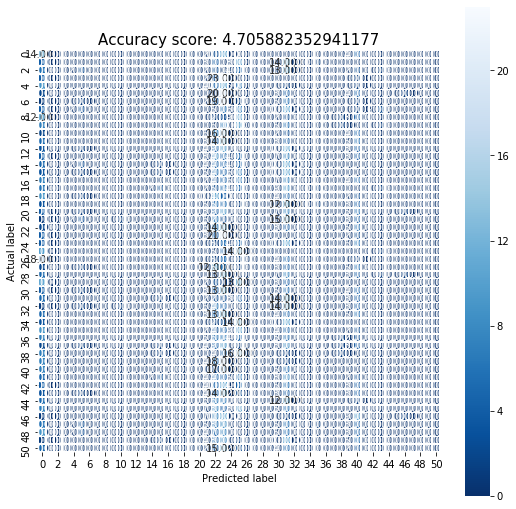

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(metrics.accuracy_score(predict, actual)*100)
plt.title(all_sample_title,size=15)